In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
%matplotlib inline

Welcome to ROOTaaS 6.06/02


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
columns = ['Q2' , 'Xb' , 'p/q' ,'theta (pq)' , 'Mmiss' ,'Pmiss3Mag','pcmX','pcmY','pcmZ' , 'rooWeight']

PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
Pmiss = [0.5*(PmissBins[i][0]+PmissBins[i][1]) for i in range(len(PmissBins))]

colors = ['black','red','blue']
markers = ['v','o','s']
directions = ['x','y','z']

# pp-SRC analysis in different cuts

In [3]:
def get_mean_and_sigma( x , w ):

    mean_unweighted , mean_weighted = np.average( x ) , np.average( x , weights=w )
    sigma_unweighted, sigma_weighted= np.sqrt(np.average( np.square(x-mean_unweighted) )) , np.sqrt(np.average( np.square(x-mean_weighted) , weights=w  ))            

    return mean_unweighted , mean_weighted , sigma_unweighted, sigma_weighted




# def cm_parameters_in_pmiss_bins(ana_nom=None,ana_mod=None):
#     for i in range(len(PmissBins)):
#         pMiss_min , pMiss_max = PmissBins[i][0] , PmissBins[i][1]


#         ana_nom_reduced = ana_nom[ (pMiss_min < ana_nom.Pmiss3Mag) & (ana_nom.Pmiss3Mag < pMiss_max) ]
#         ana_mod_reduced = ana_mod[ (pMiss_min < ana_mod.Pmiss3Mag) & (ana_mod.Pmiss3Mag < pMiss_max) ]
#         print 'p(miss) bin ',i,',',pMiss_min,' to ',pMiss_max,' GeV/c, ',len(ana_nom_reduced),'nominal events in this bin,',len(ana_mod_reduced),'in modified cut'


        

#         sqrtN = sqrt(0.5*(len(ana_nom_reduced)+len(ana_mod_reduced)))            
#         mX, mX_weighted, sX, sX_weighted = get_mean_and_sigma( x=ana_reduced.pcmX , w=ana_reduced.rooWeight )
#         mY, mY_weighted, sY, sY_weighted = get_mean_and_sigma( x=ana_reduced.pcmY , w=ana_reduced.rooWeight )
#         mZ, mZ_weighted, sZ, sZ_weighted = get_mean_and_sigma( x=ana_reduced.pcmZ , w=ana_reduced.rooWeight )
            
#         df_pMissBin = pd.DataFrame({'bin':i
#                                     ,'mean_x_unweighted':mX   ,'mean_xErr_unweighted':sX/sqrtN 
#                                     ,'sigma_x_unweighted':sX,'sigma_xErr_unweighted':0.02 # resolution uncertainty                                    
#                                     ,'mean_y_unweighted':mY   ,'mean_yErr_unweighted':sY/sqrtN 
#                                     ,'sigma_y_unweighted':sY,'sigma_yErr_unweighted':0.02 # resolution uncertainty
#                                     ,'mean_z_unweighted':mZ   ,'mean_zErr_unweighted':sZ/sqrtN 
#                                     ,'sigma_z_unweighted':sZ,'sigma_zErr_unweighted':0.02 # resolution uncertainty
#                                     ,'mean_x_weighted':mX_weighted       ,'mean_xErr_weighted':sX_weighted/sqrtN    
#                                     ,'sigma_x_weighted':sX_weighted    ,'sigma_xErr_weighted':0.02 # resolution uncertainty  
#                                     ,'mean_y_weighted':mY_weighted       ,'mean_yErr_weighted':sY_weighted/sqrtN
#                                     ,'sigma_y_weighted':sY_weighted    ,'sigma_yErr_weighted':0.02 # resolution uncertainty
#                                     ,'mean_z_weighted':mZ_weighted       ,'mean_zErr_weighted':sZ_weighted/sqrtN   
#                                     ,'sigma_z_weighted':sZ_weighted    ,'sigma_zErr_weighted':0.02 # resolution uncertainty
#                                    } , index=[i])

#         df_pMissBins = df_pMissBins.append(df_pMissBin)
        
#     return df_pMissBins




def cm_parameters_in_pmiss_bins(ana,do_prints=False):
    df_pMissBins = pd.DataFrame()
    for i in range(len(PmissBins)):
        pMiss_min , pMiss_max = PmissBins[i][0] , PmissBins[i][1]


        ana_reduced = ana[ (pMiss_min < ana.Pmiss3Mag) & (ana.Pmiss3Mag < pMiss_max) ]
        if do_prints: 
            print 'p(miss) bin ',i,',',pMiss_min,' to ',pMiss_max,' GeV/c, ',len(ana),'events in this bin'

        sqrtN = sqrt(len(ana_reduced))
        mX, mX_weighted, sX, sX_weighted = get_mean_and_sigma( x=ana_reduced.pcmX , w=ana_reduced.rooWeight )
        mY, mY_weighted, sY, sY_weighted = get_mean_and_sigma( x=ana_reduced.pcmY , w=ana_reduced.rooWeight )
        mZ, mZ_weighted, sZ, sZ_weighted = get_mean_and_sigma( x=ana_reduced.pcmZ , w=ana_reduced.rooWeight )
            
        df_pMissBin = pd.DataFrame({'bin':i
                                    ,'mean_x_unweighted':mX   ,'mean_xErr_unweighted':sX/sqrtN 
                                    ,'sigma_x_unweighted':sX,'sigma_xErr_unweighted':0.02 # resolution uncertainty                                    
                                    ,'mean_y_unweighted':mY   ,'mean_yErr_unweighted':sY/sqrtN 
                                    ,'sigma_y_unweighted':sY,'sigma_yErr_unweighted':0.02 # resolution uncertainty
                                    ,'mean_z_unweighted':mZ   ,'mean_zErr_unweighted':sZ/sqrtN 
                                    ,'sigma_z_unweighted':sZ,'sigma_zErr_unweighted':0.02 # resolution uncertainty
                                    ,'mean_x_weighted':mX_weighted       ,'mean_xErr_weighted':sX_weighted/sqrtN    
                                    ,'sigma_x_weighted':sX_weighted    ,'sigma_xErr_weighted':0.02 # resolution uncertainty  
                                    ,'mean_y_weighted':mY_weighted       ,'mean_yErr_weighted':sY_weighted/sqrtN
                                    ,'sigma_y_weighted':sY_weighted    ,'sigma_yErr_weighted':0.02 # resolution uncertainty
                                    ,'mean_z_weighted':mZ_weighted       ,'mean_zErr_weighted':sZ_weighted/sqrtN   
                                    ,'sigma_z_weighted':sZ_weighted    ,'sigma_zErr_weighted':0.02 # resolution uncertainty
                                   } , index=[i])

        df_pMissBins = df_pMissBins.append(df_pMissBin)
        
    return df_pMissBins



In [4]:
def get_cm_parameters( Xbmin = None,
                      theta_pq_max = None ,
                      p_over_q_min = None , p_over_q_max = None, 
                      MmissMax = None ,
                      target='C12',
                      cut_name='nominal_cuts',
                      do_prints=False
                     ):

    ana_nom = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCcut_DATA_%s.root"%target , key='anaTree' , columns=columns  )
    ana_mod = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_relaxed_ppSRCCut_DATA_%s.root"%target , key='anaTree' , columns=columns  )
    ana_mod = ana_mod[ (Xbmin < ana_mod.Xb) 
                      & (ana_mod['theta (pq)'] < theta_pq_max) 
                      & (p_over_q_min < ana_mod['p/q'])
                      & (ana_mod['p/q'] < p_over_q_max) 
                      & (ana_mod['Mmiss'] < MmissMax)  ]

    df_p_miss_bins_nom = cm_parameters_in_pmiss_bins(ana_nom)
    df_p_miss_bins_mod = cm_parameters_in_pmiss_bins(ana_mod)

    if do_prints:
        print target
        print cut_name
        print df_p_miss_bins_nom
        print df_p_miss_bins_mod
#     for i in range(len(PmissBins)):
#         pMiss_min , pMiss_max = PmissBins[i][0] , PmissBins[i][1]
# #         if DoSaveCanvas:
# #             unweighted = fana.RooFitCM( pMiss_min , pMiss_max , False , True, flags.verbose, canvas_unweighted, 4*i + 1 )
# #             weighted = fana.RooFitCM( pMiss_min , pMiss_max , True , True, flags.verbose, canvas_weighted, 4*i + 1 )

    return df_p_miss_bins_nom , df_p_miss_bins_mod


In [8]:

def fit_pp_cm_in_cut(var='sigma',var_label="$\sigma_{c.m.}$ [GeV/c]",
                     Xbmin = 1.2,
                     theta_pq_max = 25 ,                     
                     p_over_q_min = 0.62 , p_over_q_max = 0.96 ,                      
                     MmissMax = 1.10 ,
                     modified_cut_name='Xb115',
                     nom_and_mod_cut_names=['$x_B>1.2$','$x_B>1.15$'] , target='C12', 
                     do_prints=False,
                     do_make_plot=True,
                     do_save_plots=False):

    cm_nom,cm_mod = get_cm_parameters(target=target,
                                      Xbmin=Xbmin,
                                      theta_pq_max=theta_pq_max,
                                      p_over_q_min=p_over_q_min,p_over_q_max=p_over_q_max,
                                      MmissMax=MmissMax,
                                      do_prints=do_prints,
                                      cut_name=nom_and_mod_cut_names[1])

    a , a_err , b , b_err , eta_cm , eta_cm_err = [] , [] , [] , [] , [] , []
    for direction in directions:   
        a.append(cm_nom[var+'_'+direction+'_unweighted'])
        b.append(cm_mod[var+'_'+direction+'_unweighted'] )
        a_err.append(cm_nom[var+'_'+direction+'Err_unweighted'])
        b_err.append(cm_mod[var+'_'+direction+'Err_unweighted'])
        eta_tmp , eta_err_tmp = eta( 1000*np.abs(b[-1]) , 1000*np.abs(a[-1]) )
        eta_cm.append(eta_tmp)
        eta_cm_err.append(eta_err_tmp)


    mean_eta , sigma_eta = [] , []


    
    if do_make_plot:
        fig = plt.figure(figsize=(16,10))
        ax = fig.add_subplot(6,1,(1,3))
        for i,color,marker,direction in zip(range(len(a)),colors,markers,directions):
            plt.errorbar(Pmiss-0.01*(np.power(-1,i))*(i)*np.ones(len(Pmiss)), a[i], yerr=a_err[i],
                         color=color, marker=marker , linestyle='none' , label=None , markersize=10,alpha=0.2)
            plt.errorbar(Pmiss-0.008*(np.power(-1,i))*(i+1)*np.ones(len(Pmiss)), b[i], yerr=b_err[i],
                         color=color, marker=marker , linestyle='none' ,markersize=10,label='%s direction'%direction)
            
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.linspace(ymin, ymax, 5))

        #plt.text( xmin+0.2*(xmax-xmin) , ymin+0.5*(ymax-ymin), '%s vs. %s'%(nom_and_mod_cut_names[0],nom_and_mod_cut_names[1]) , fontsize=25)
        ax.grid()
        ax.legend(fontsize=25,loc='best')
        ax.set_title('%s vs. %s (%s)'%(nom_and_mod_cut_names[0],nom_and_mod_cut_names[1],var) , fontsize=25 , y=1.02)
        set_axes(ax,x_label='',y_label=var_label, fontsize=30)
        ax.xaxis.set_major_formatter( NullFormatter() )



        if do_4_plots is not True:
                ax = fig.add_subplot(6,1,(4,6))

        for i,color,marker,direction in zip(range(len(a)),colors,markers,directions):
            if do_4_plots:
                ax = fig.add_subplot(6,1,i+4)
            plt.errorbar(Pmiss, 100*eta_cm[i], yerr=100*eta_cm_err[i],
                         color=color, marker=marker , linestyle='none' , label=None , markersize=10)

            ax.grid()
            ymin, ymax = ax.get_ylim()
            ax.set_ylim(ymin-1, ymax+1)
            ax.yaxis.set_ticks(np.linspace(ymin, ymax, 3))
            if i<2:
                ax.xaxis.set_major_formatter( NullFormatter() )
                x_label=''
            else:
                x_label = r'$|\vec{p}_{miss}|$ [GeV/c]'
            set_axes(ax,x_label=x_label,y_label="$\eta_{%s}$"%direction+' [%]', fontsize=30)
            
            
            # fit to constant
            x , y , yerr = Pmiss , 100*eta_cm[i] , 100*eta_cm_err[i]
            simga2_inverse = [1./np.square(yerr[i]) if yerr[i]>0.01 else 0.01 for i in range(len(x))]
            mean = np.average(y , weights=simga2_inverse)
            mean_eta.append(mean)
            sigma = np.sqrt(np.average(np.square(y-mean),weights=simga2_inverse))
            sigma_eta.append(sigma)
            y , yerr = mean*np.ones(len(x)) , sigma*np.ones(len(x))  
            plt.plot( x , y , '-',color=color)
            plt.fill_between( x , y-yerr , y+yerr , color=color , alpha=0.1)
            ytext = ymin+0.1*(ymax-ymin) if mean<0 else ymax-0.3*(ymax-ymin)
            plt.text(0.4 , ytext , '$%.3f \\pm %.3f $'%(mean,sigma) , color=color , fontsize=20) 



        plt.subplots_adjust(hspace=0)        
        plt.tight_layout()
        if do_save_plots:
            fig.savefig("/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/cm_sensitivity/cm_sensitivity_%s_%s_%s.pdf"%(var,modified_cut_name,target))
        return mean_eta , sigma_eta



-------
C12 
-------
________
sigma 
________
xB>1.2 sigma(z) cut sensitivity: 3.2
xB>1.2 sigma(transverse) cut sensitivity: 3.5
theta_pq<25 sigma(z) cut sensitivity: 6.2
theta_pq<25 sigma(transverse) cut sensitivity: 3.4
0.62<p/q<0.97 sigma(z) cut sensitivity: 3.3
0.62<p/q<0.97 sigma(transverse) cut sensitivity: 3.0
Mmiss<1.1 sigma(z) cut sensitivity: 5.0
Mmiss<1.1 sigma(transverse) cut sensitivity: 5.3
tot. syst. uncertainty tranverse (sigma): 7.8
tot. syst. uncertainty longitudinal (sigma): 9.2
________
mean 
________
xB>1.2 mean(z) cut sensitivity: 4.2
xB>1.2 mean(transverse) cut sensitivity: 41.5
theta_pq<25 mean(z) cut sensitivity: 1.5
theta_pq<25 mean(transverse) cut sensitivity: 31.9
0.62<p/q<0.97 mean(z) cut sensitivity: 5.4
0.62<p/q<0.97 mean(transverse) cut sensitivity: 27.8
Mmiss<1.1 mean(z) cut sensitivity: 3.1
Mmiss<1.1 mean(transverse) cut sensitivity: 50.2
tot. syst. uncertainty tranverse (mean): 77.7
tot. syst. uncertainty longitudinal (mean): 7.7
-------
Al27 
-------

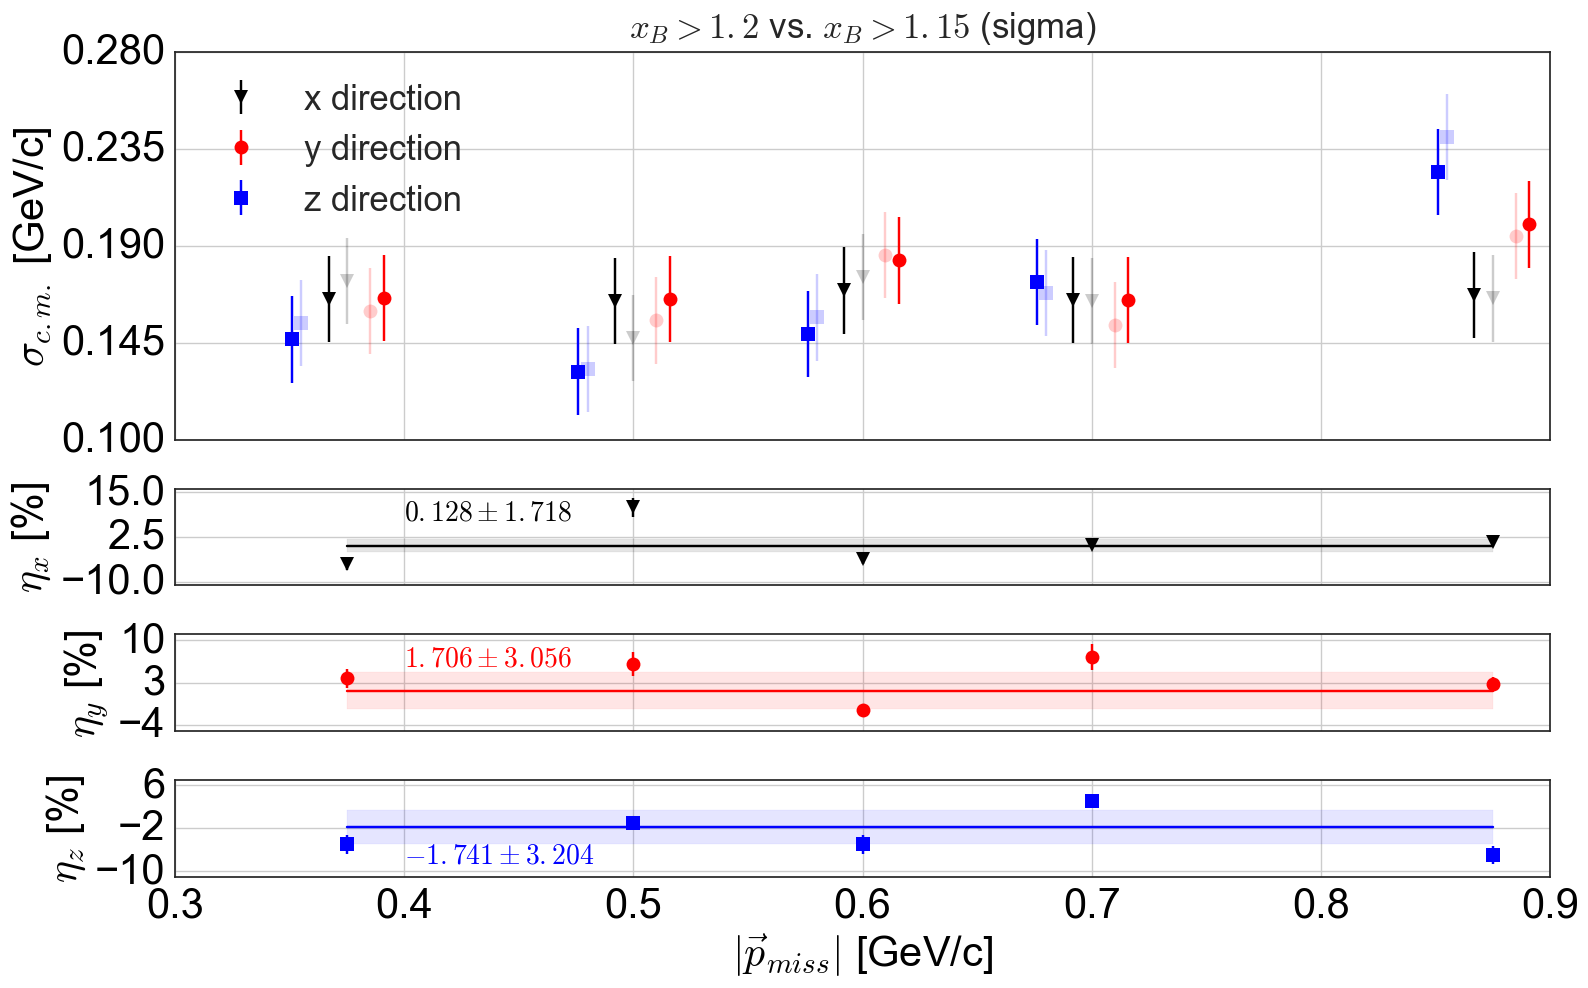

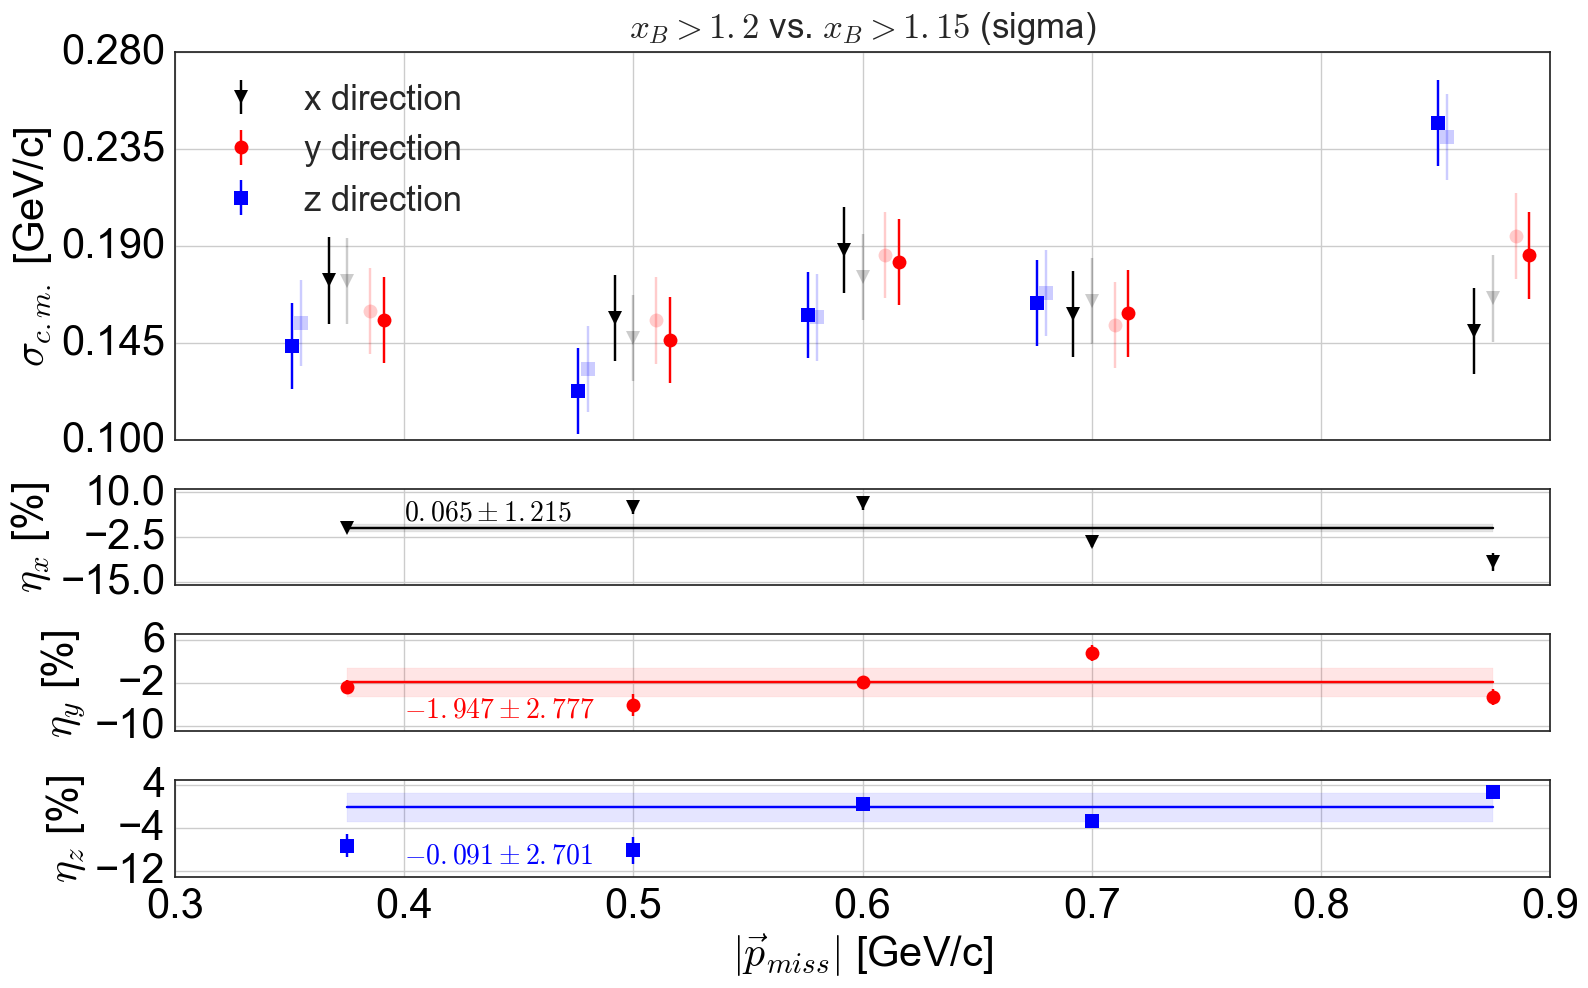

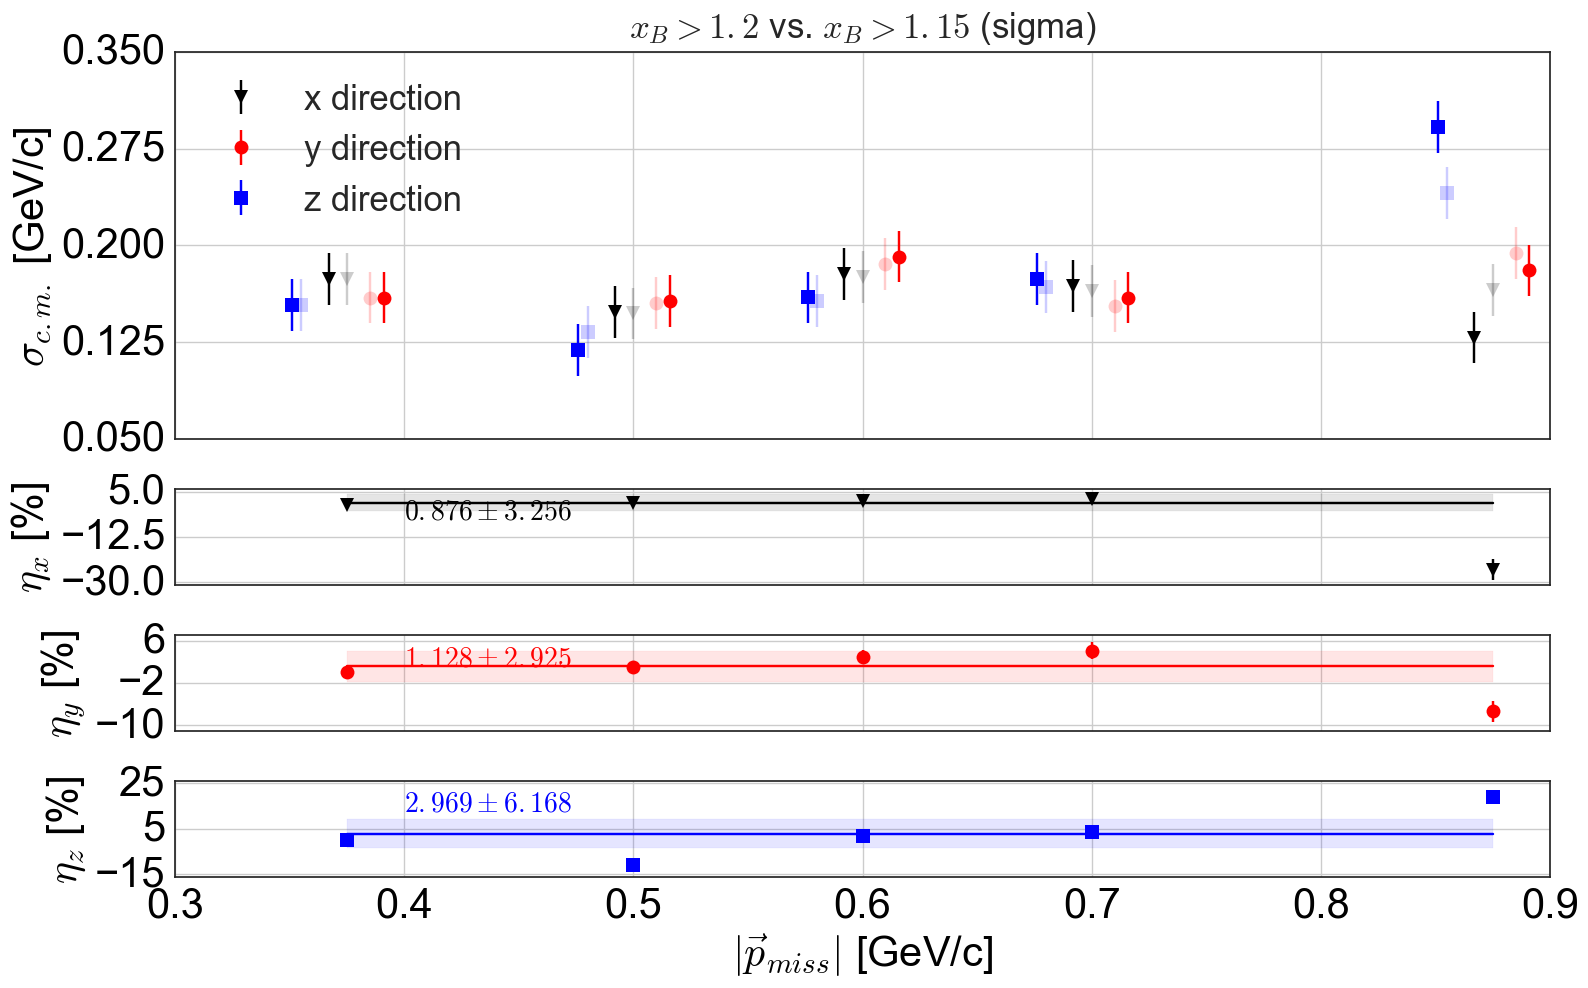

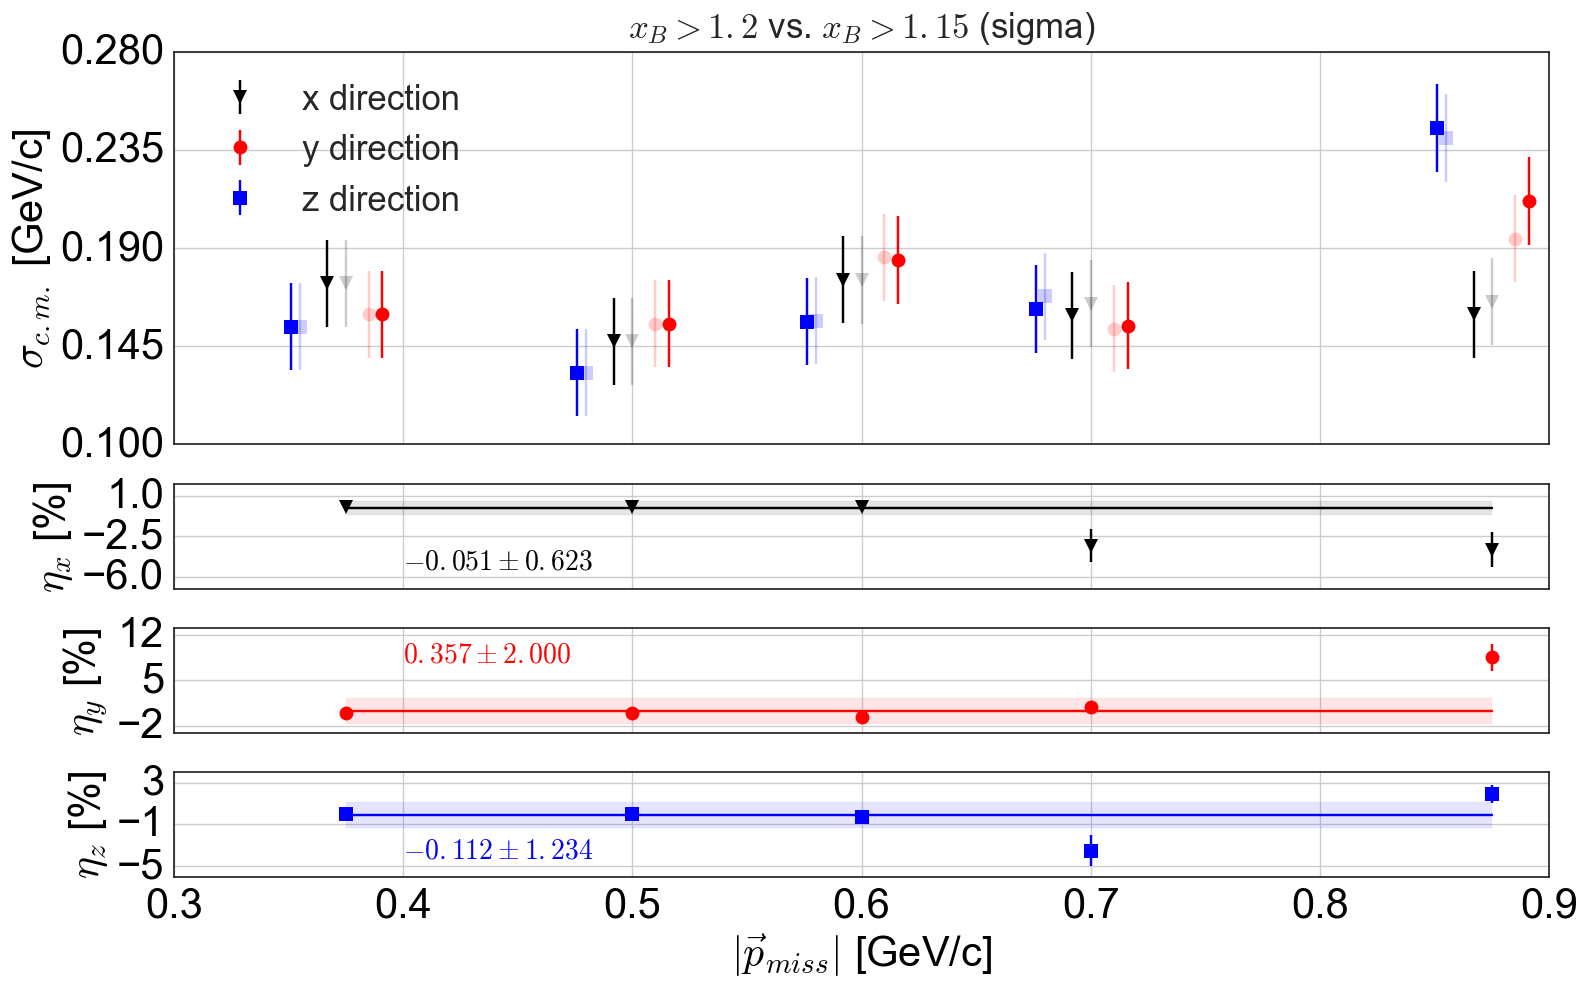

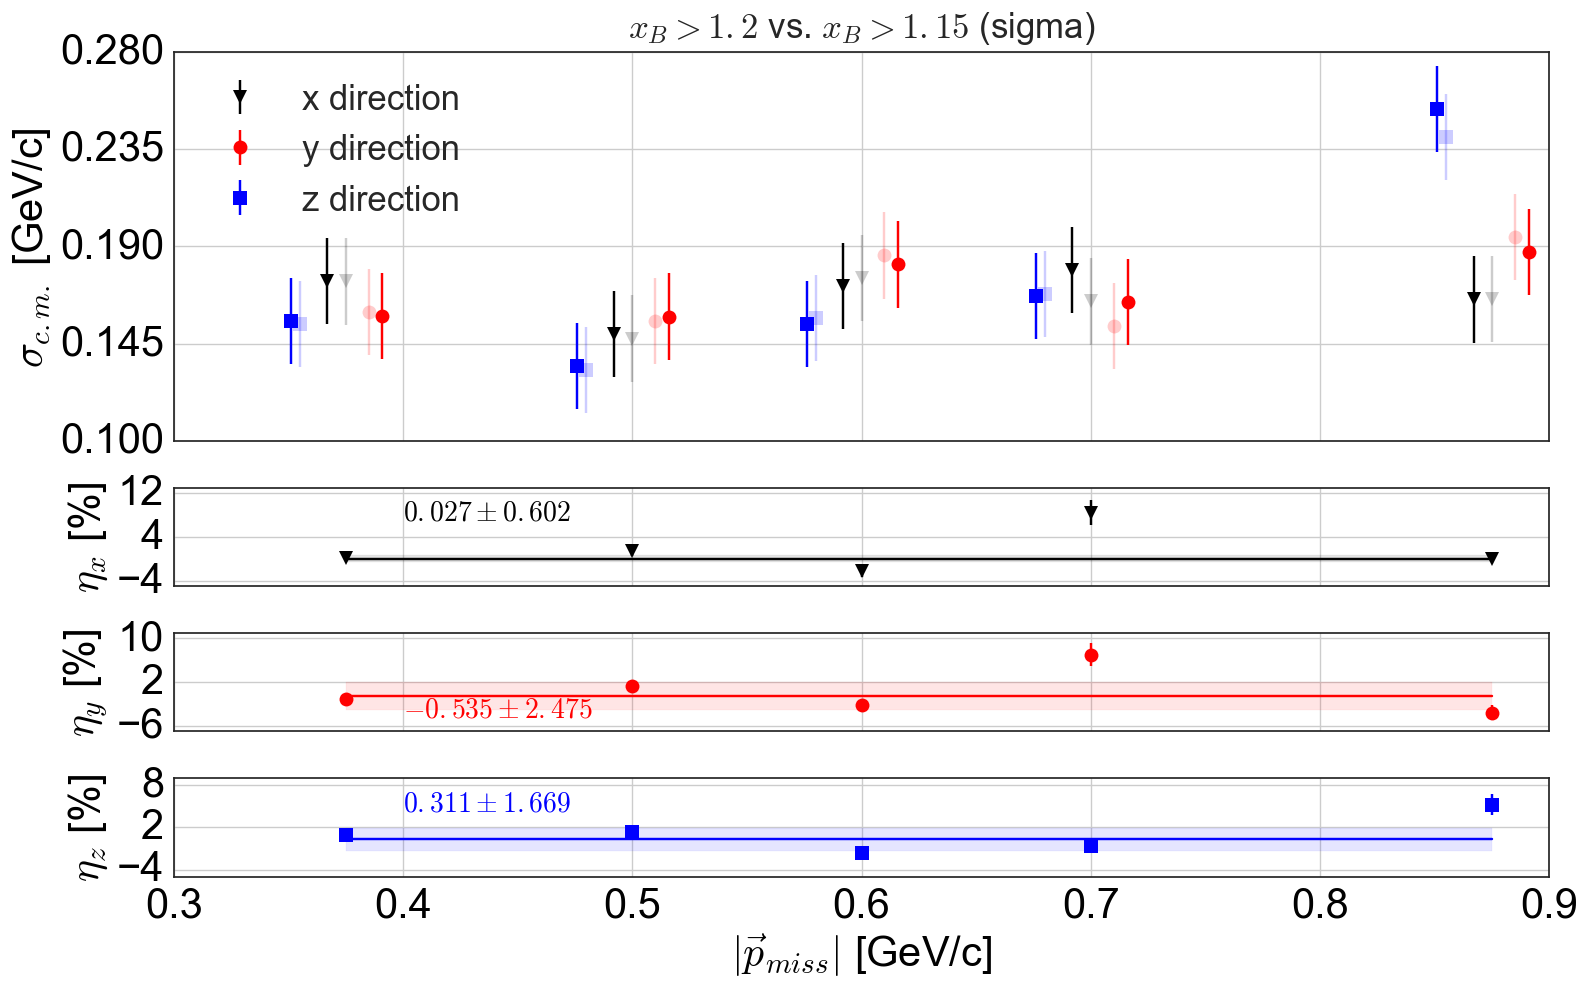

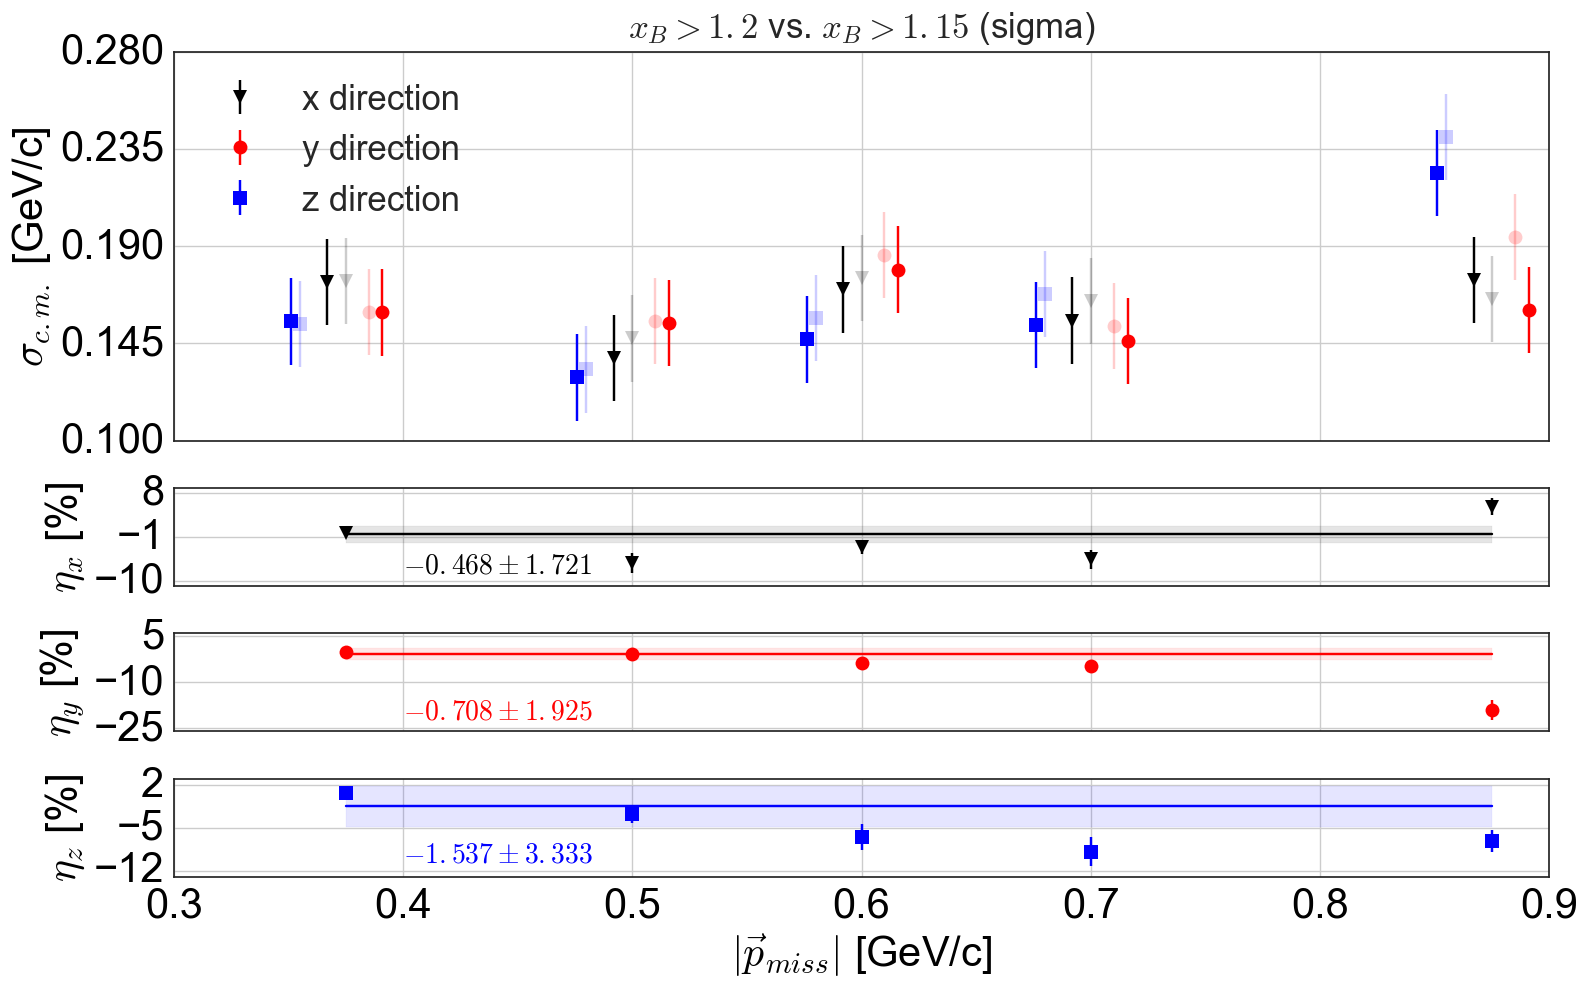

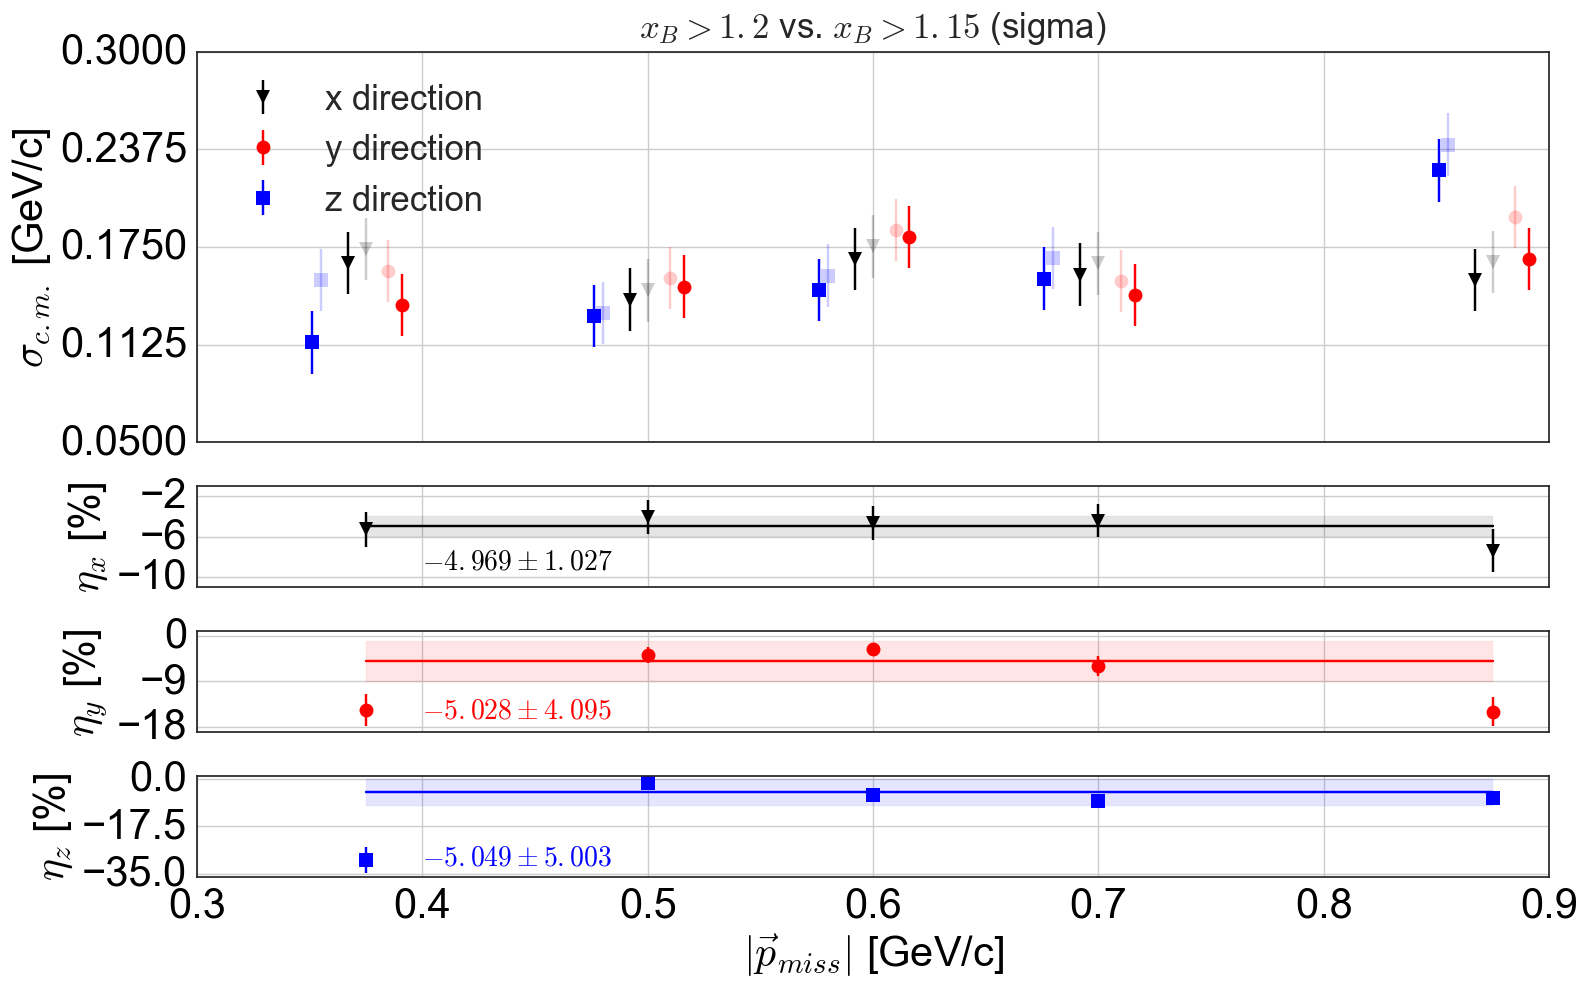

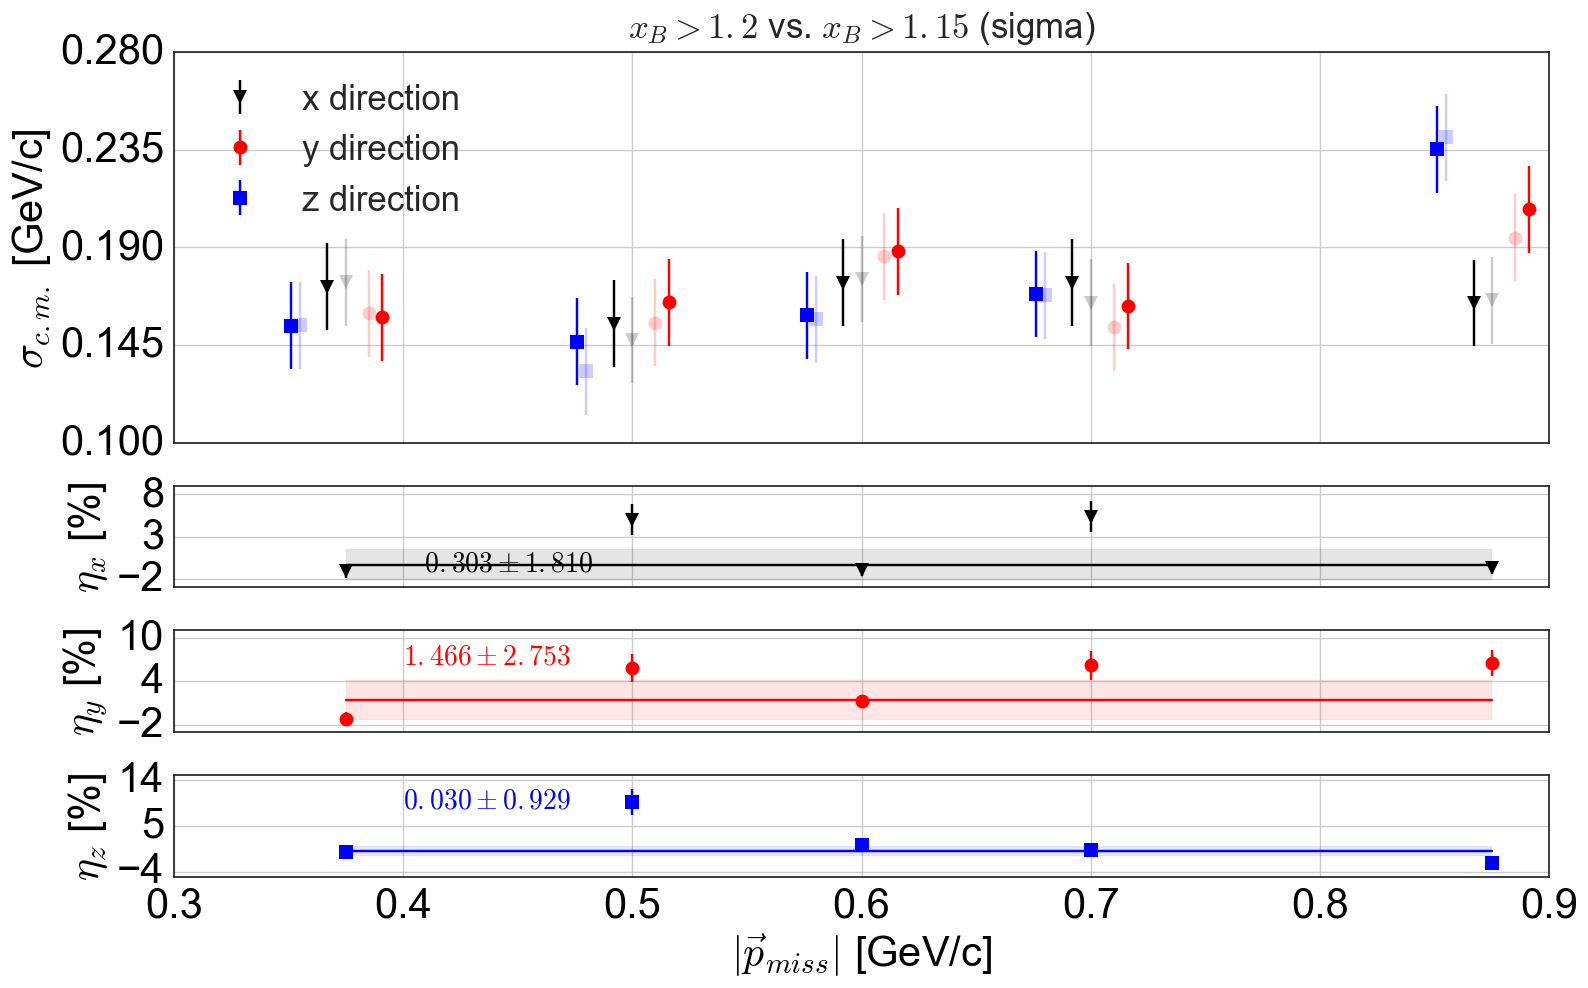

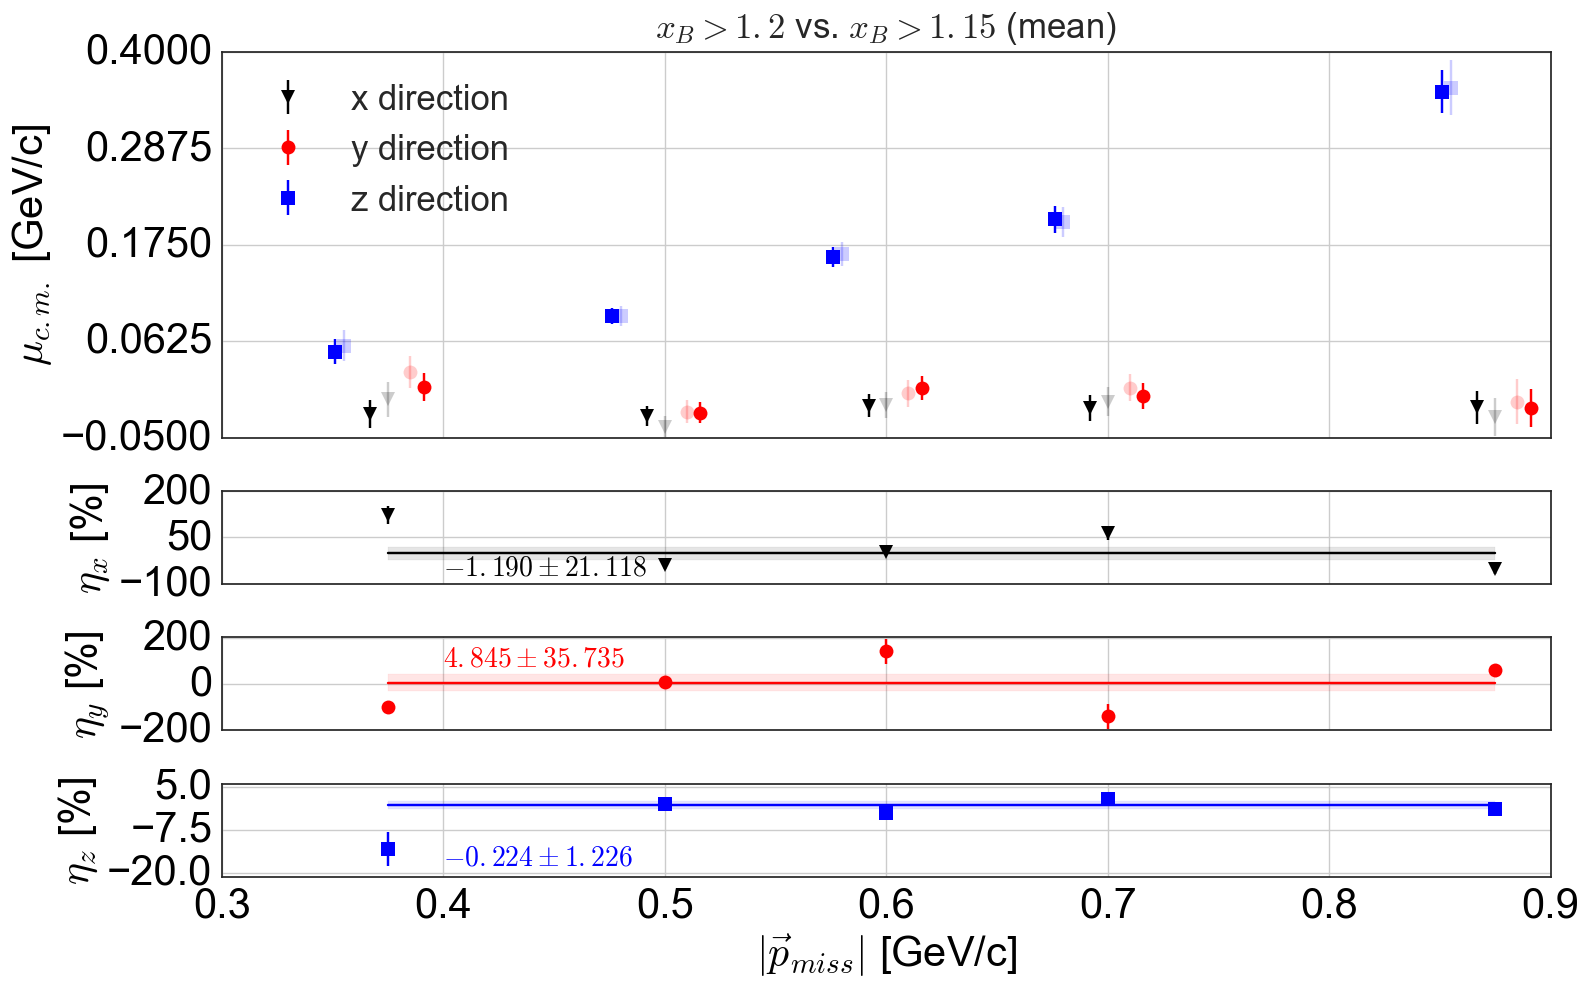

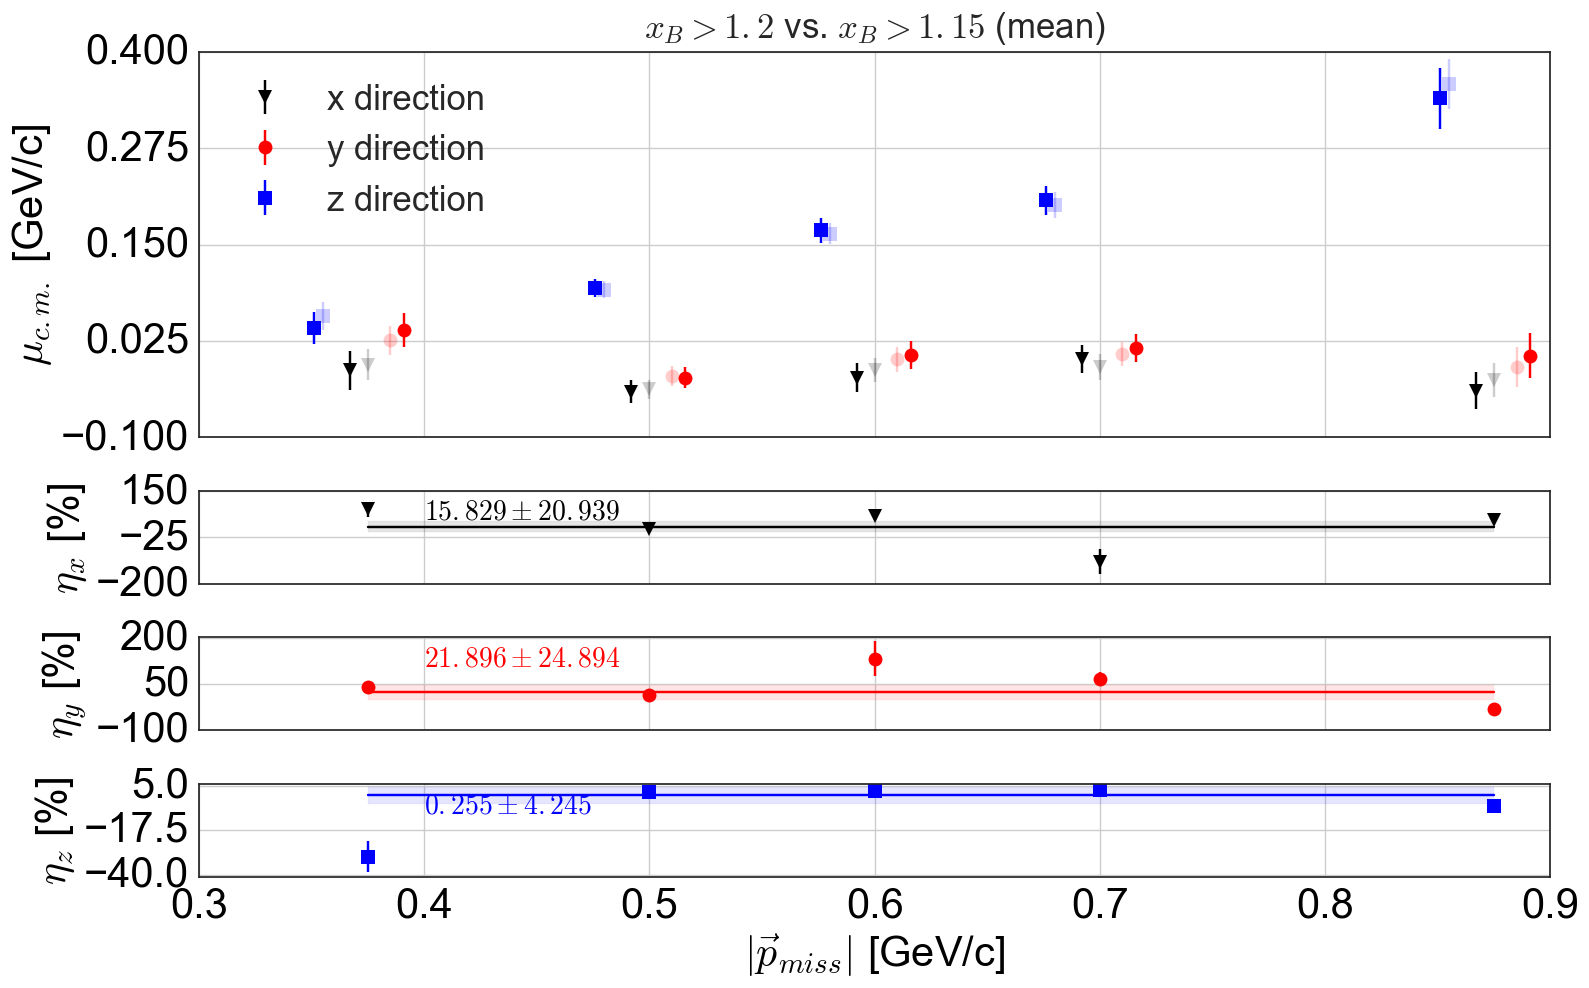

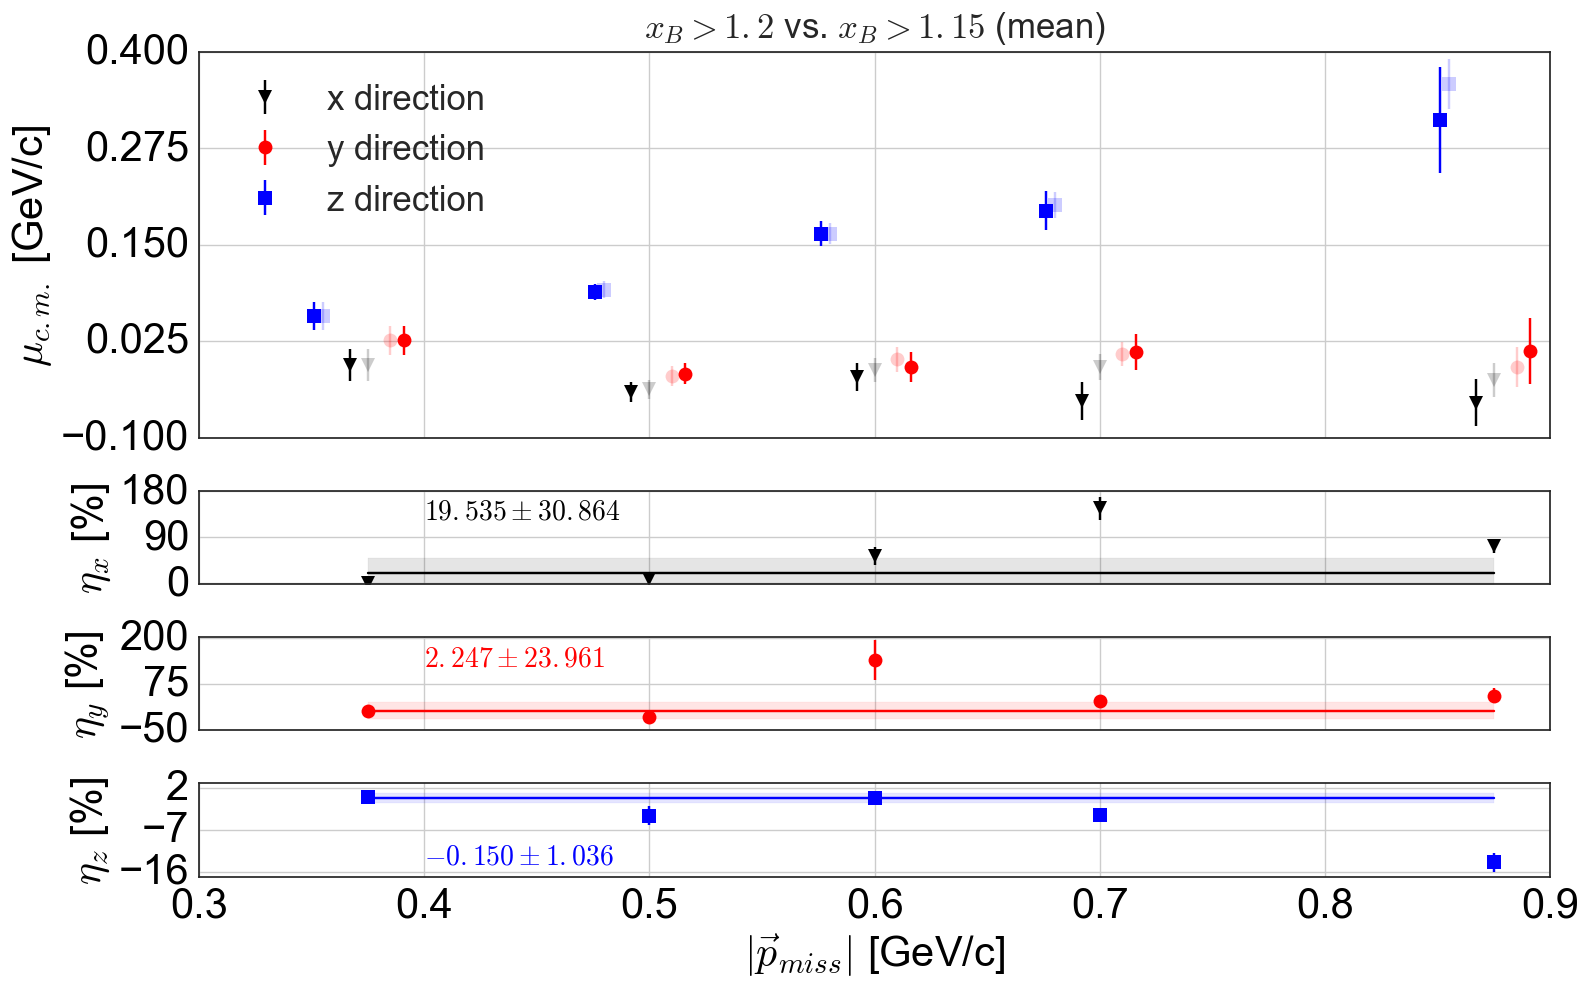

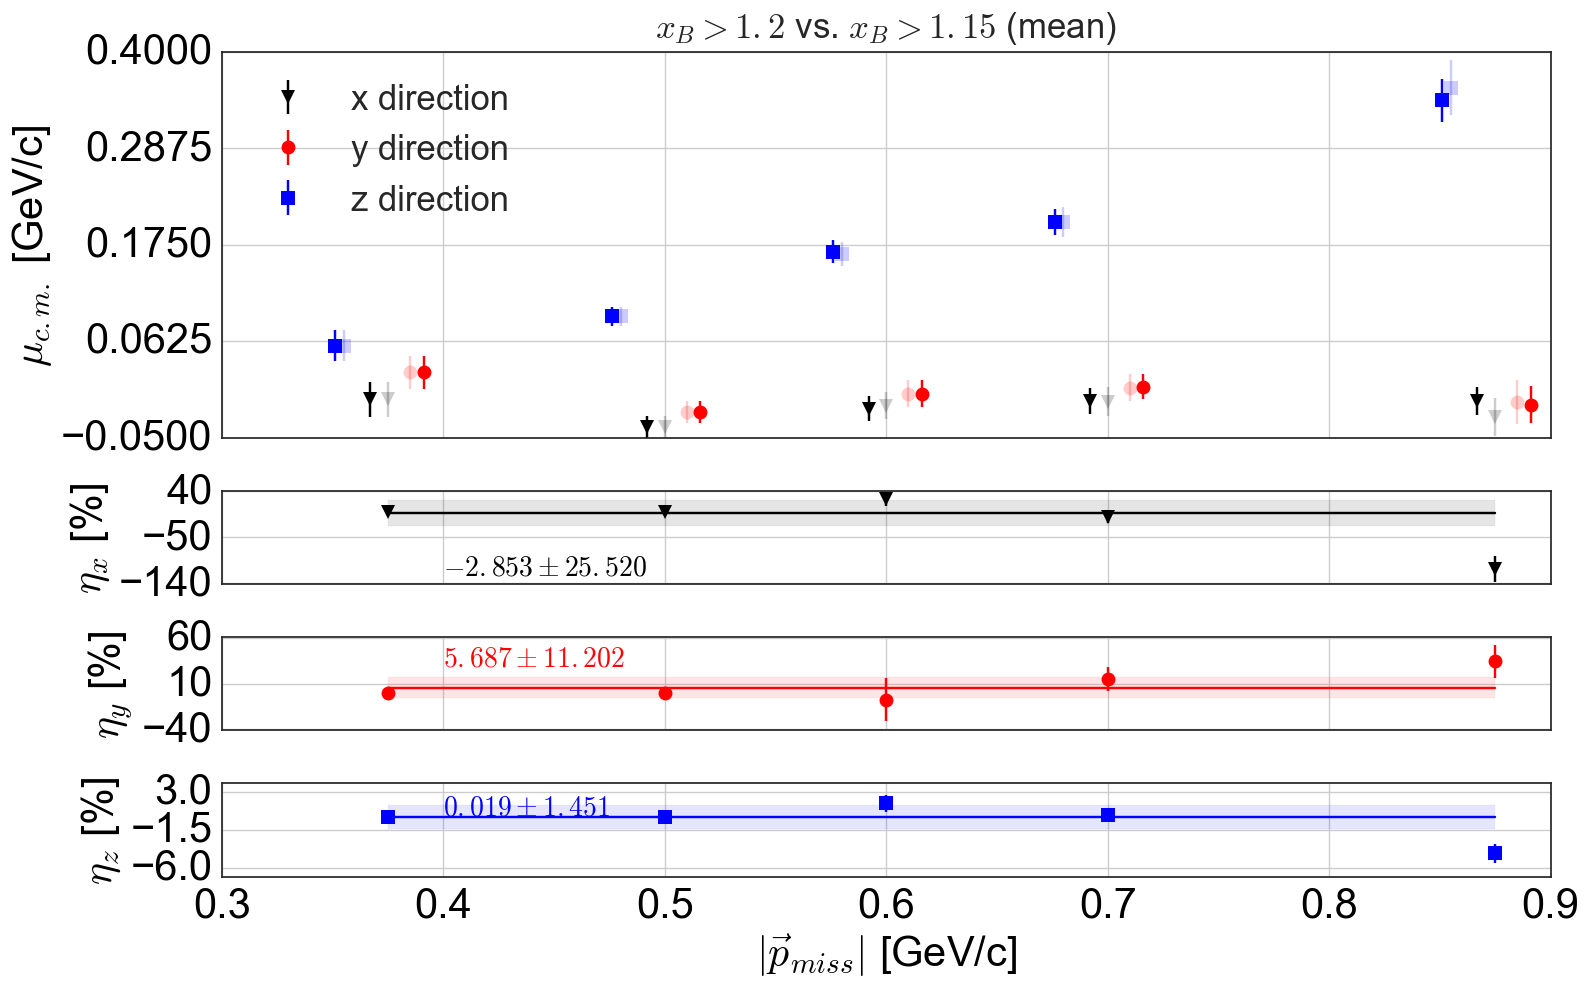

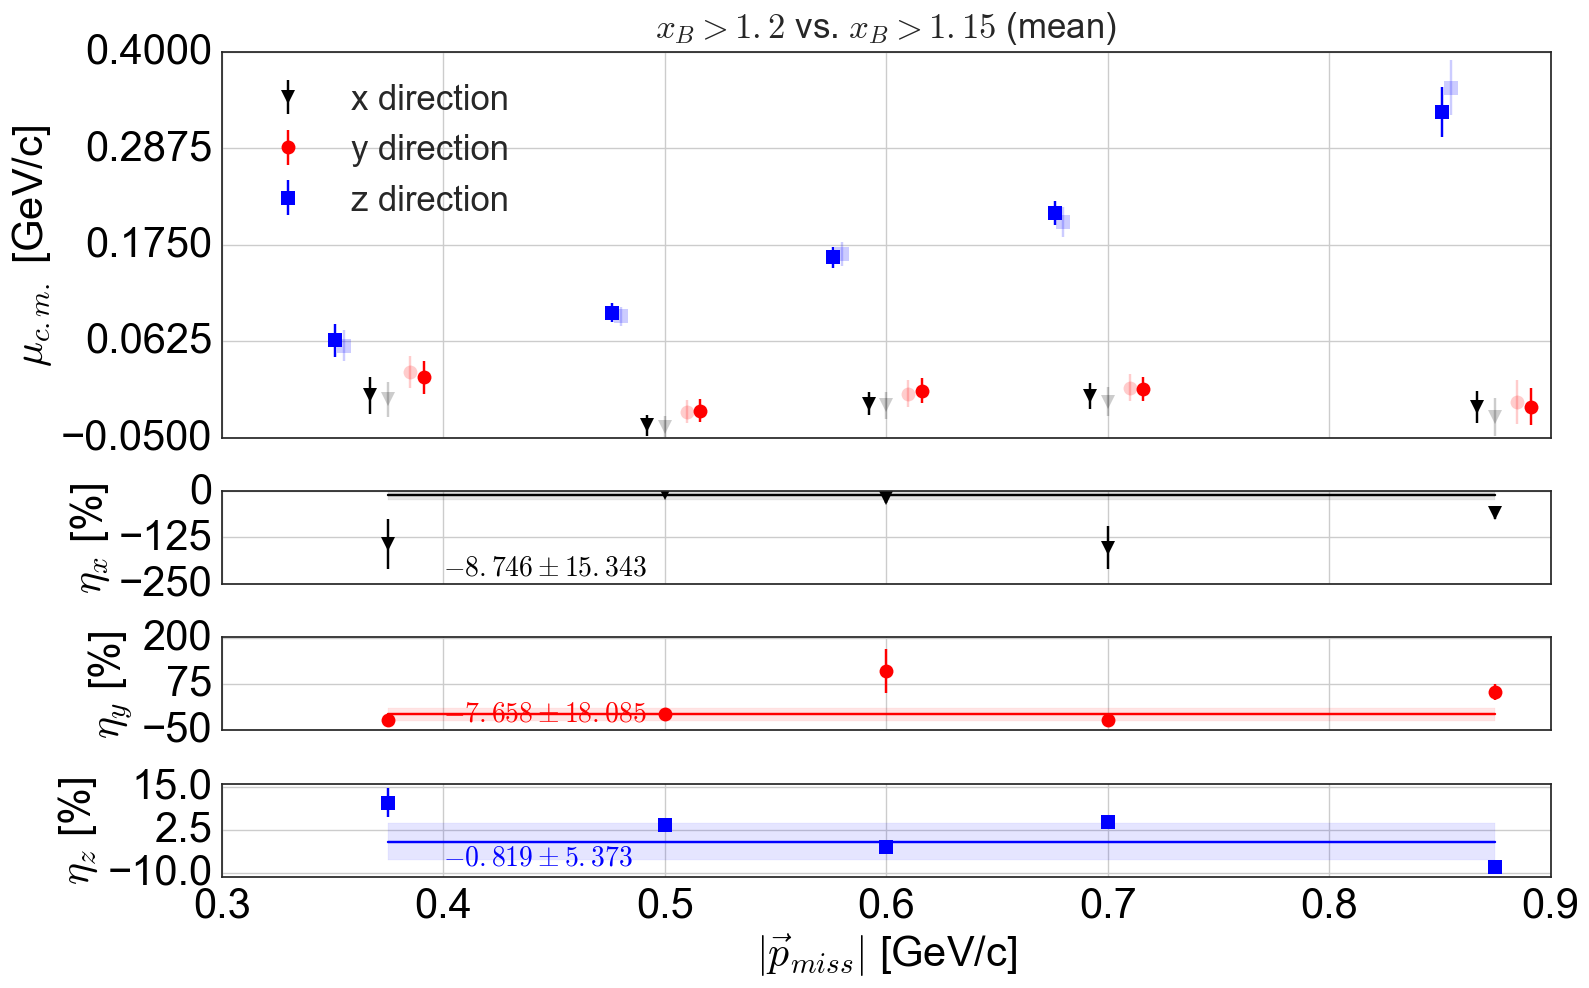

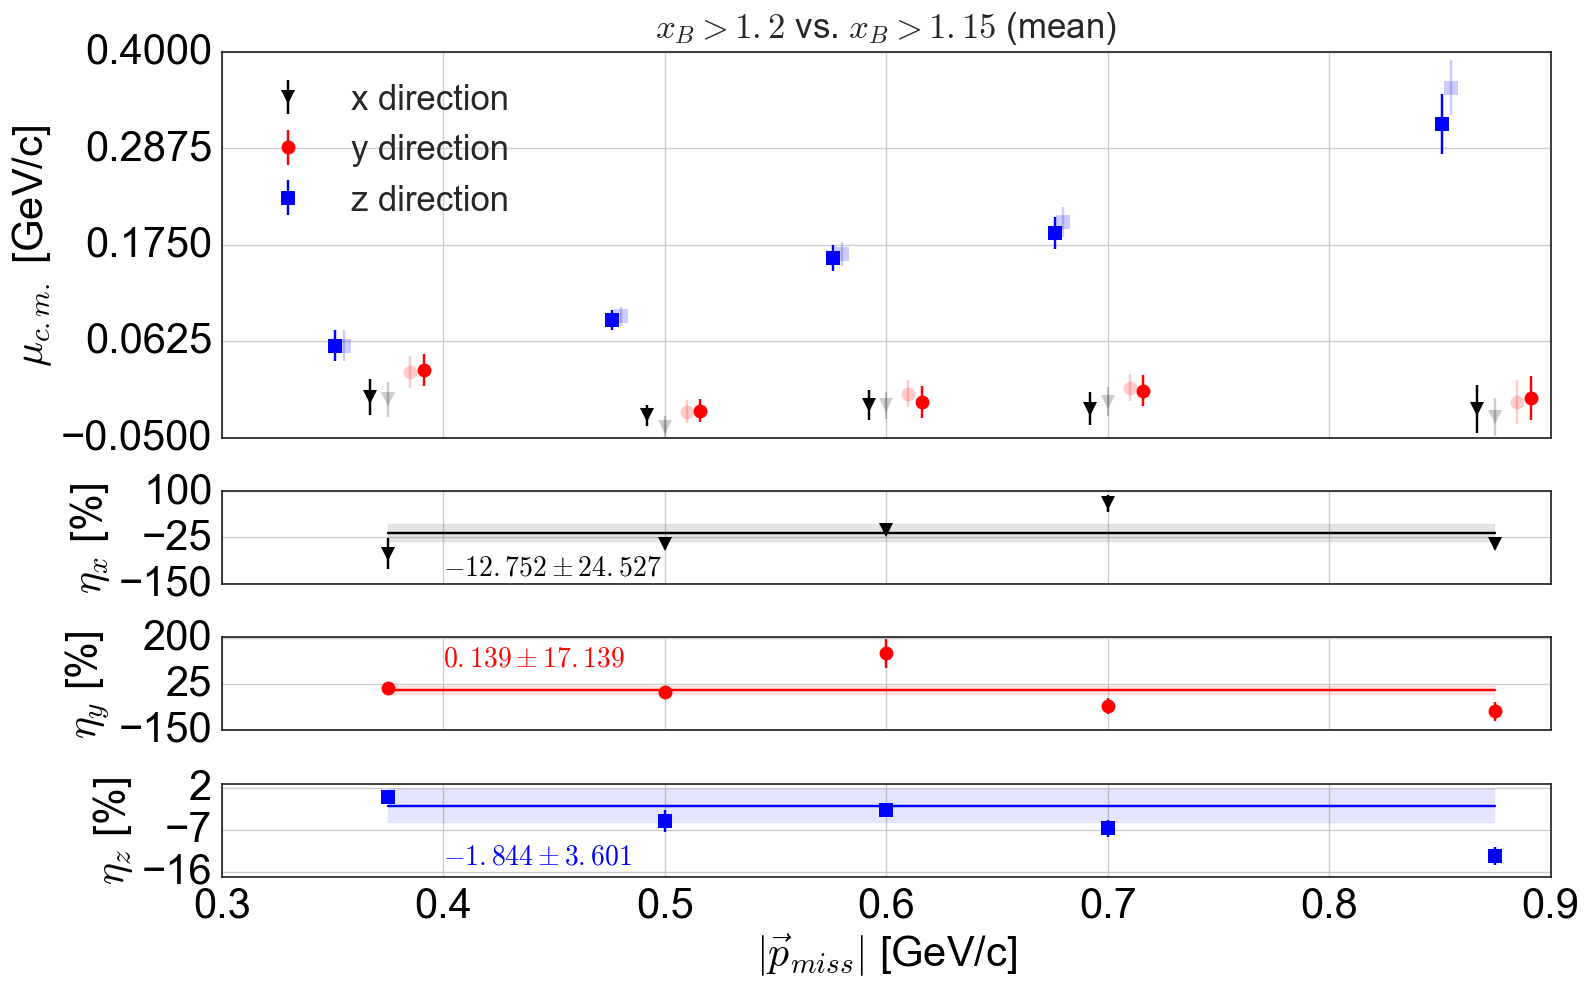

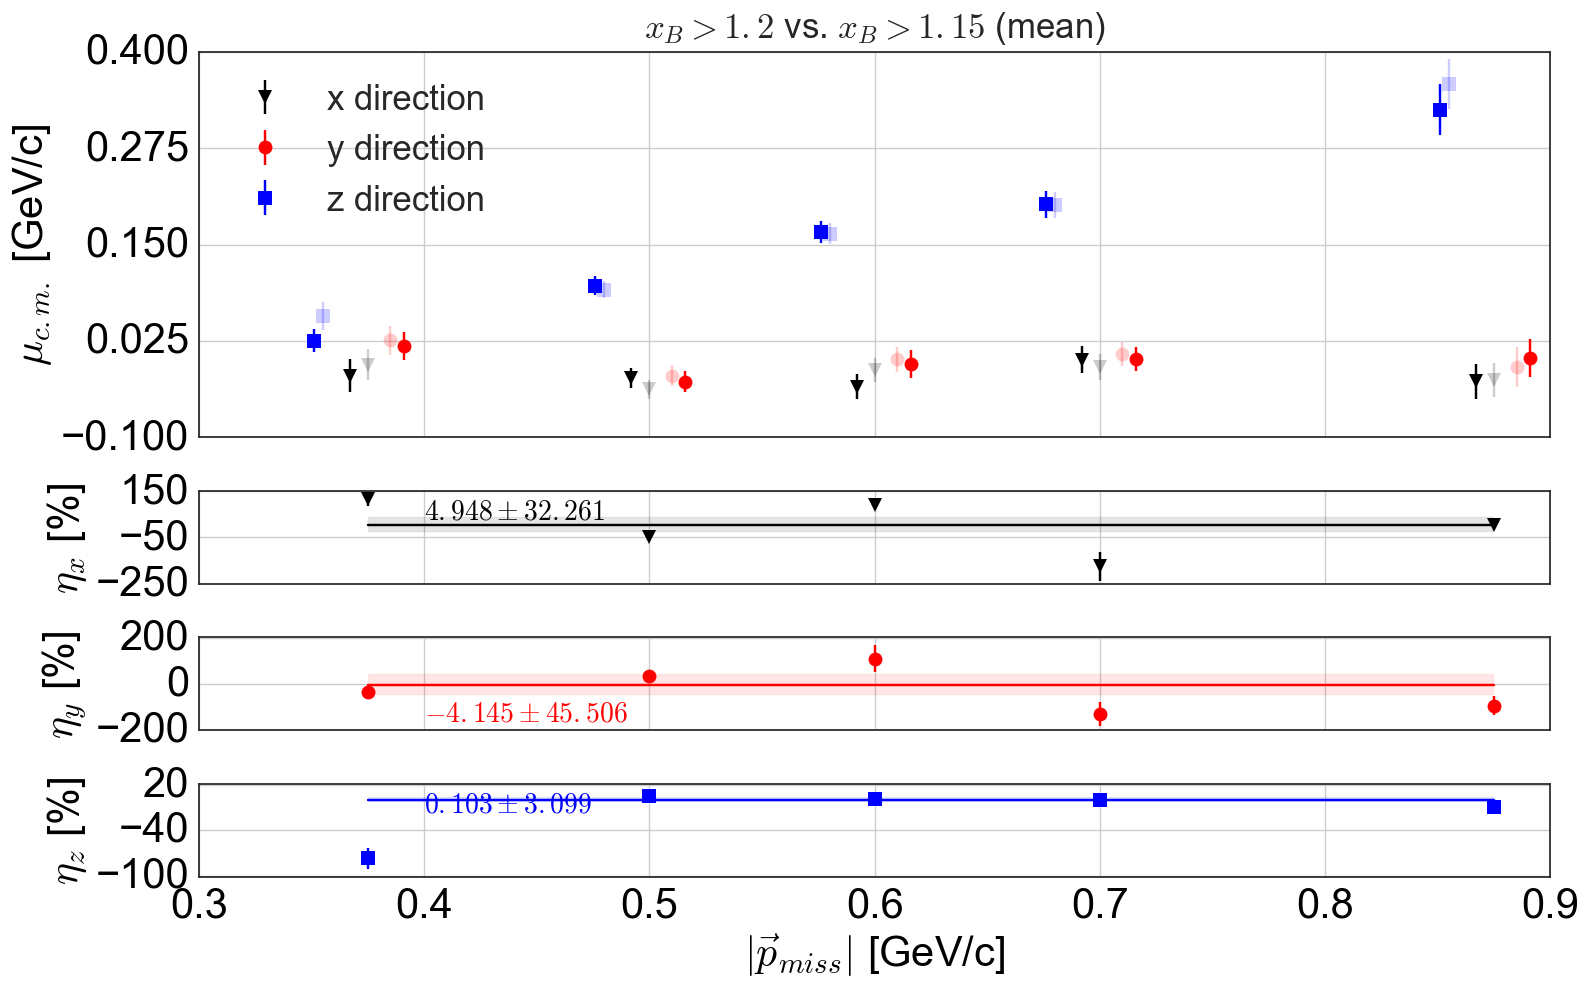

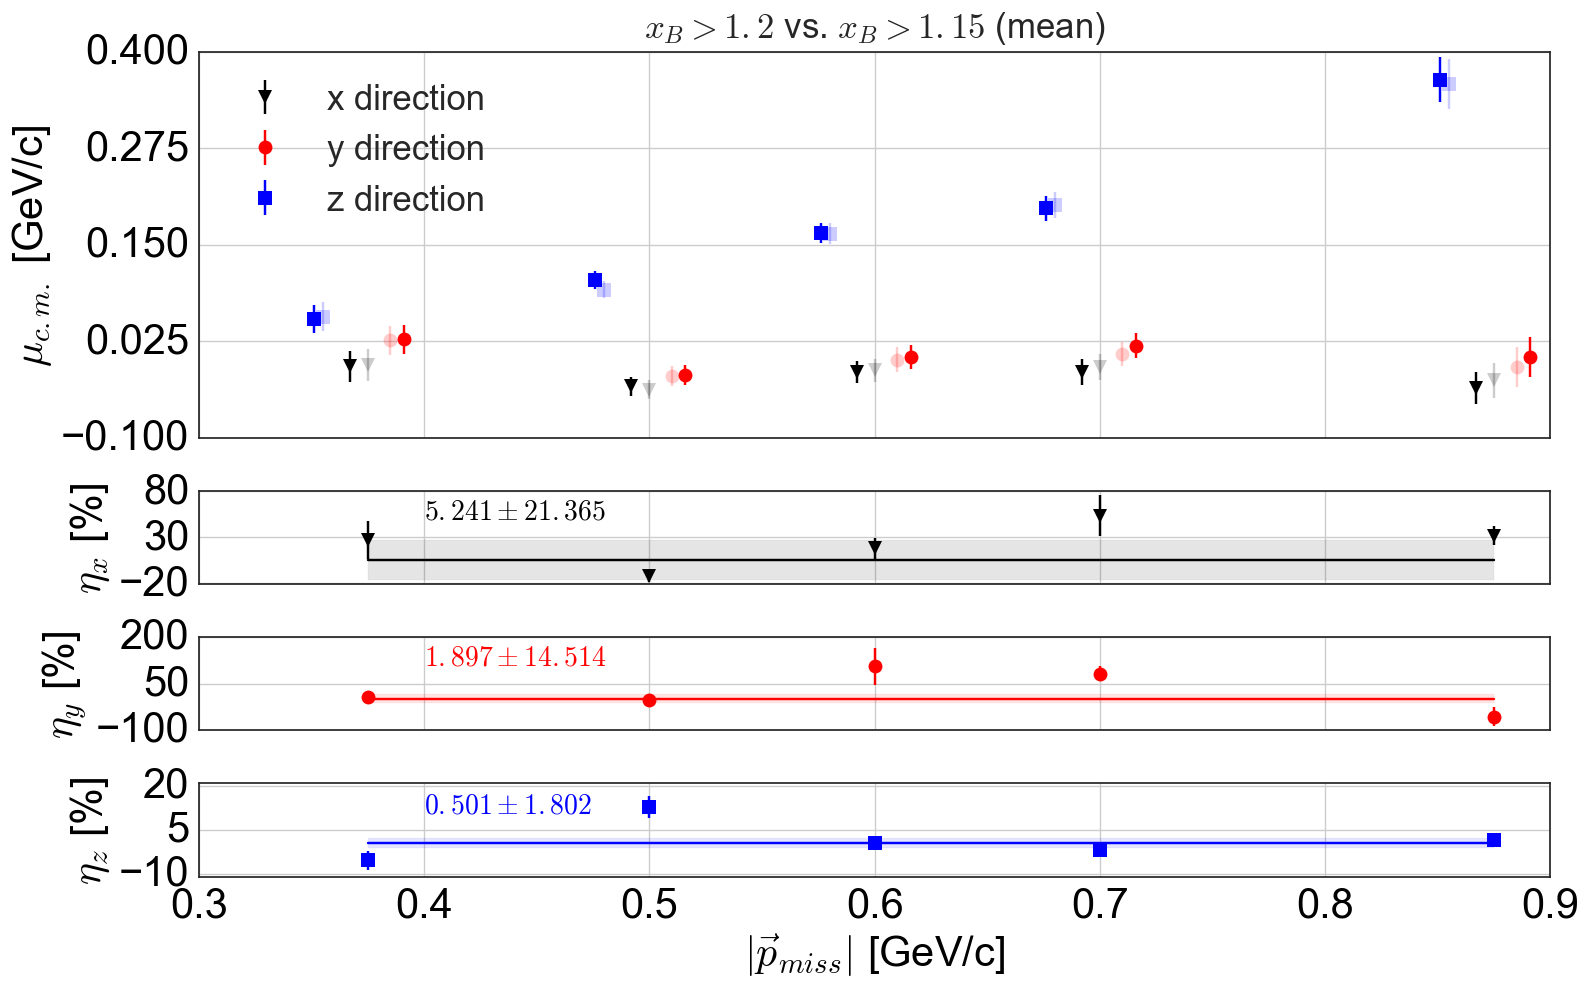

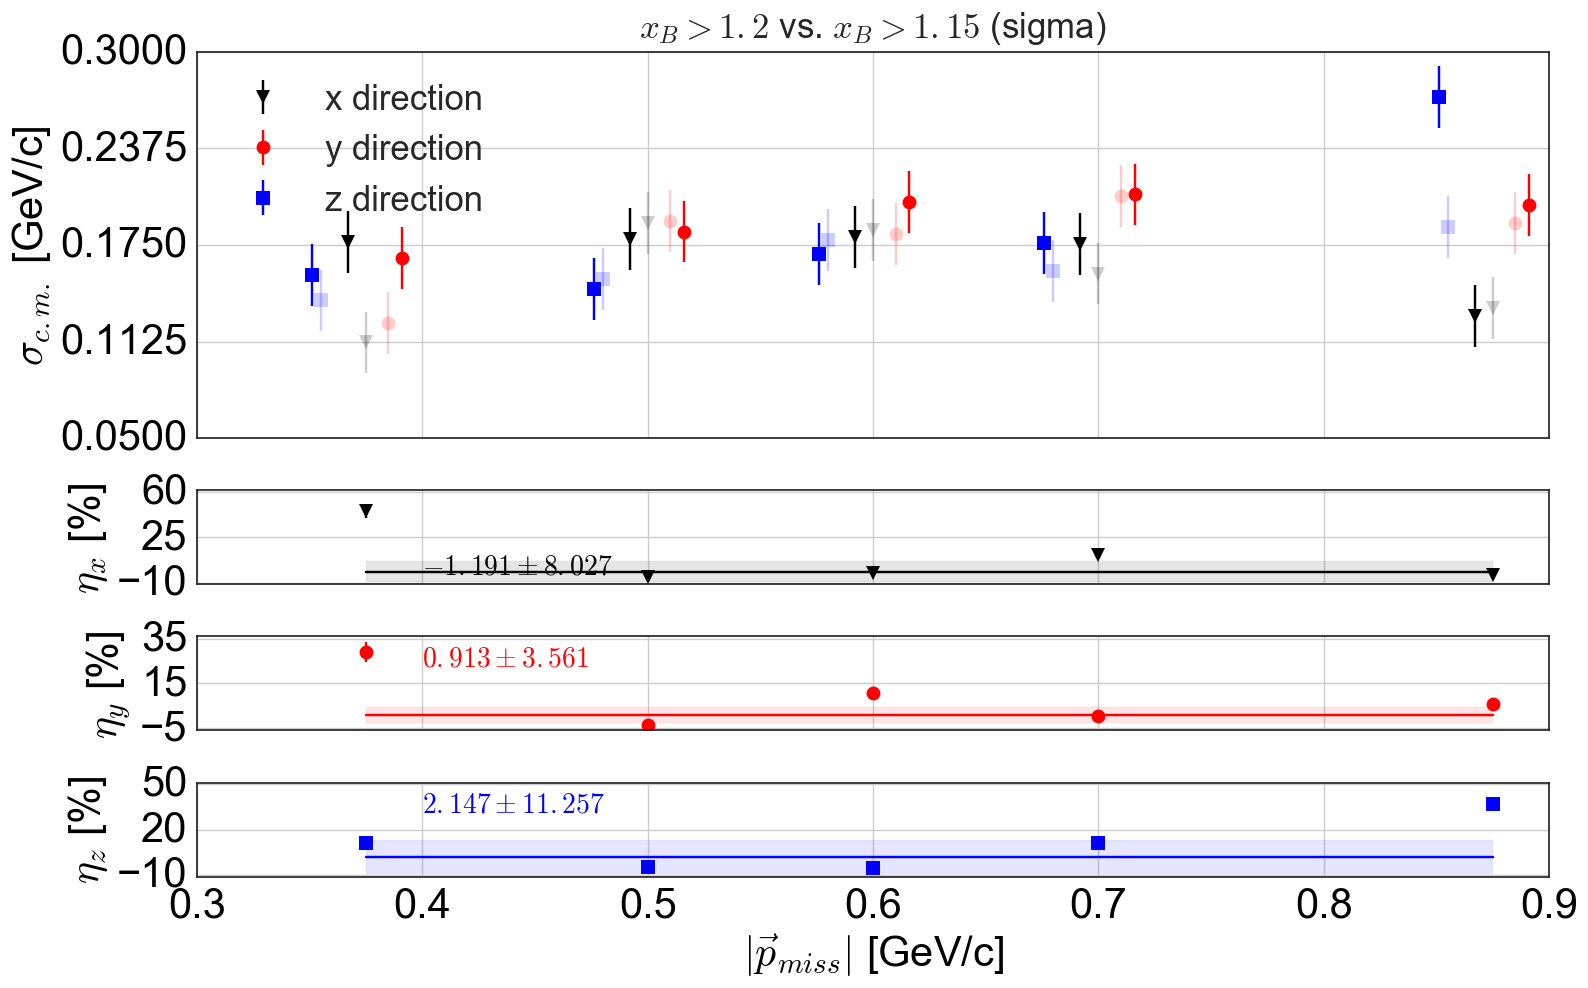

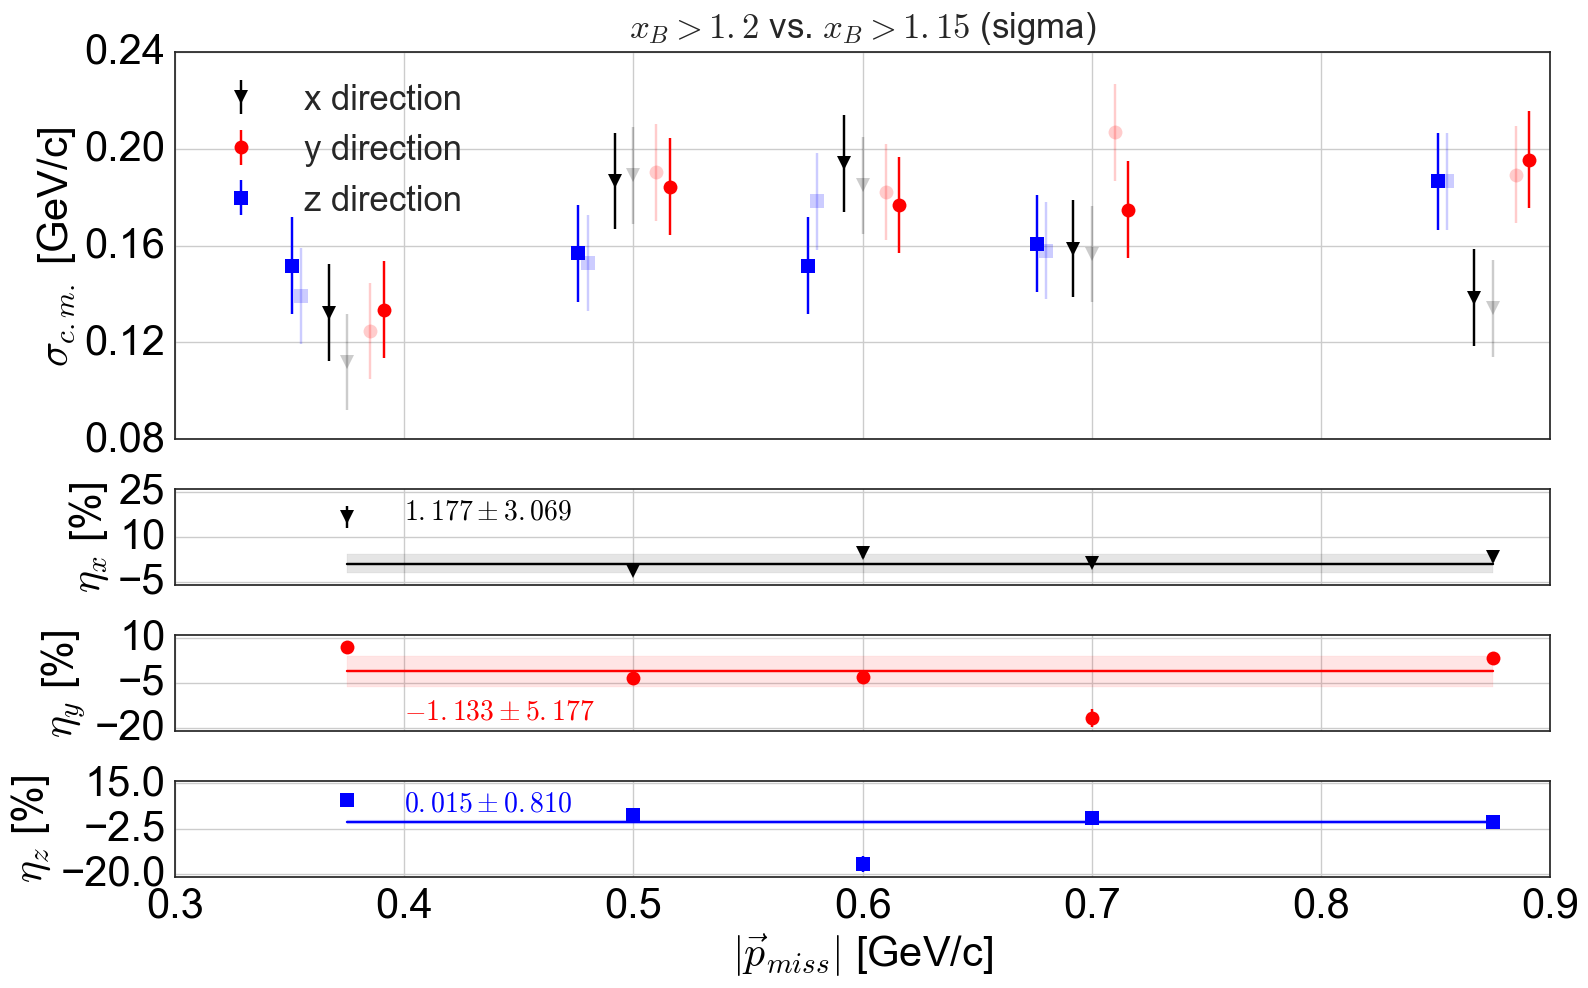

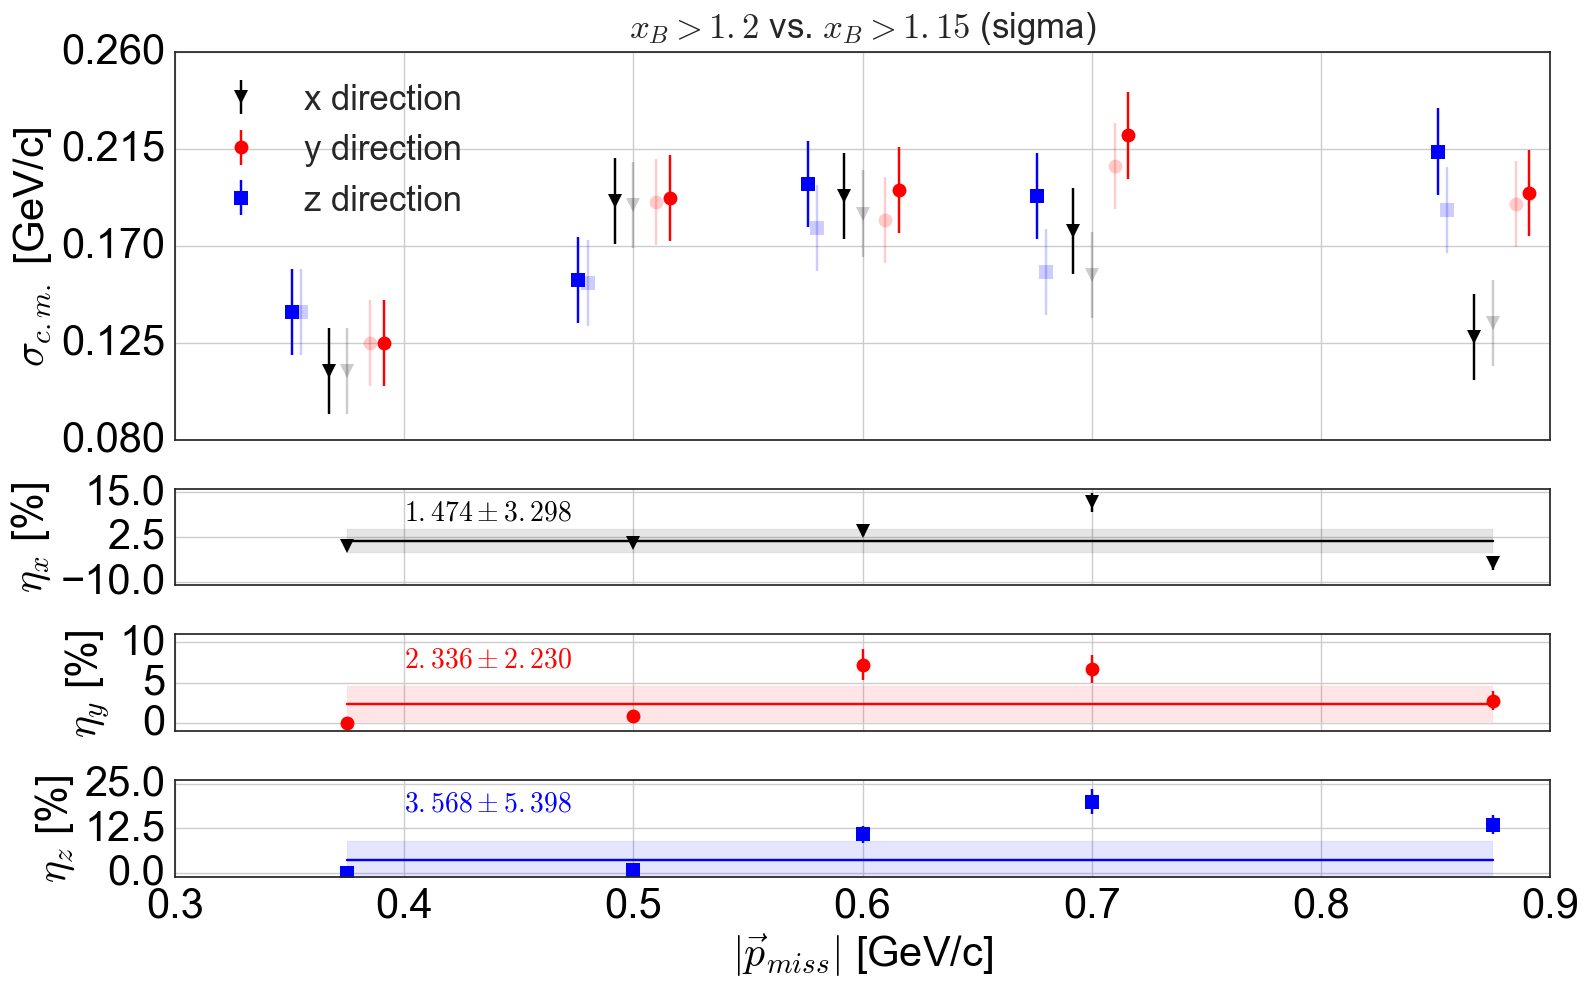

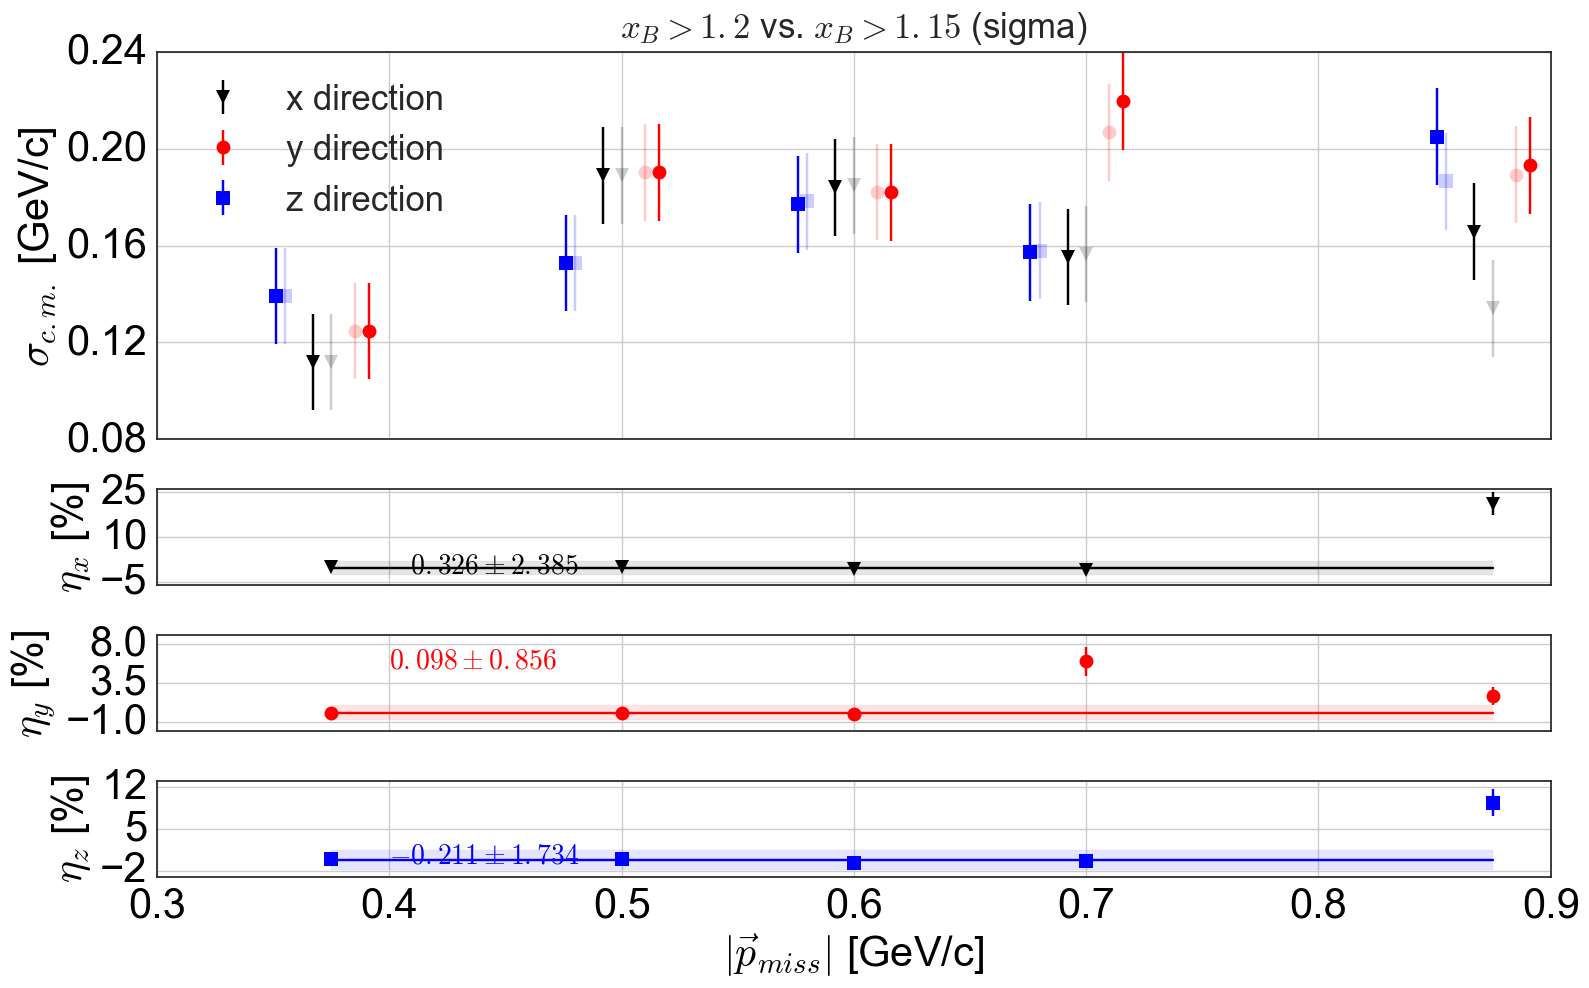

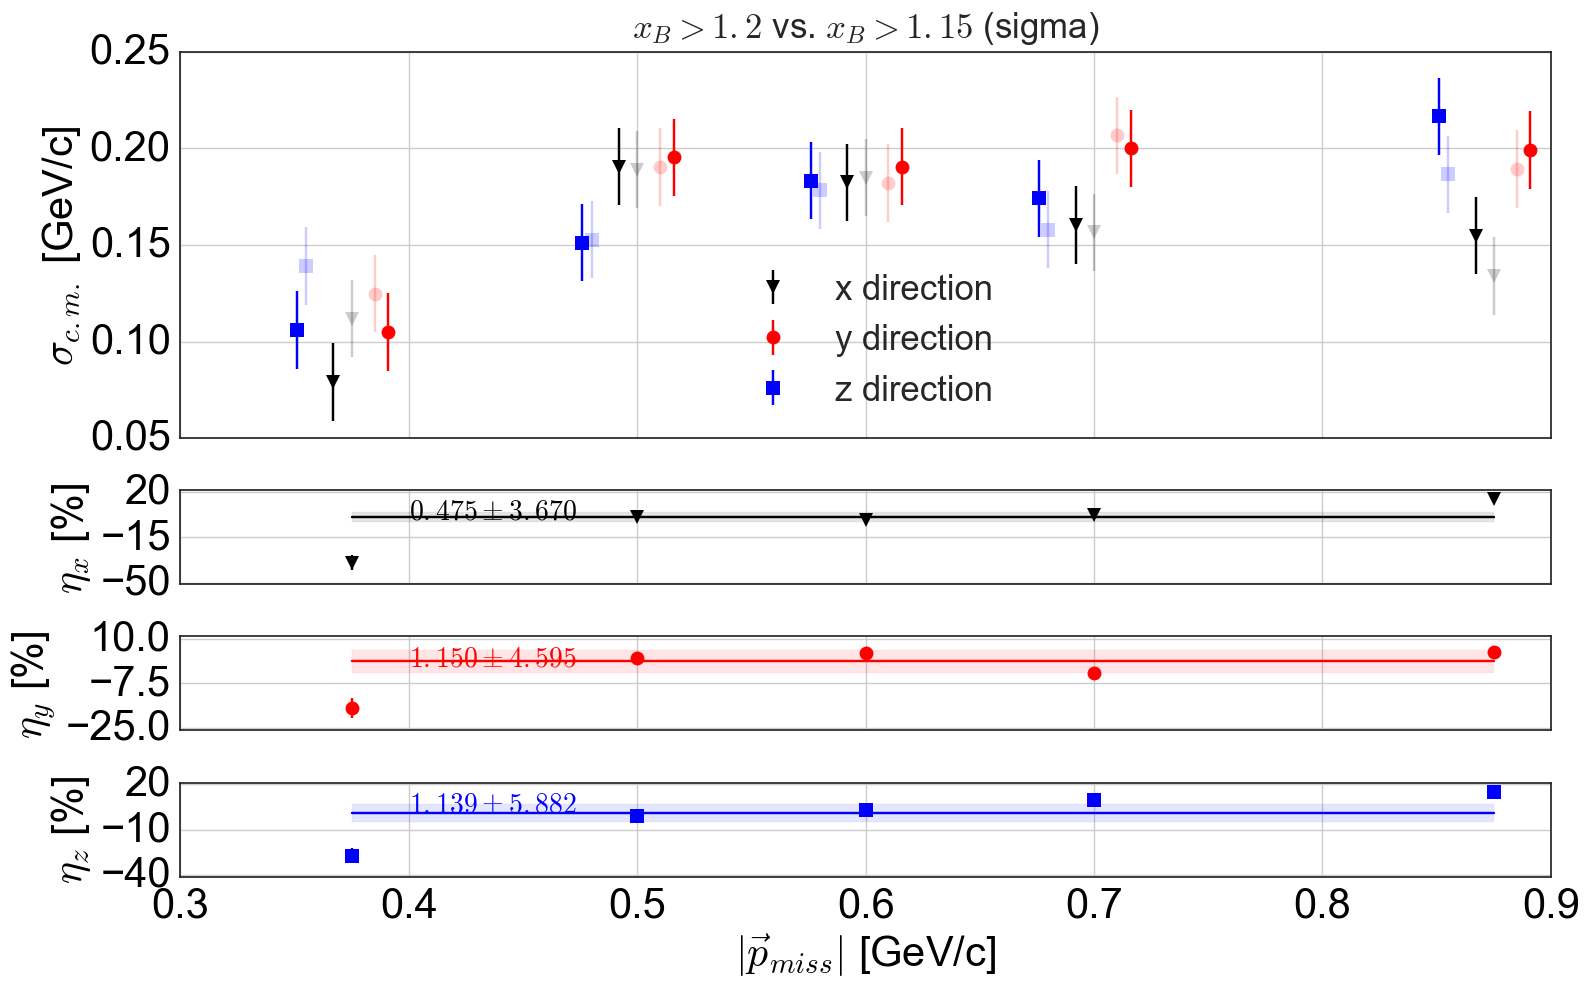

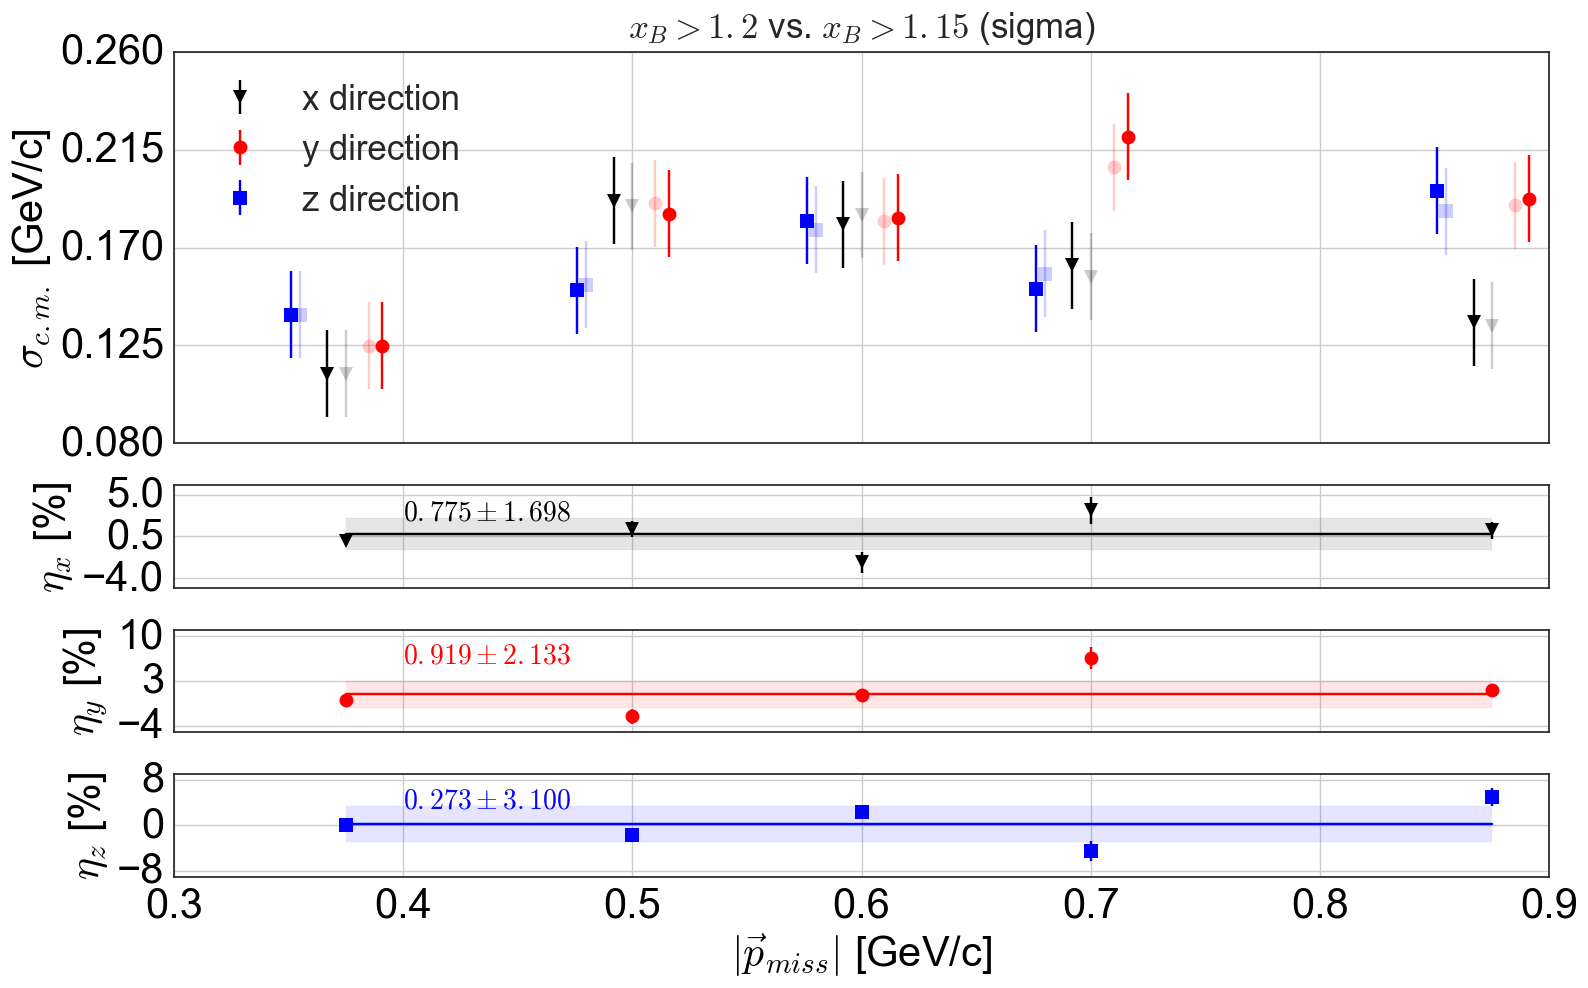

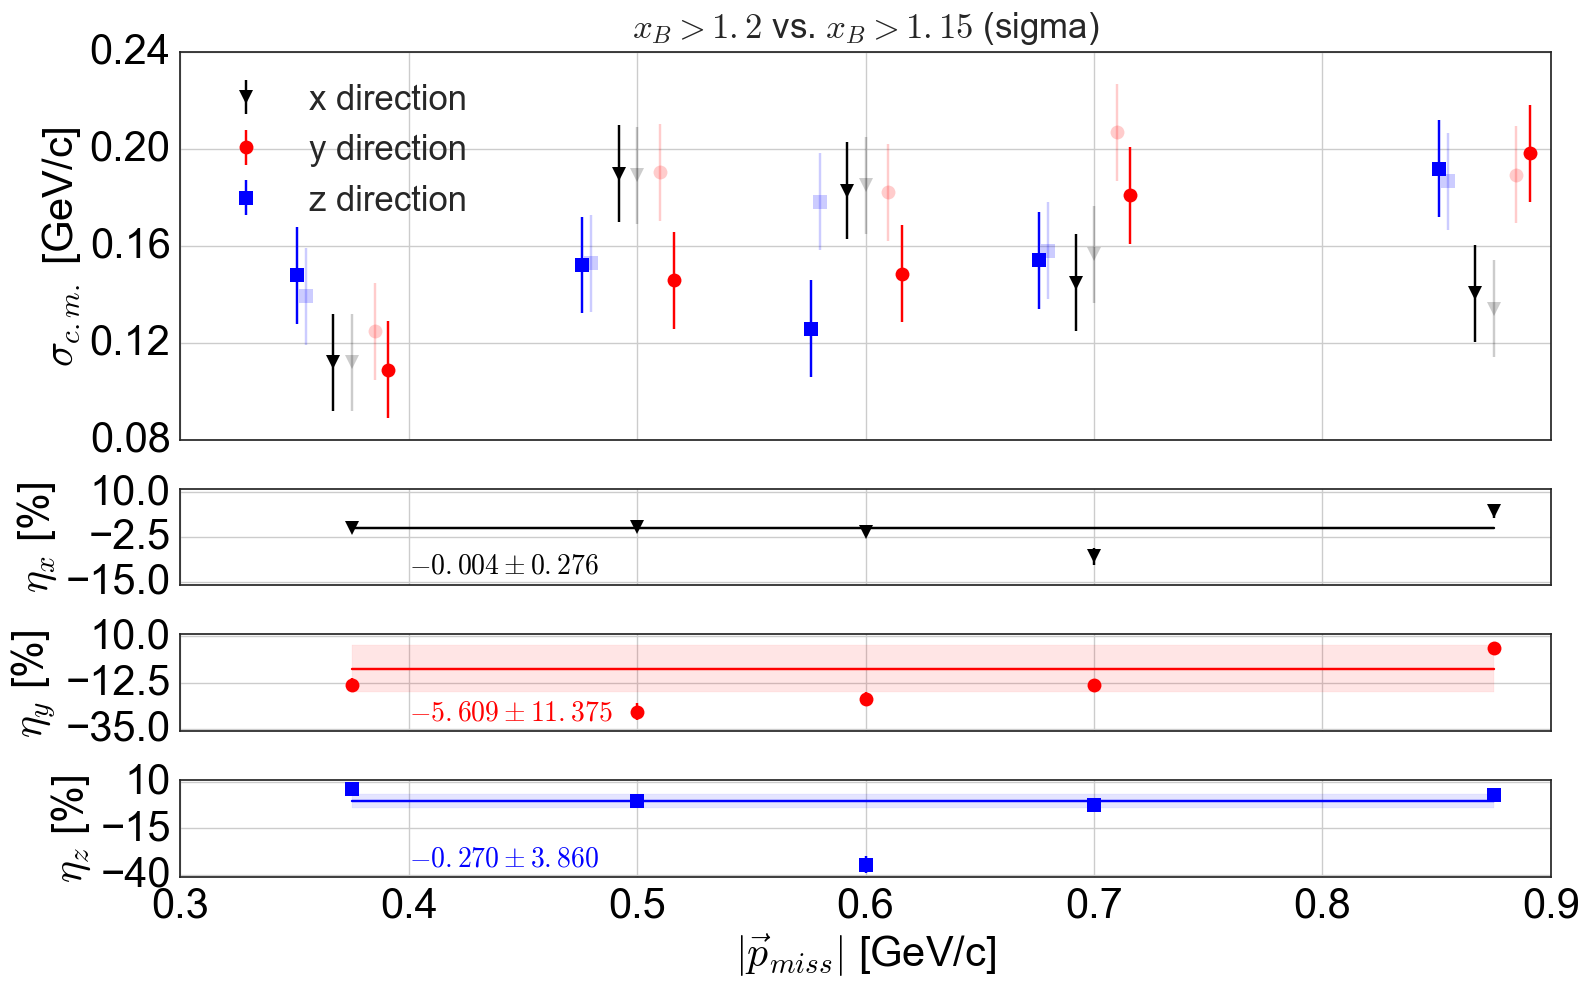

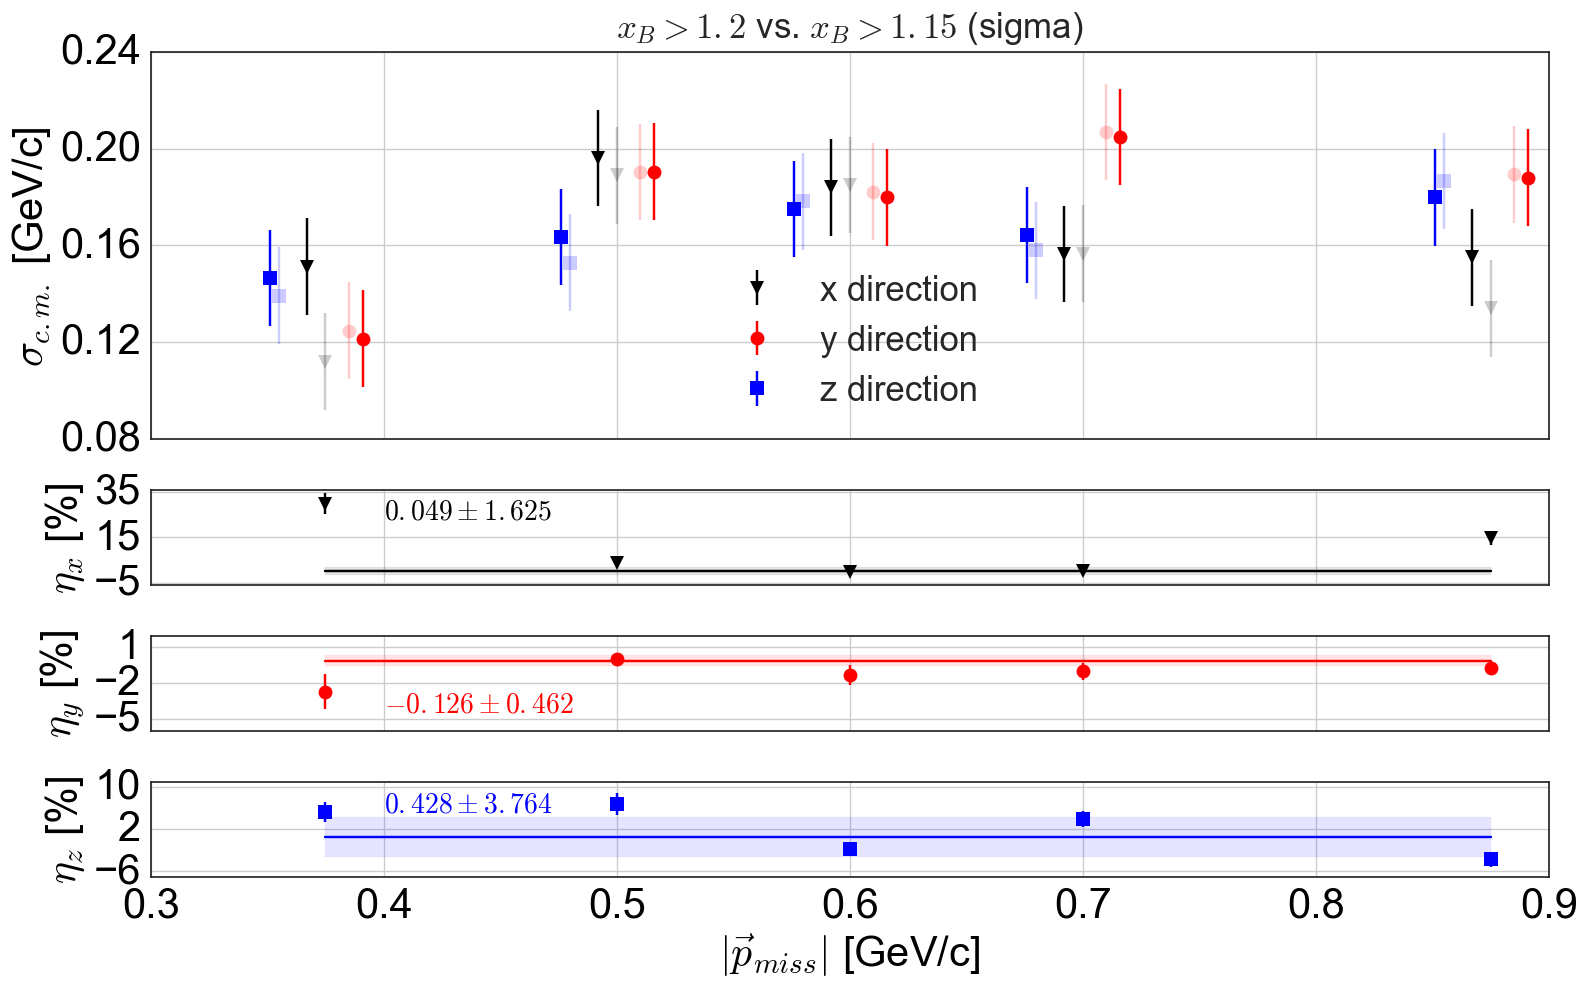

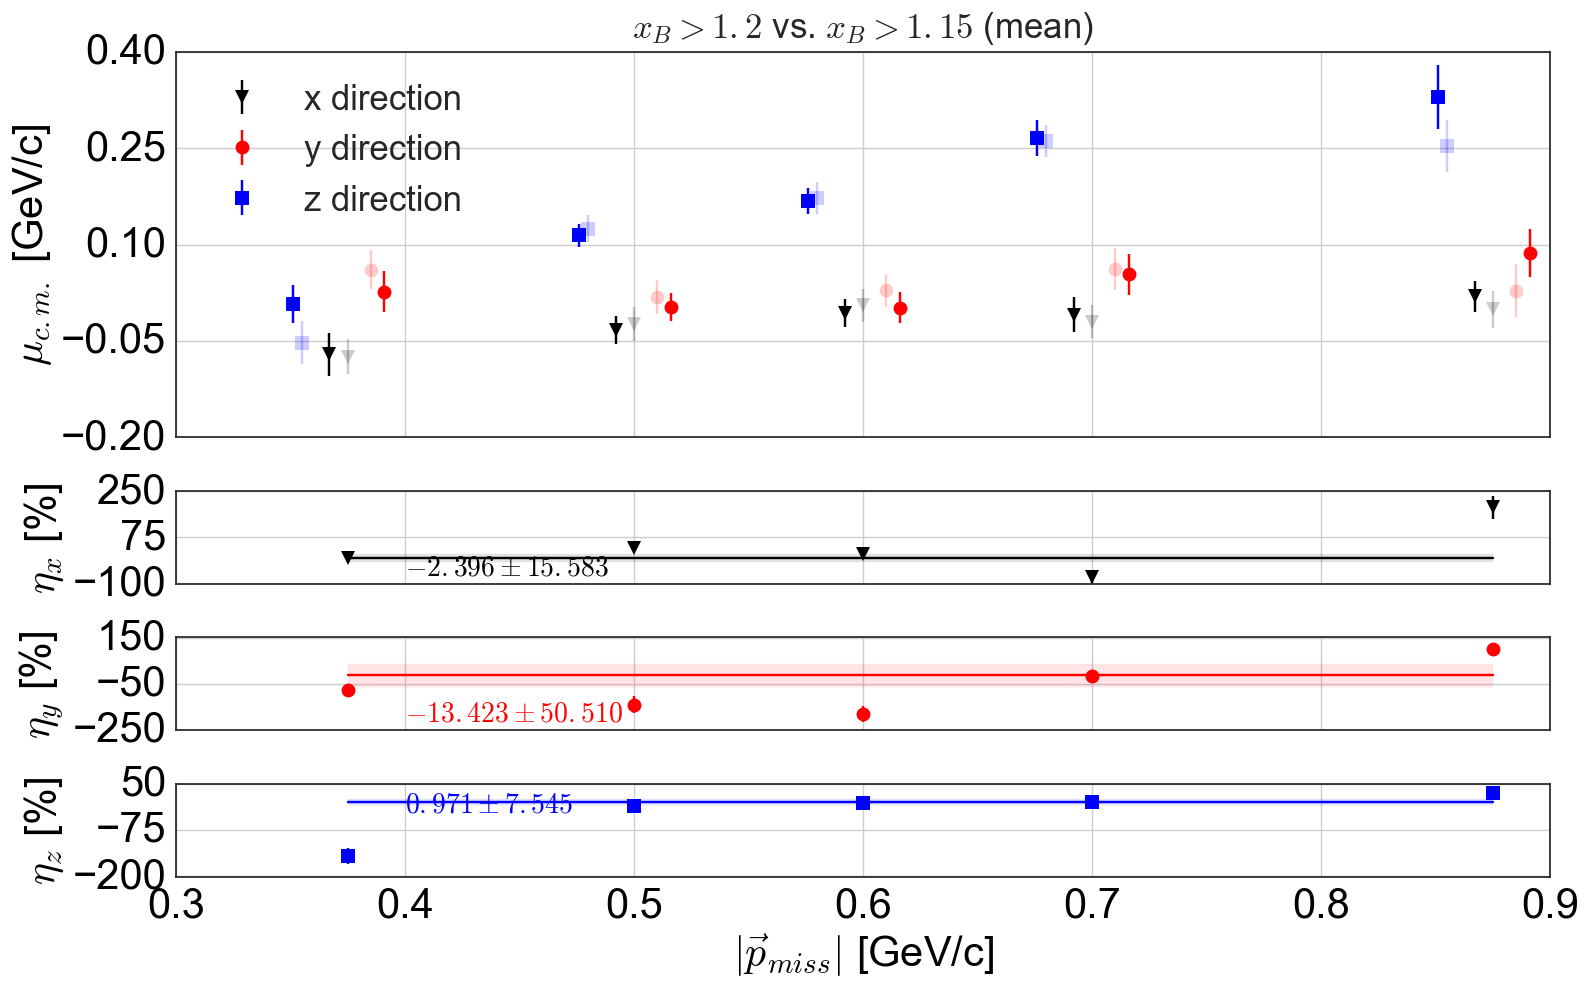

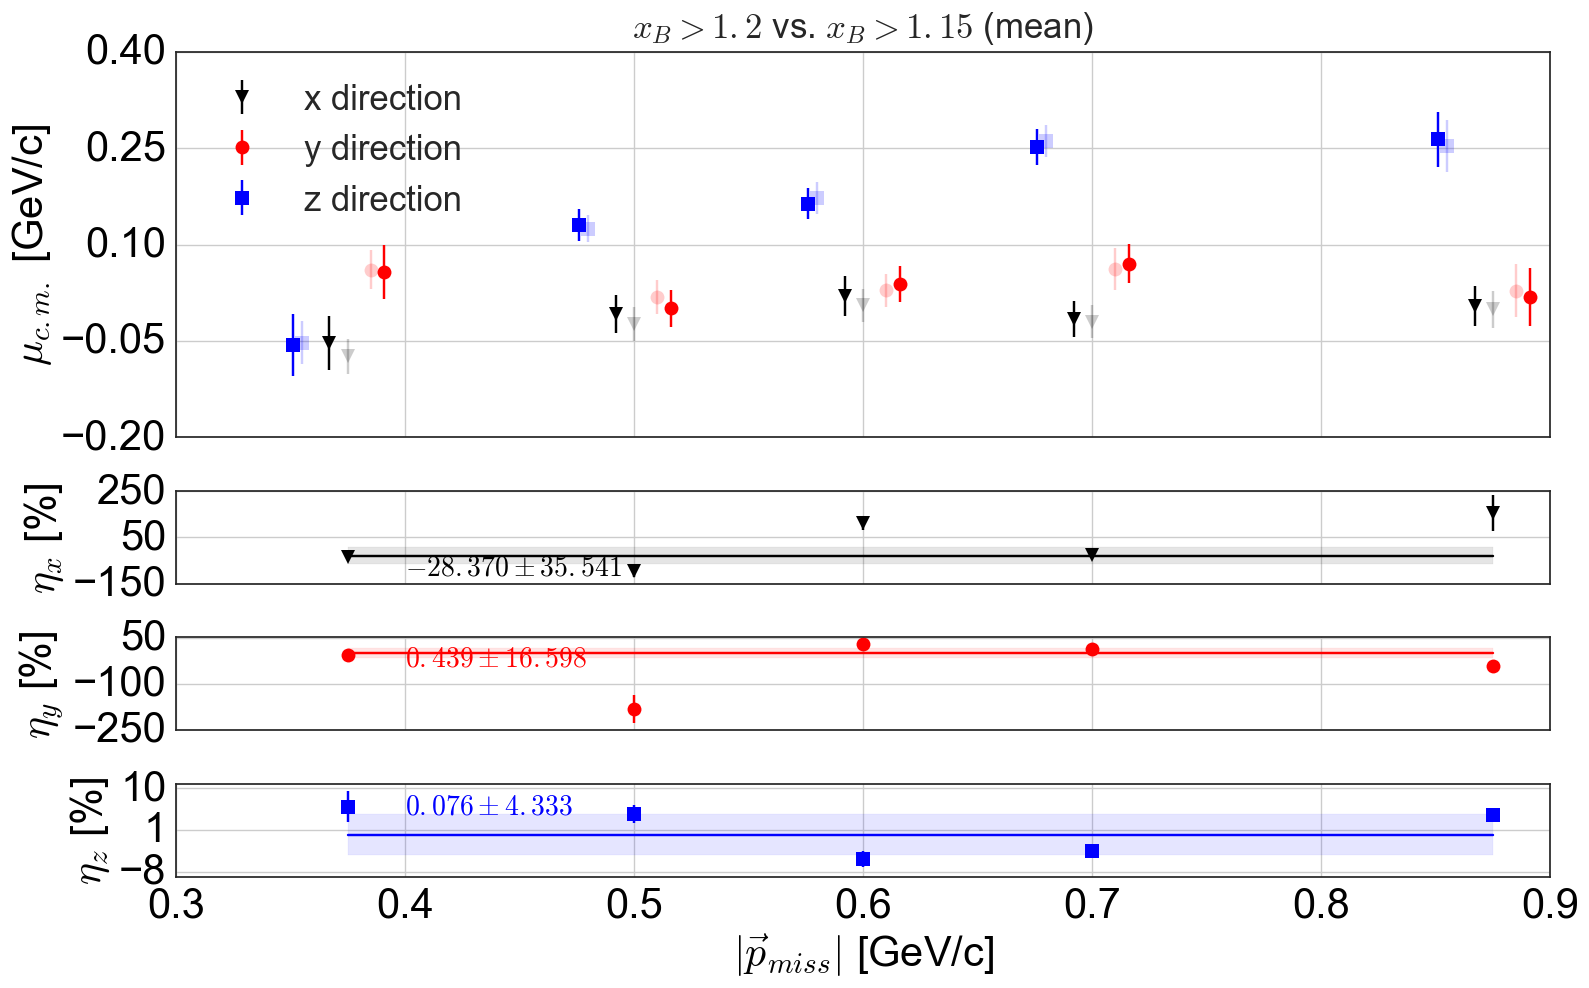

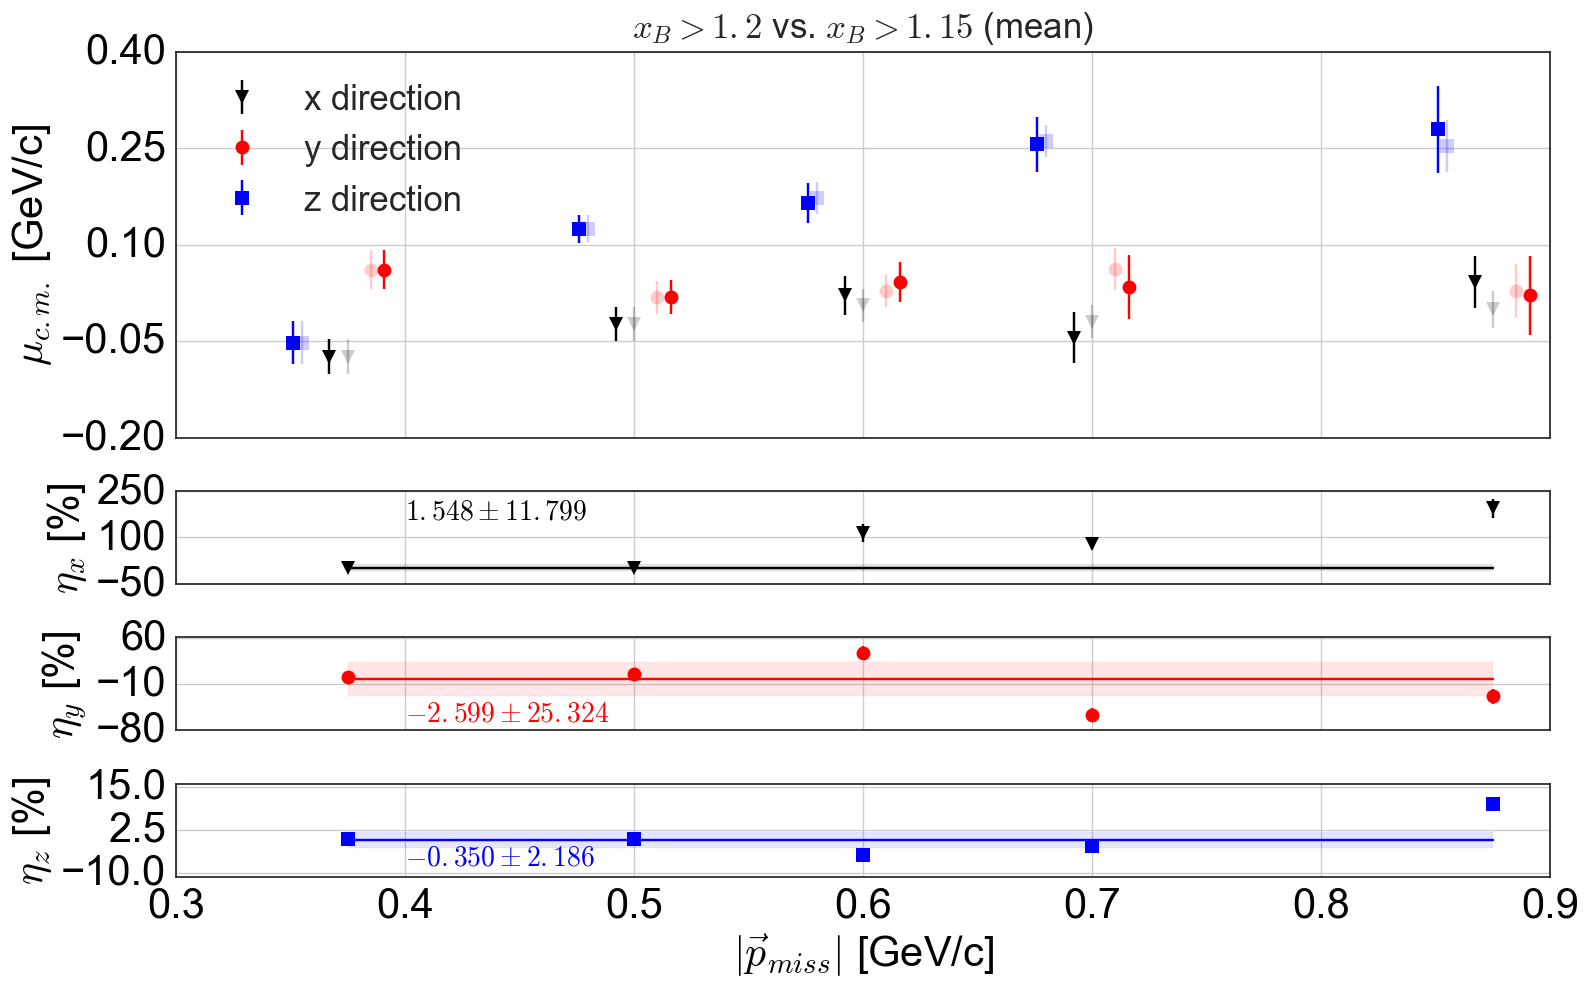

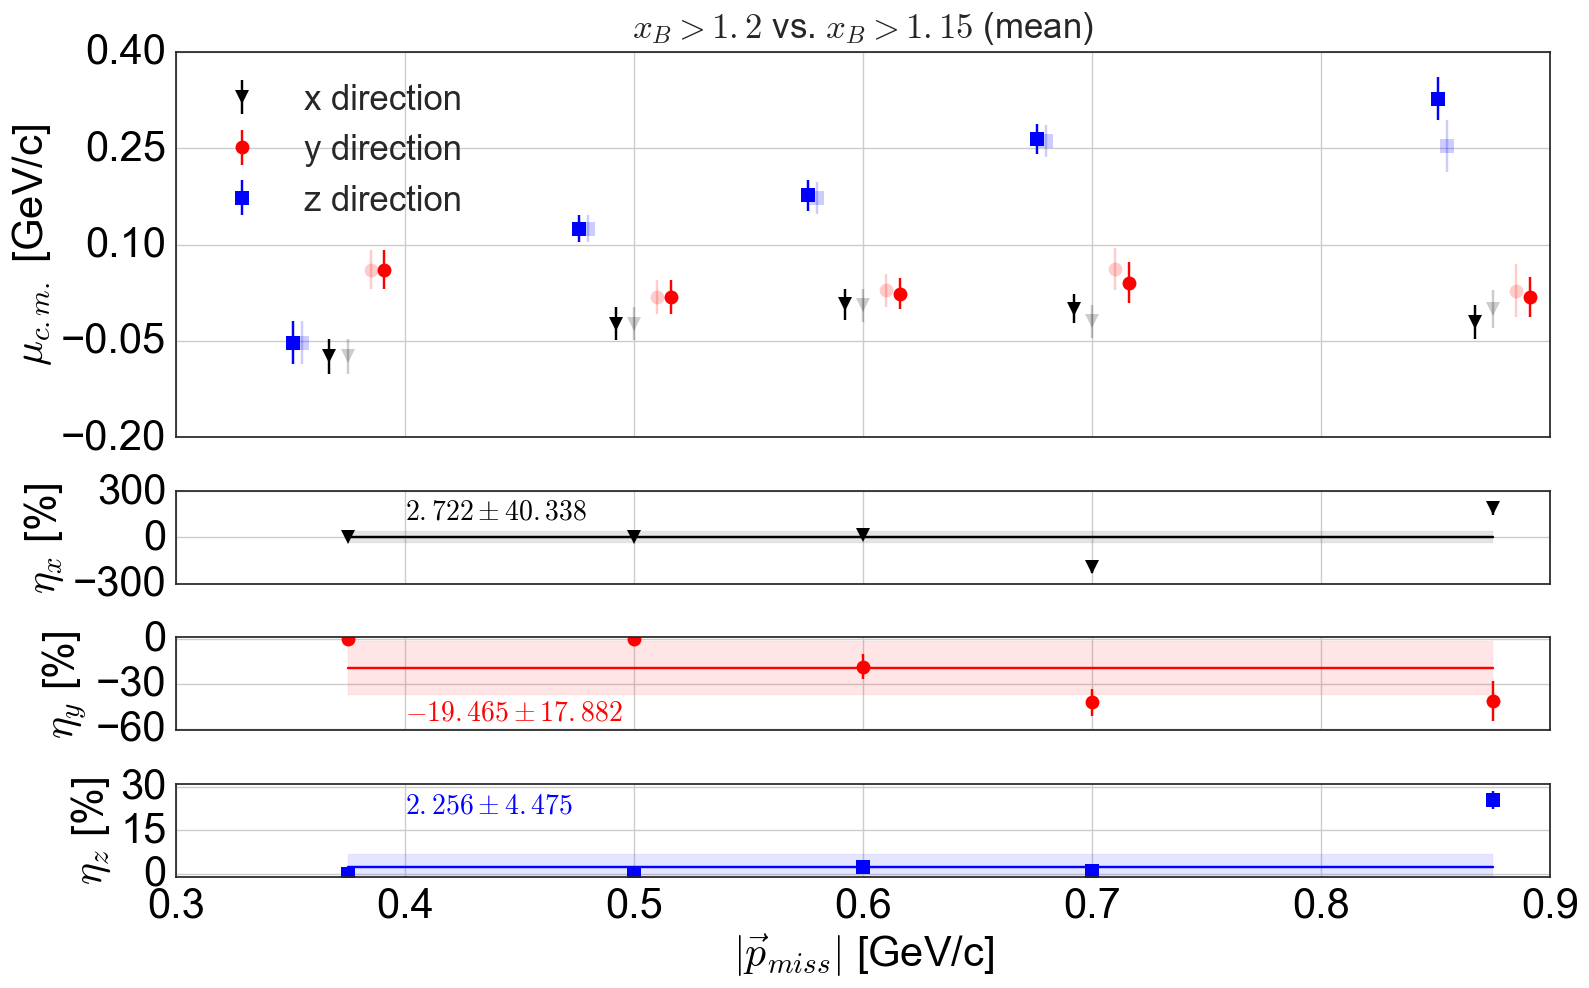

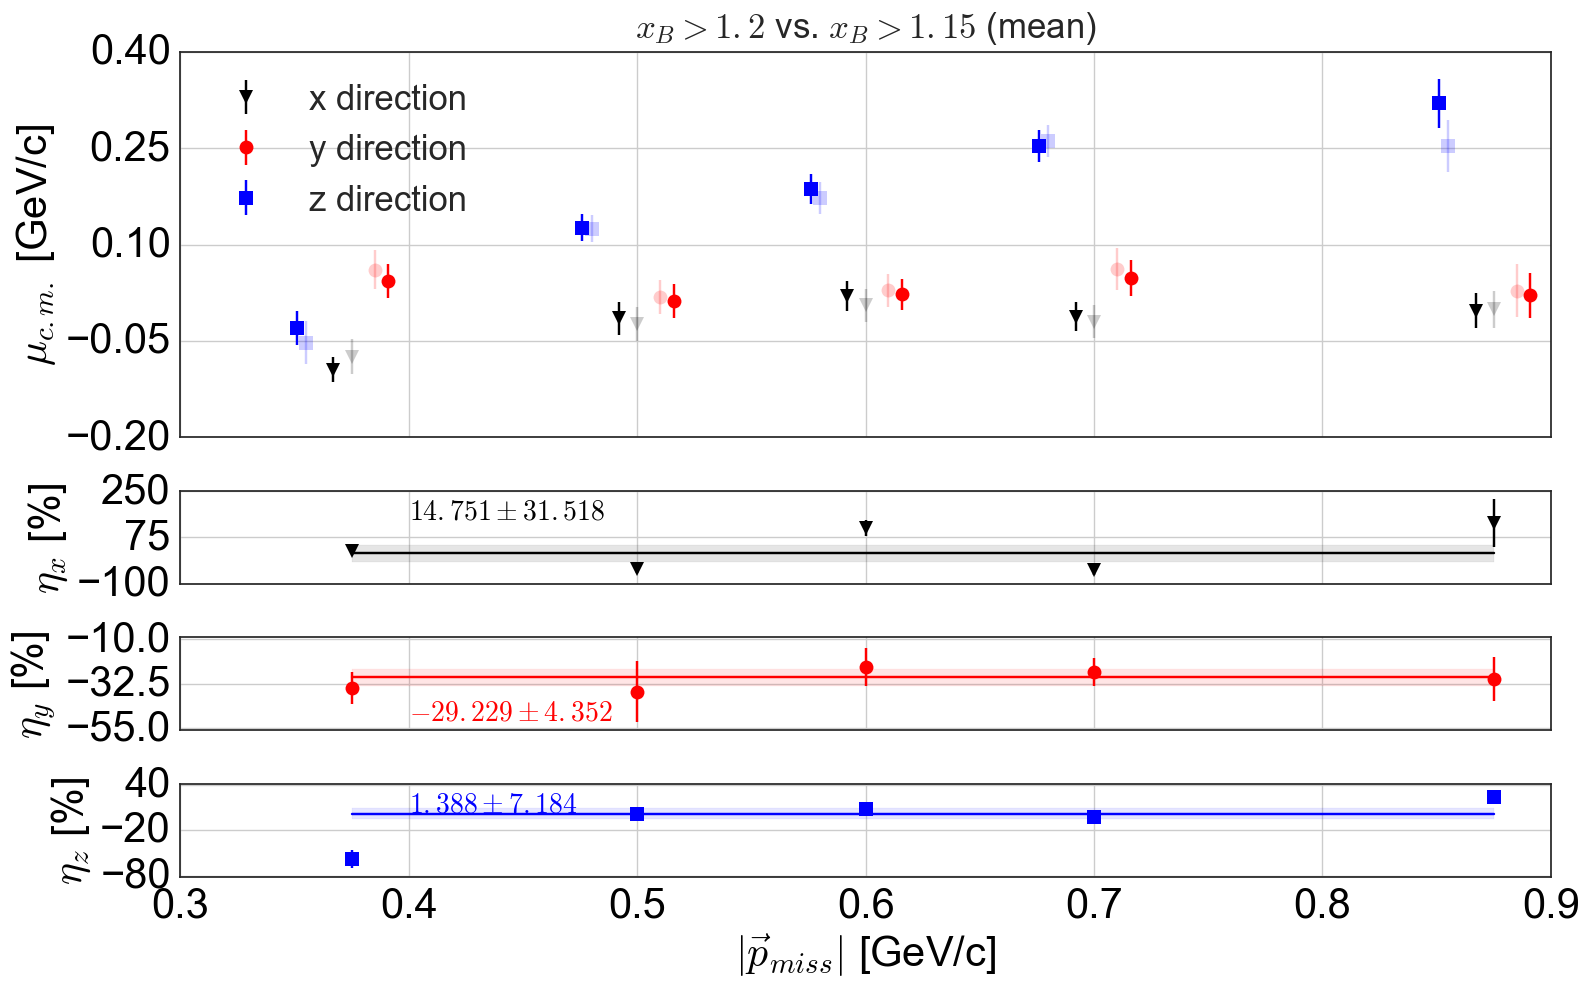

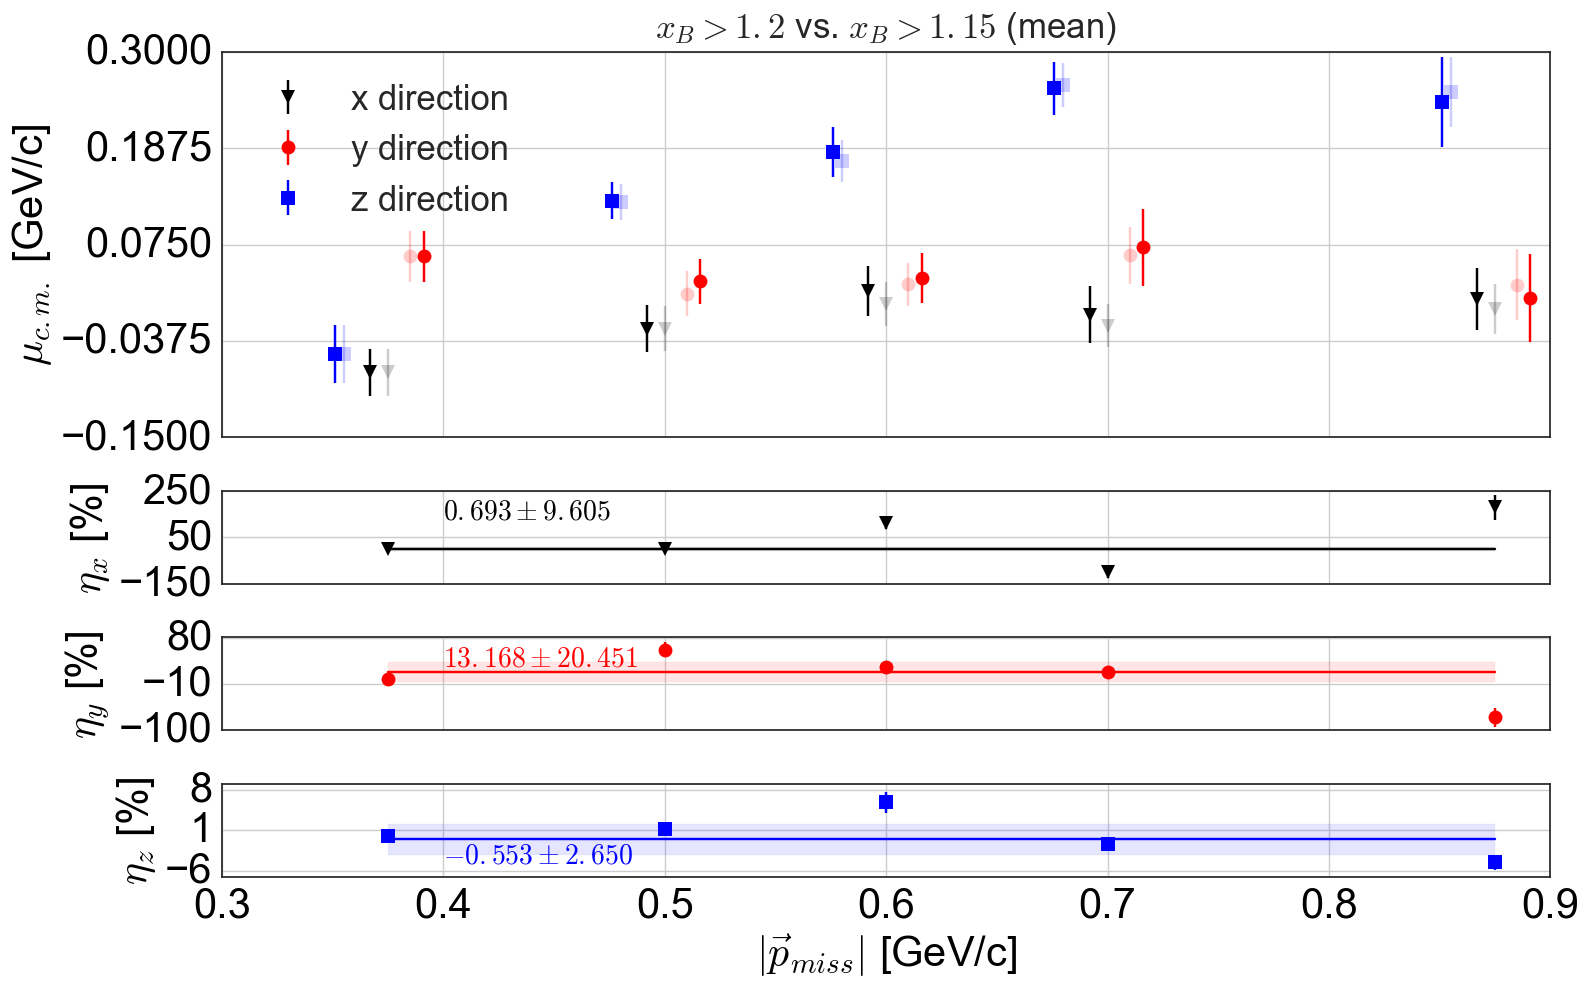

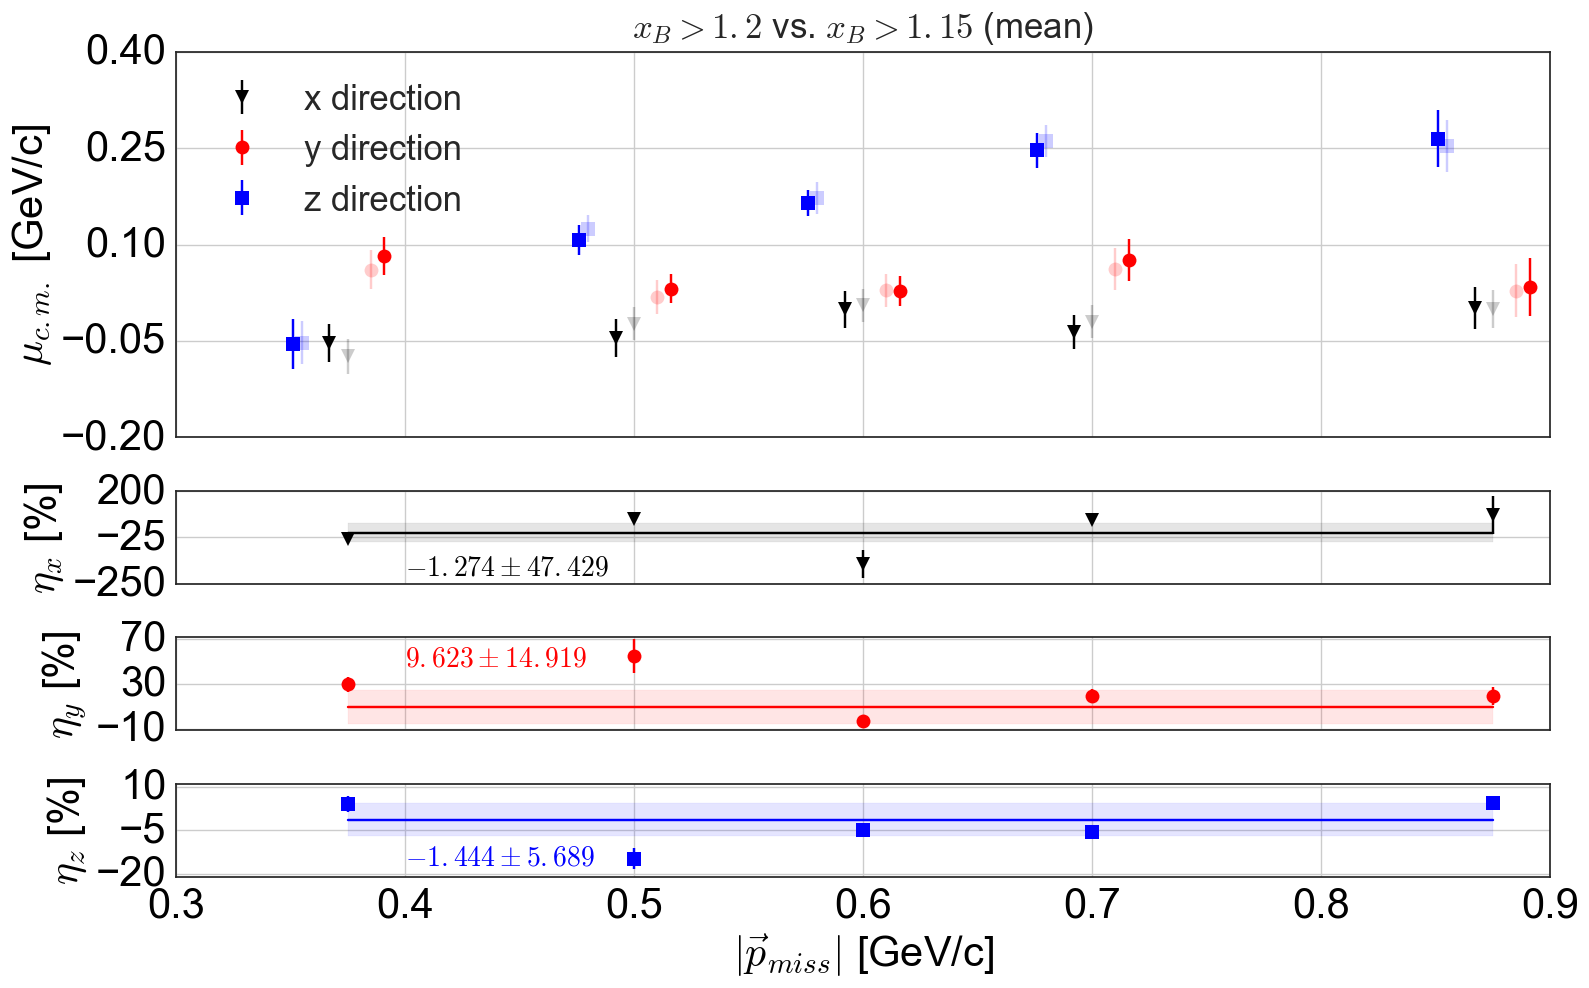

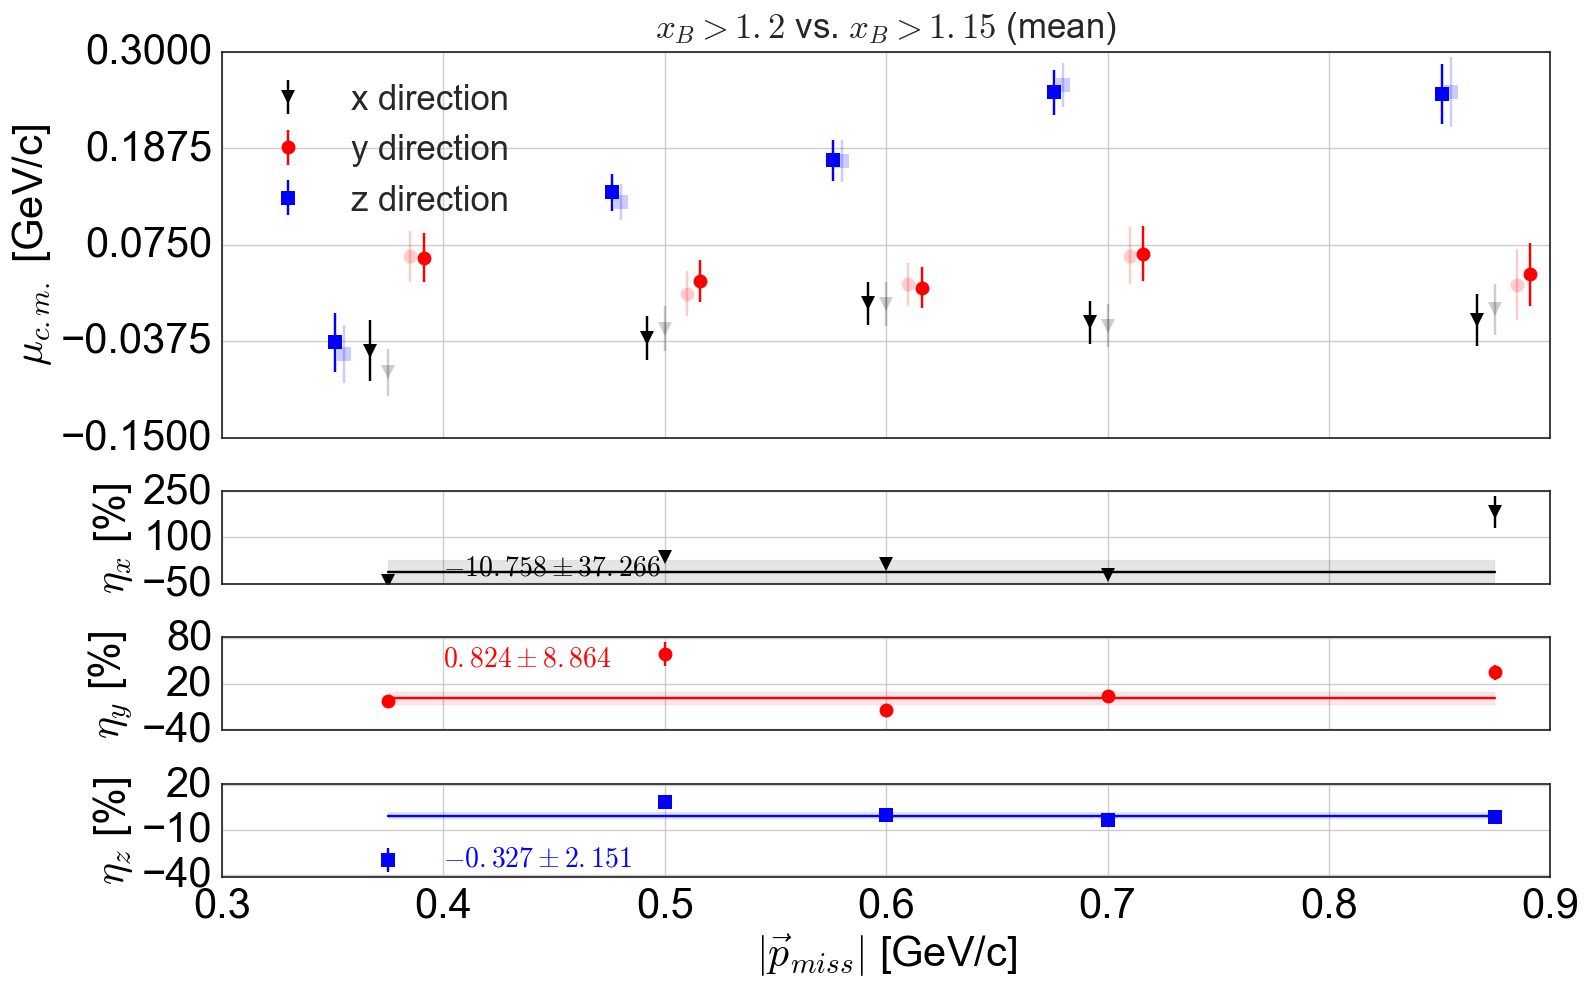

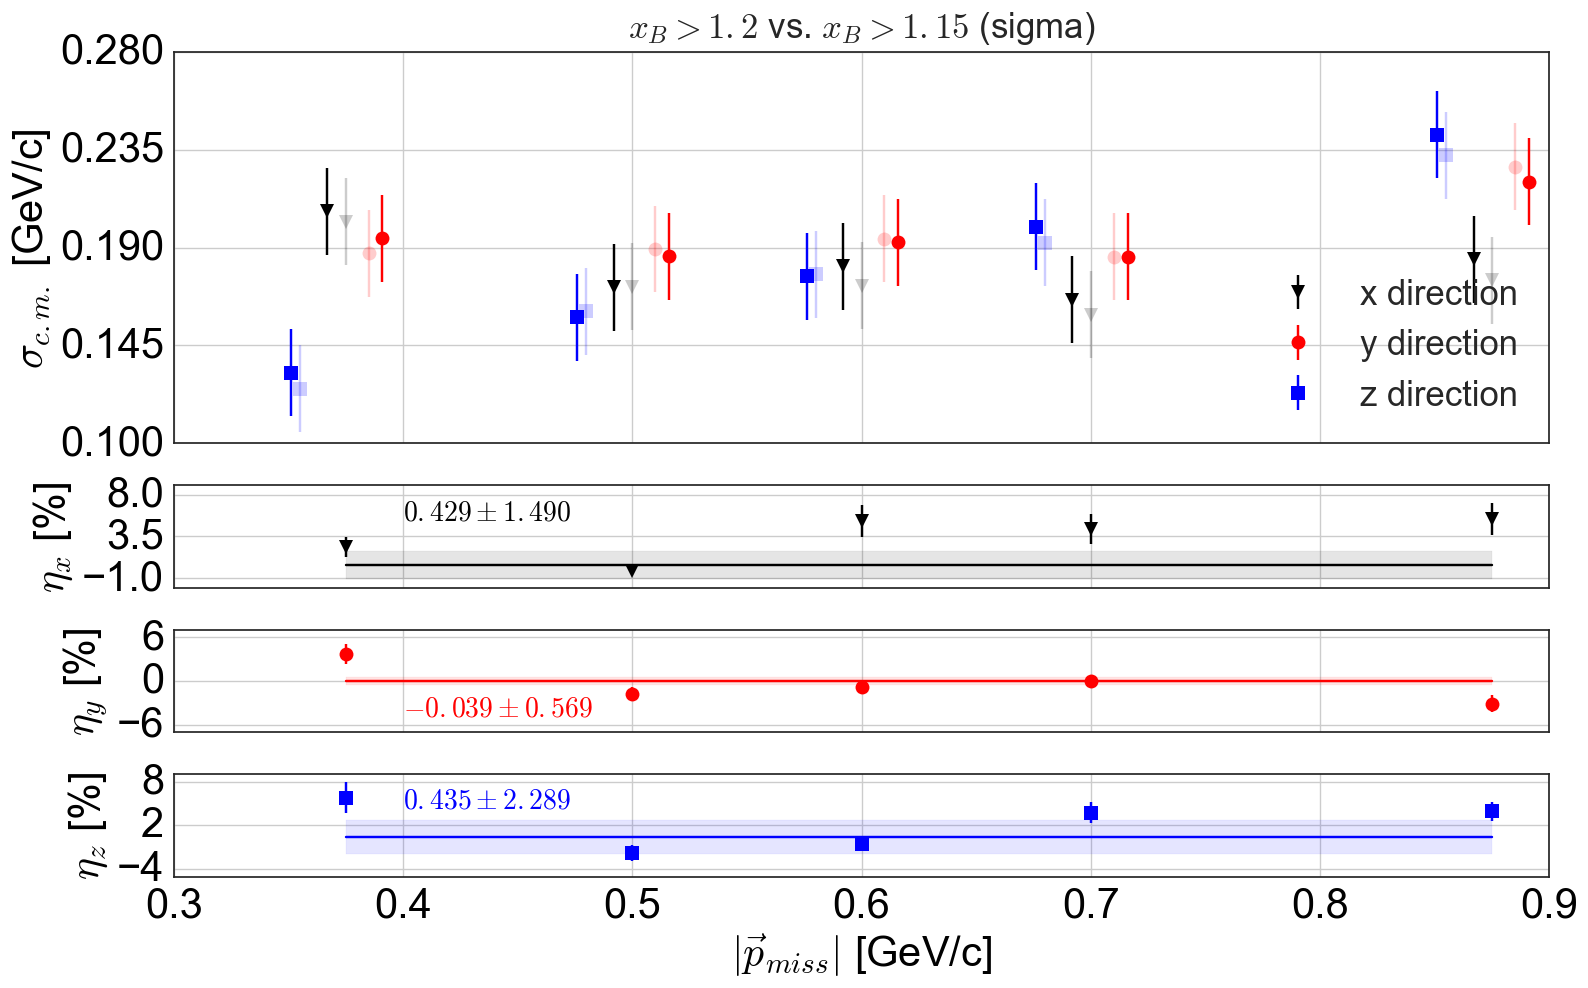

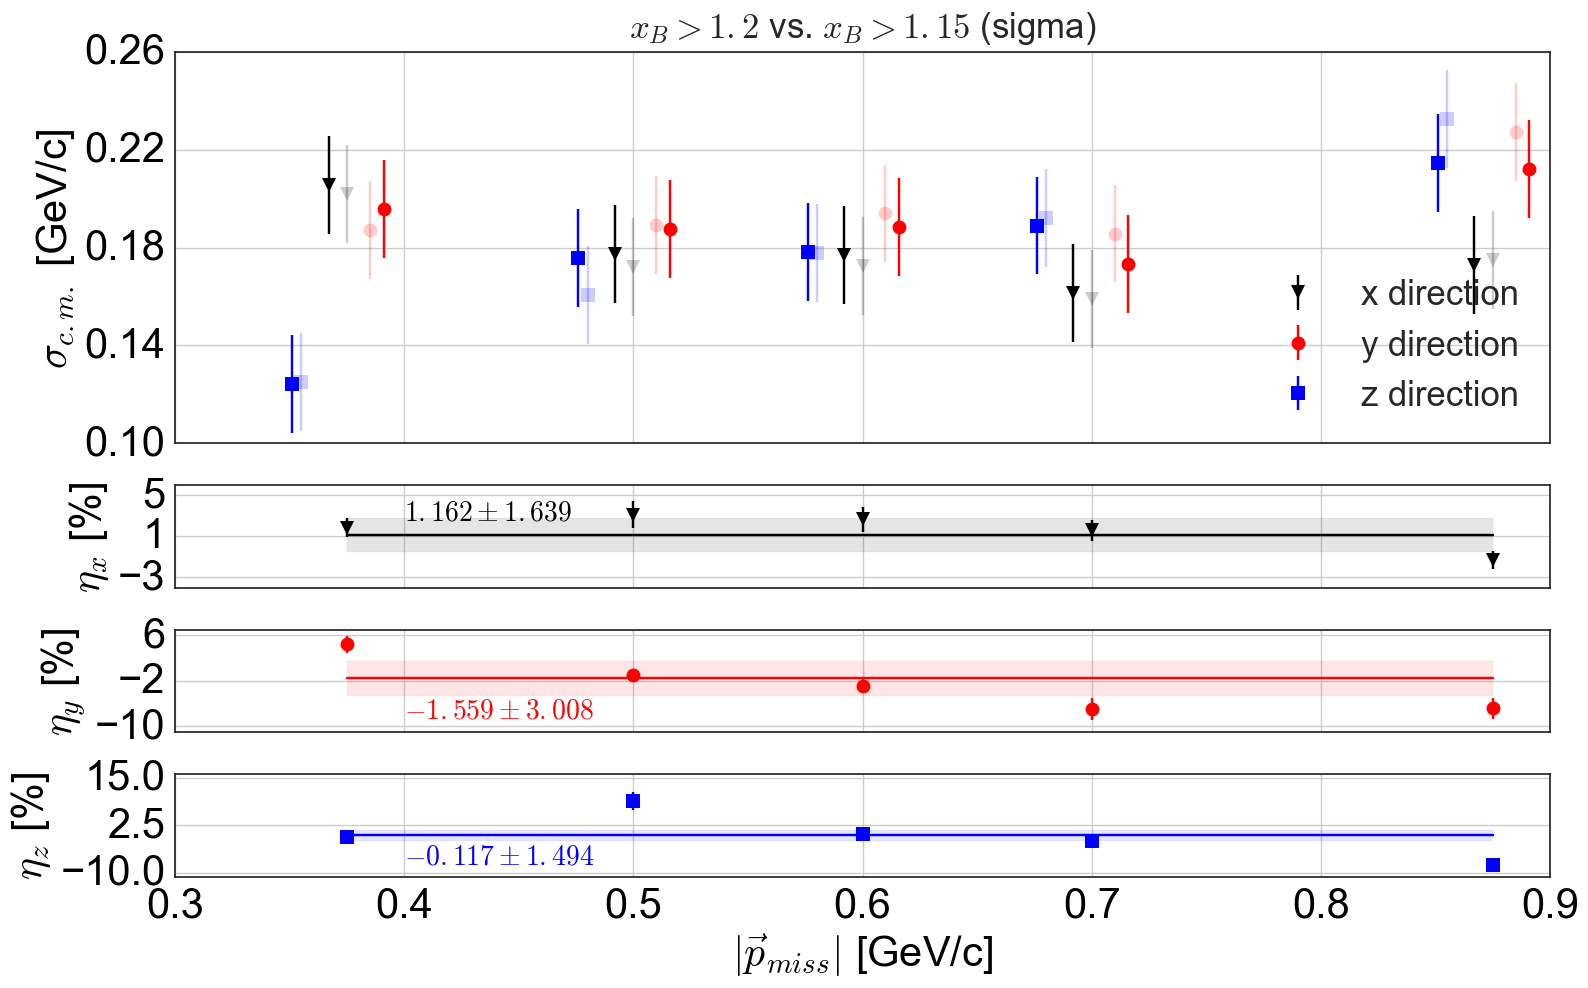

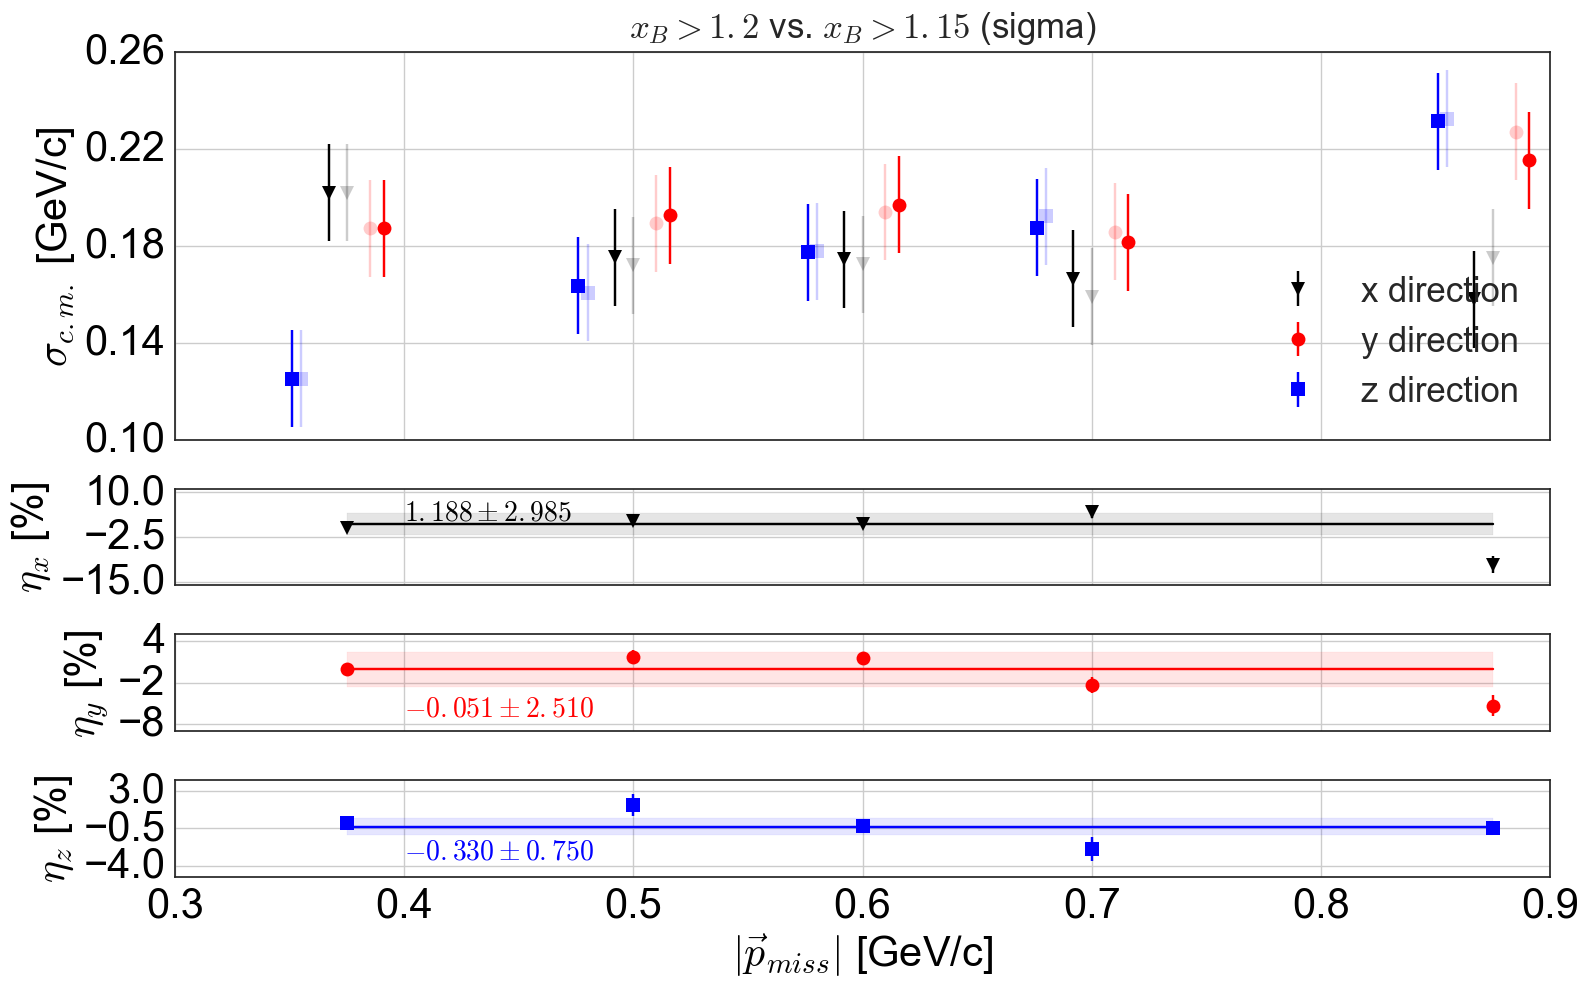

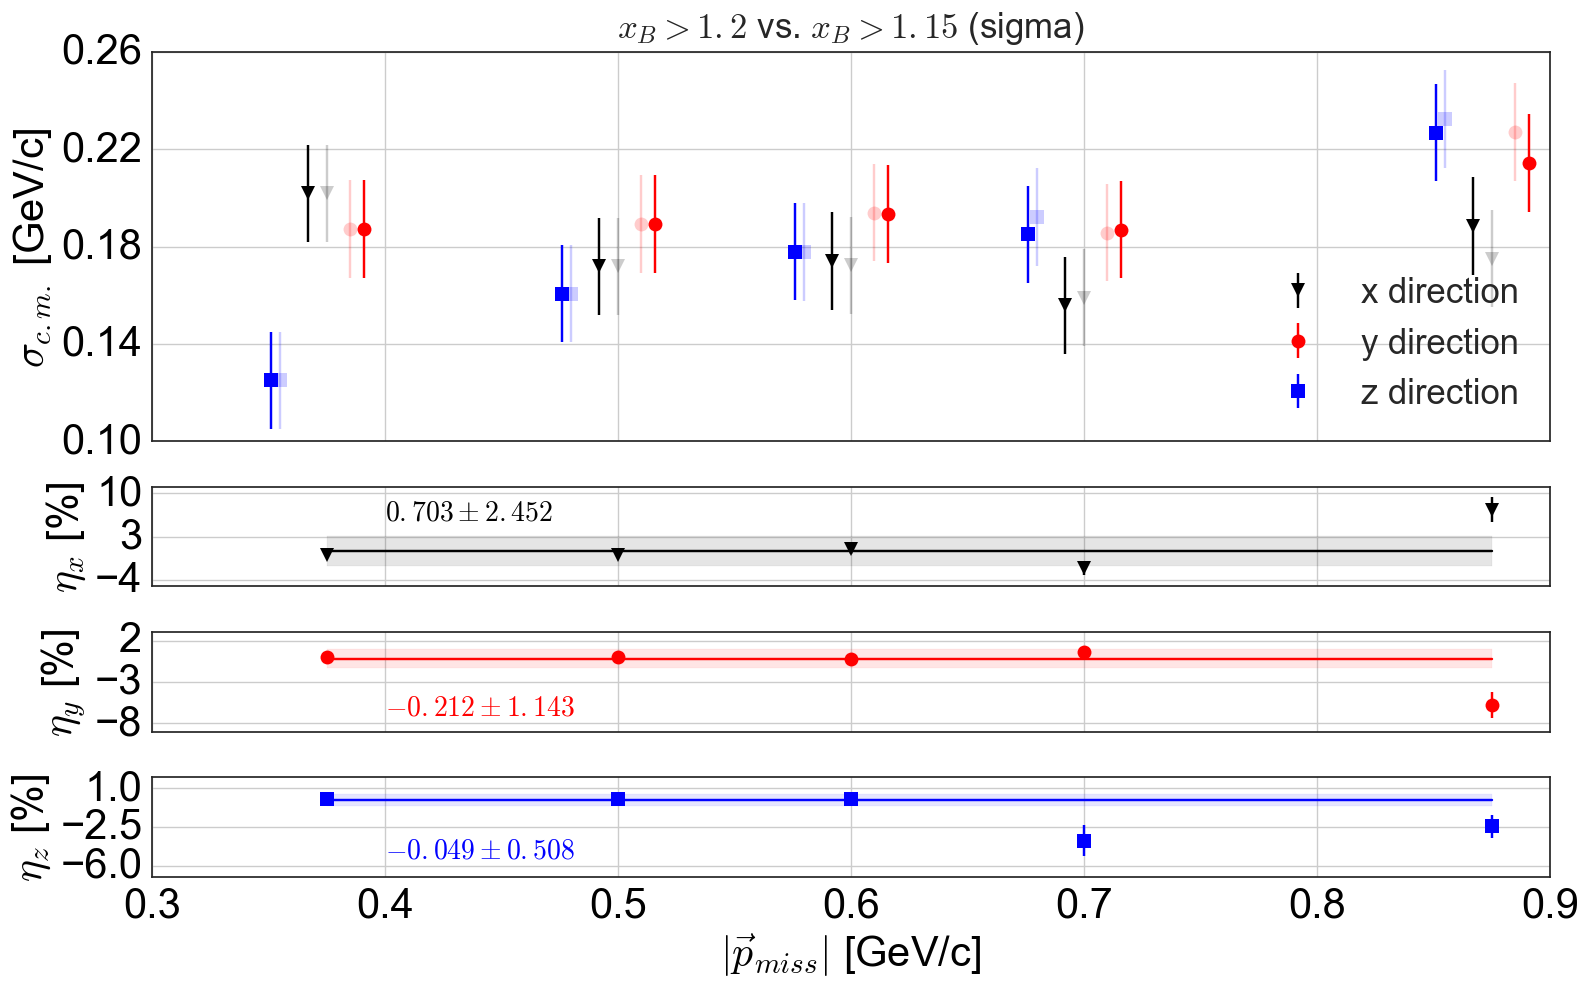

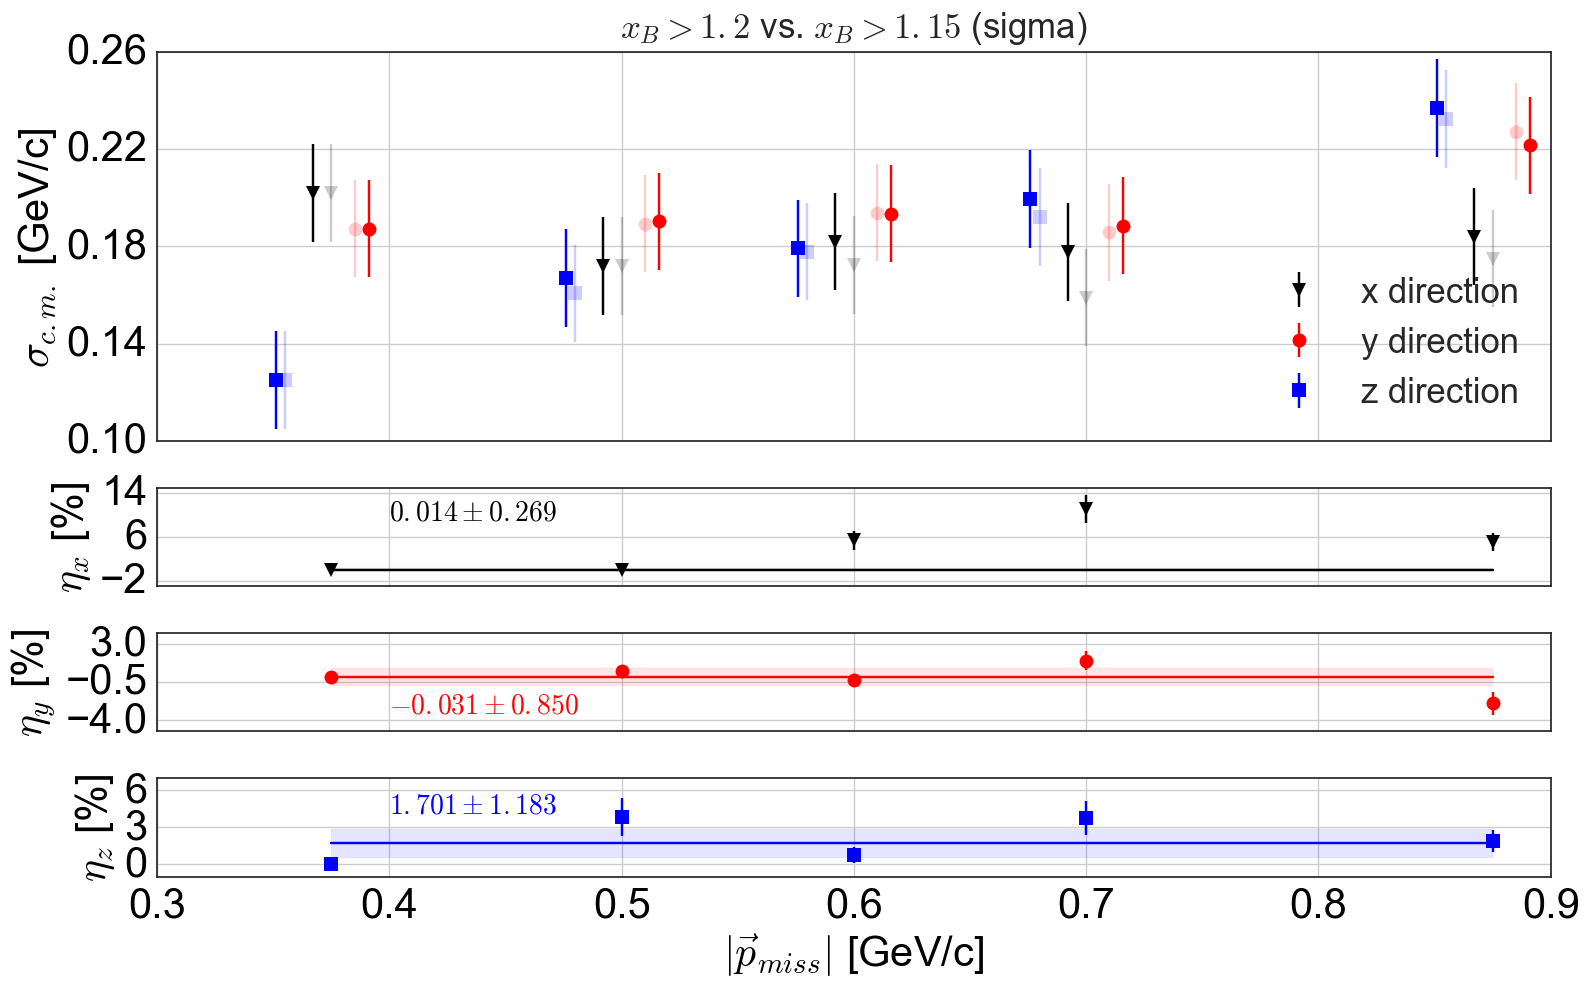

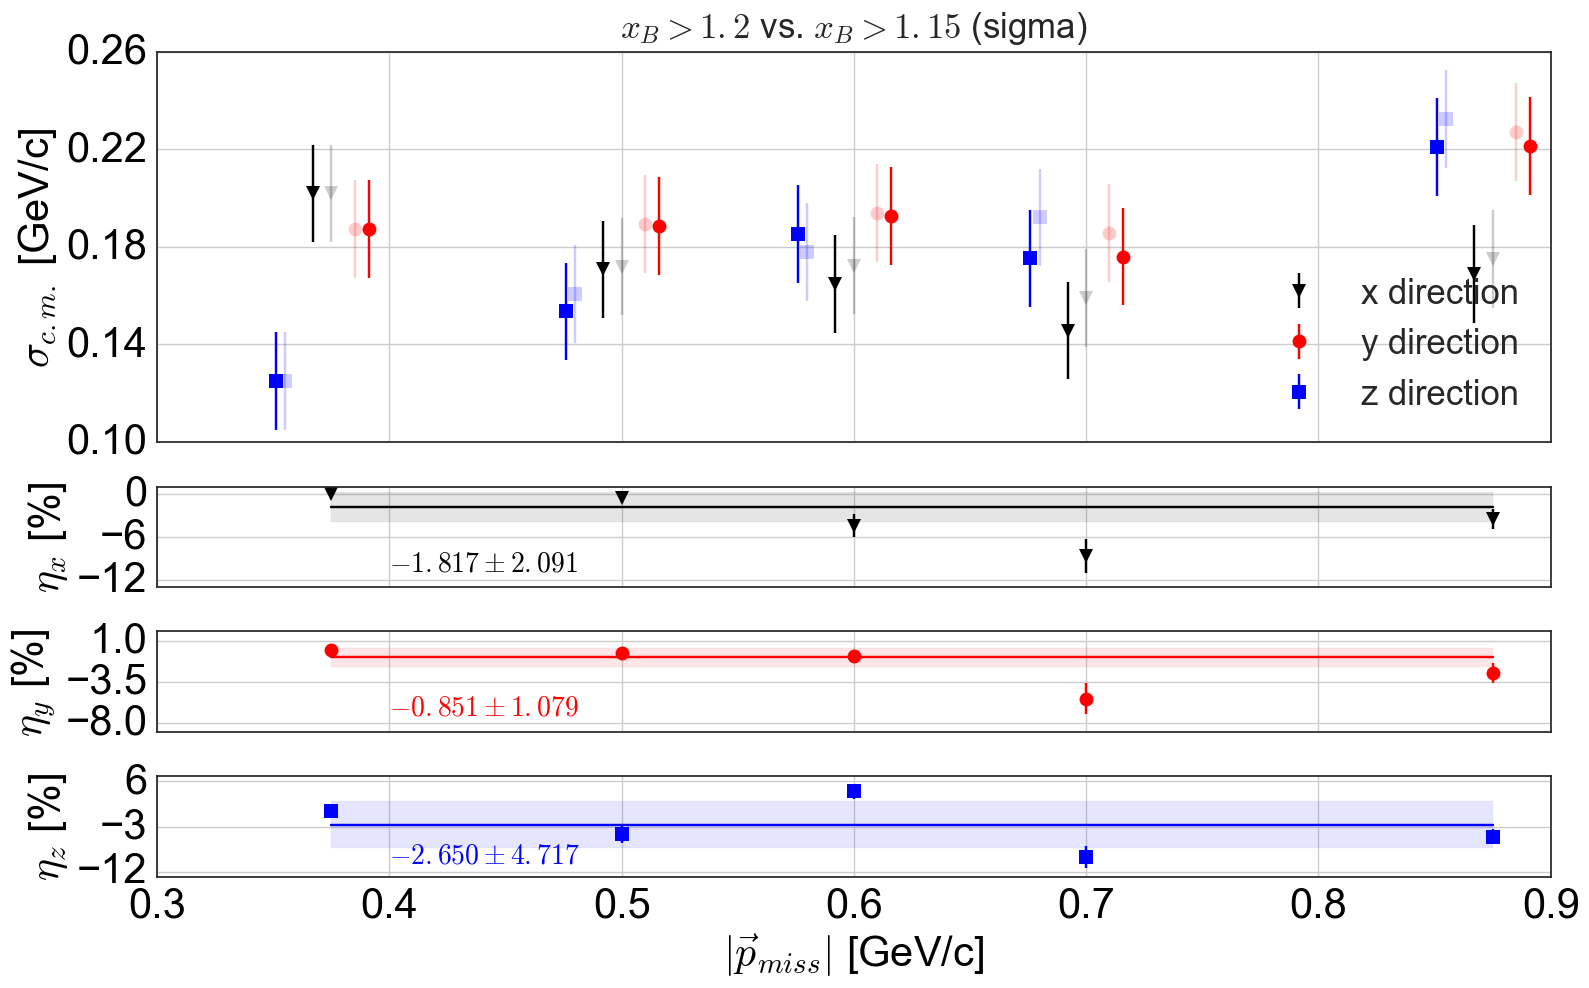

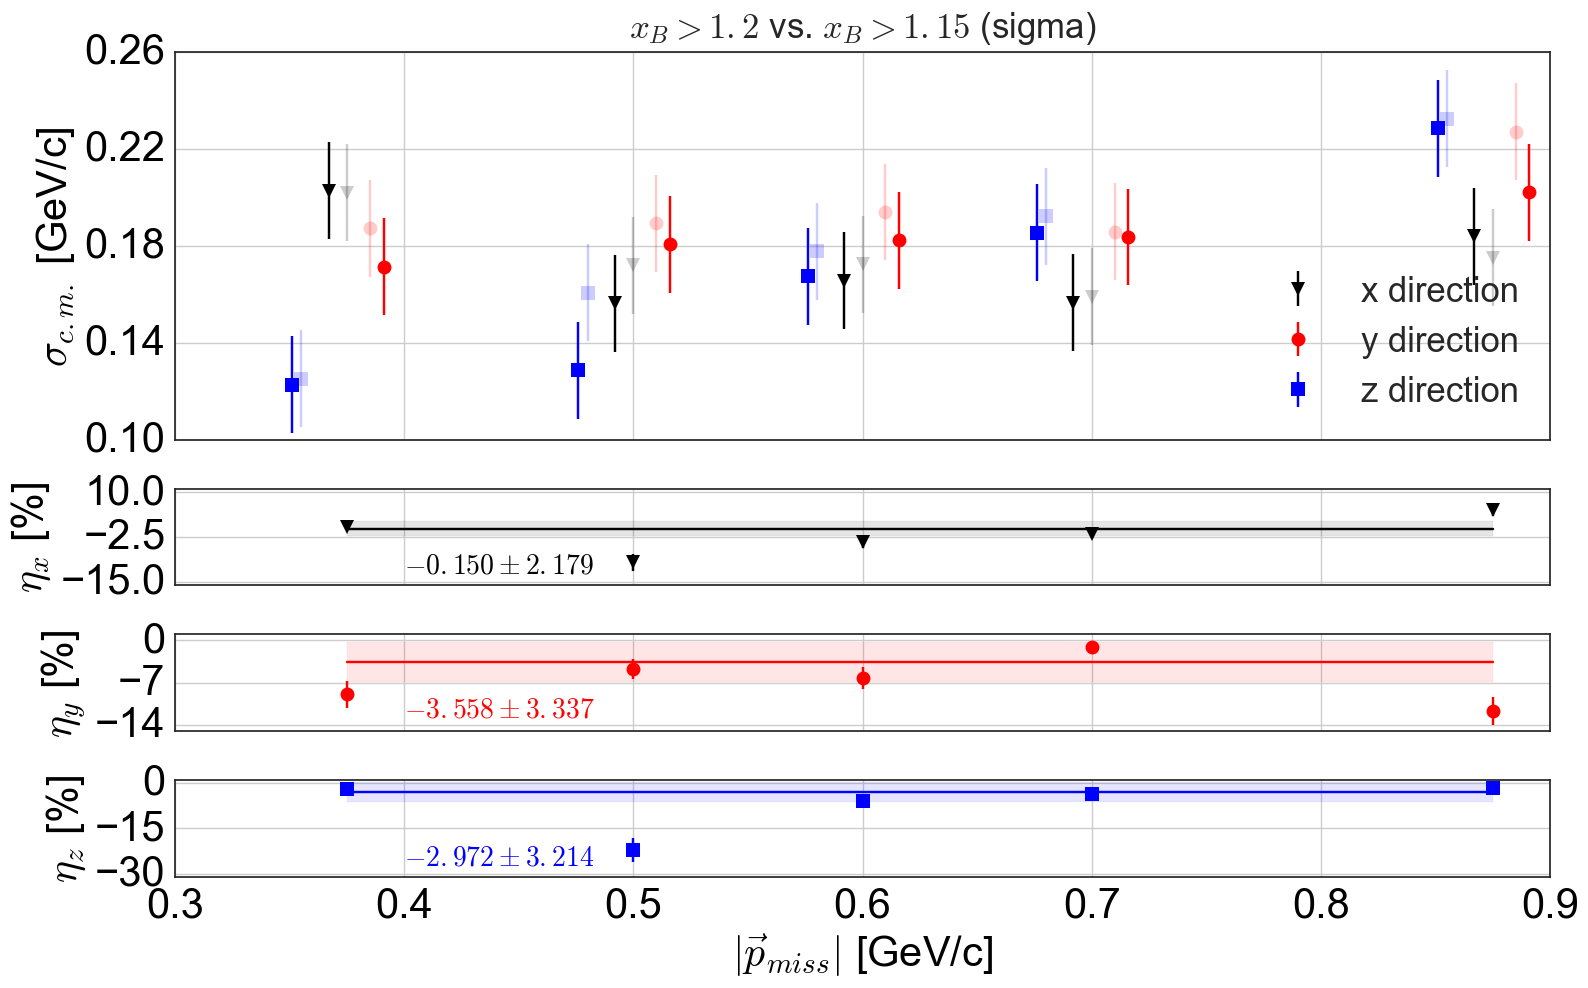

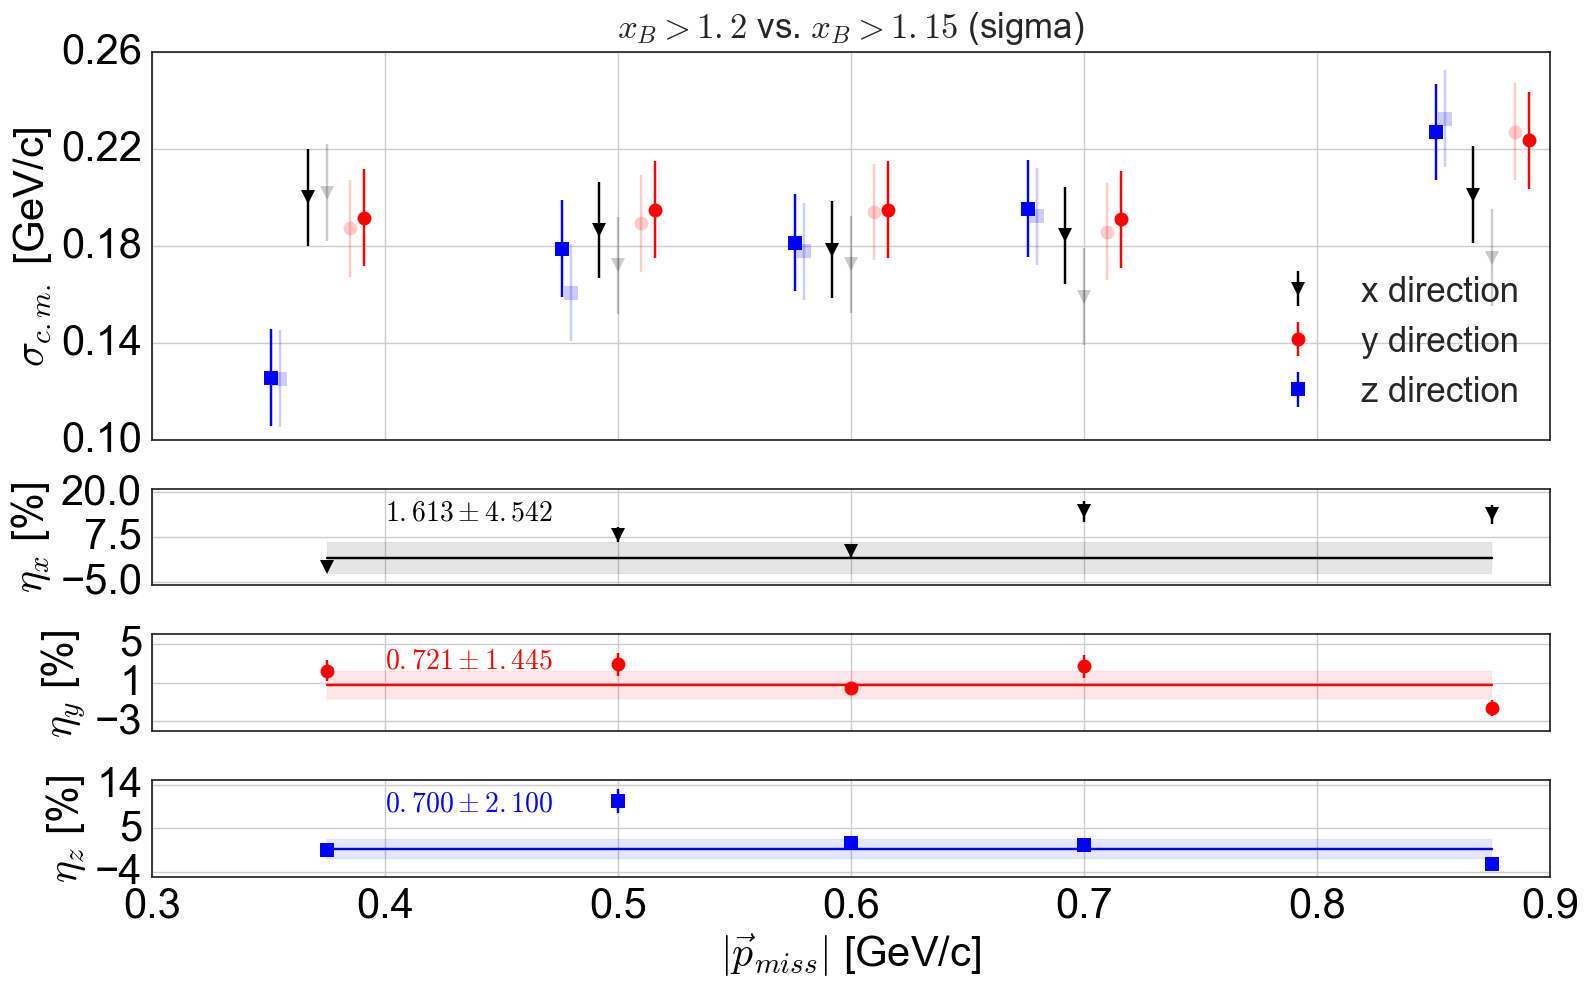

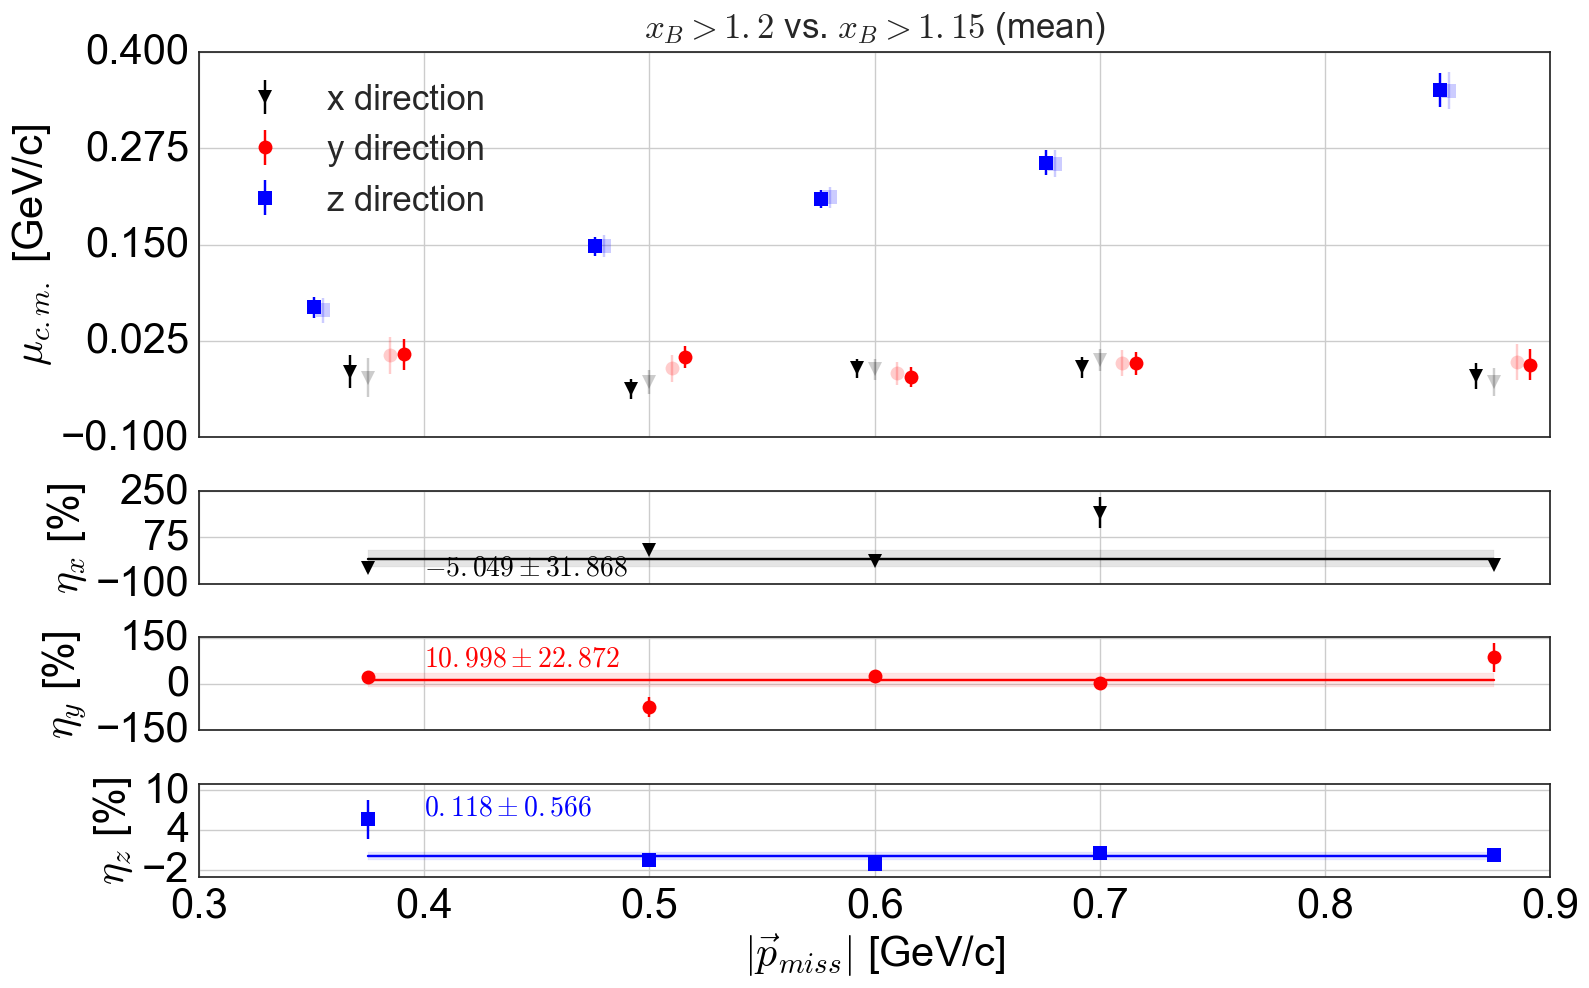

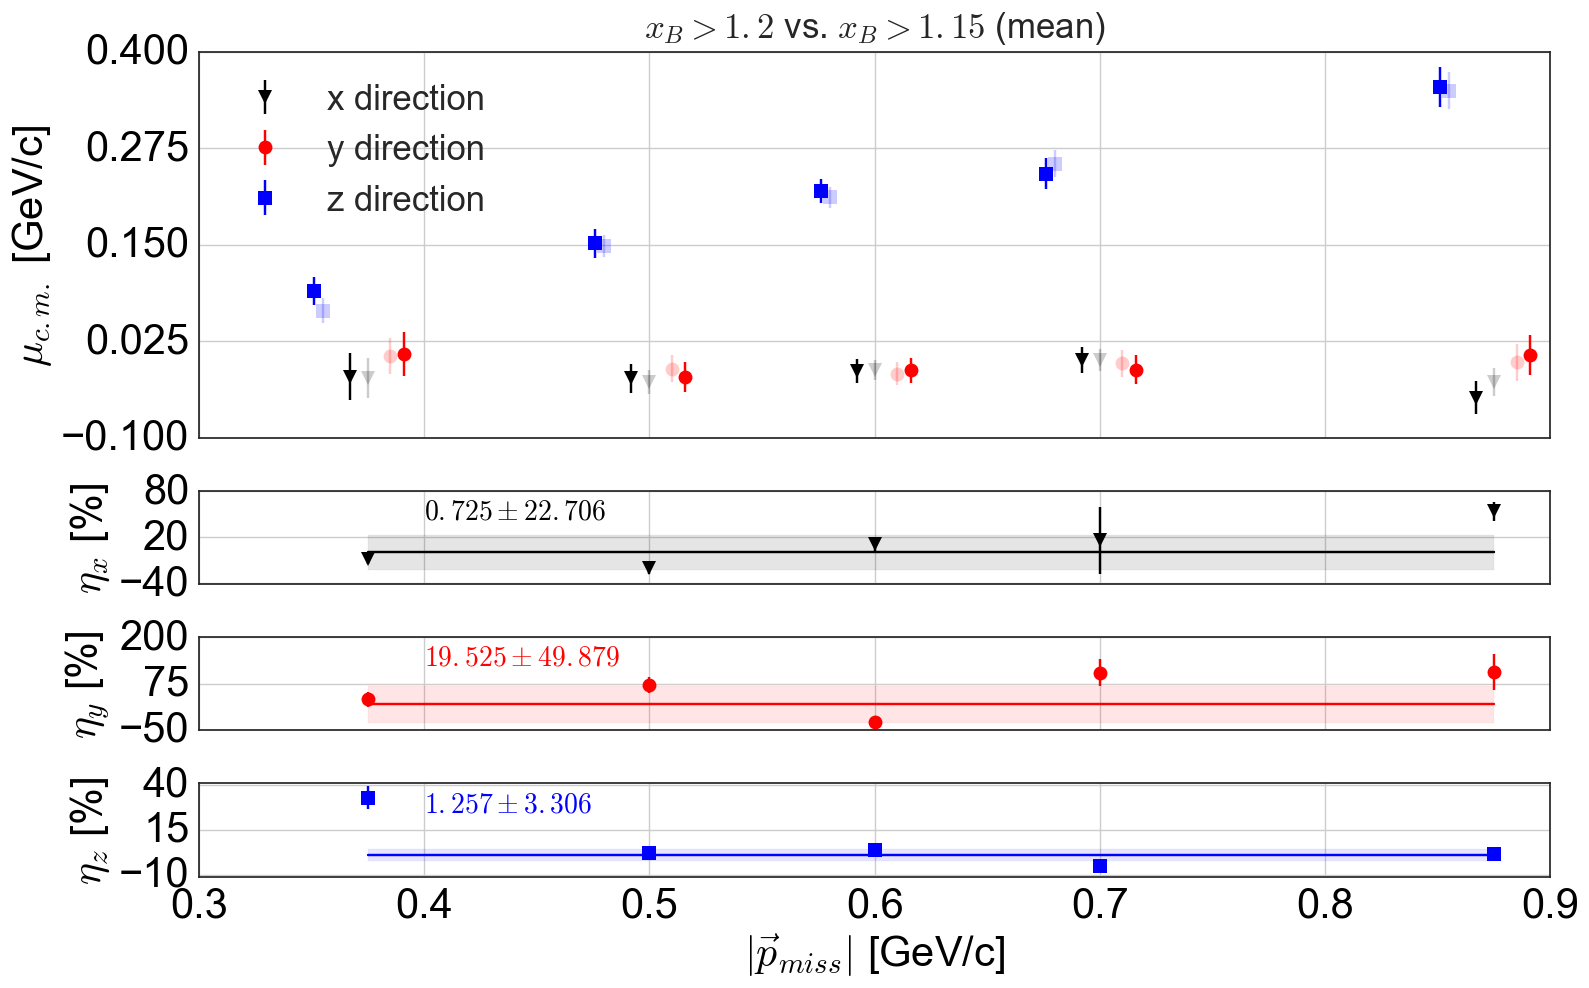

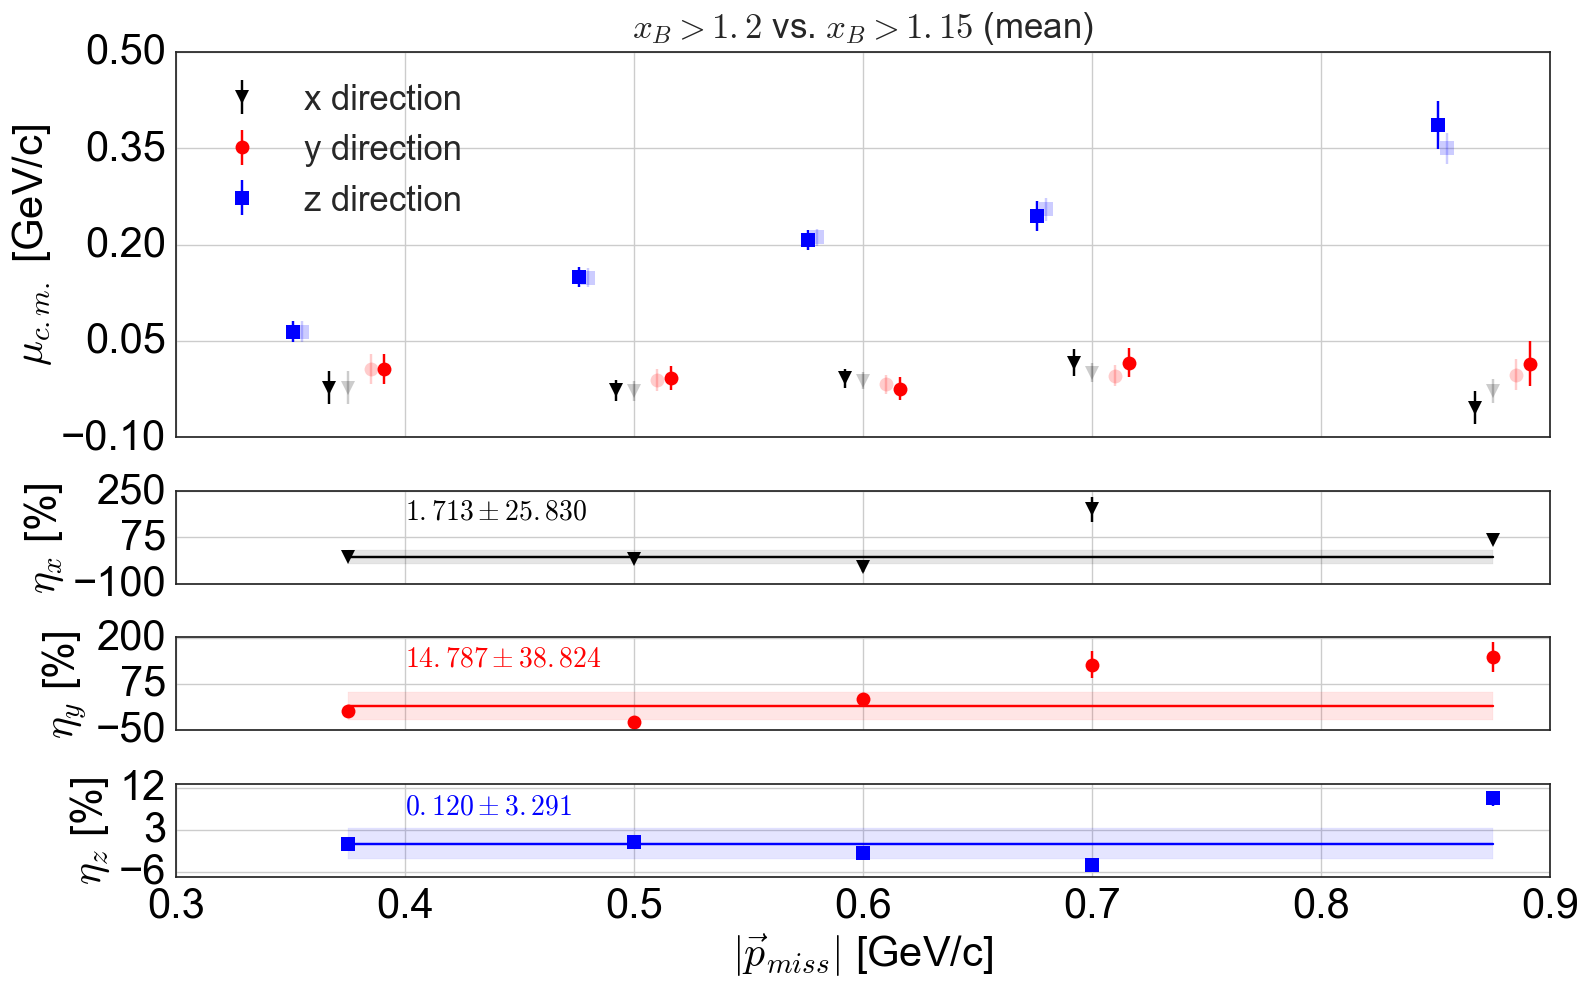

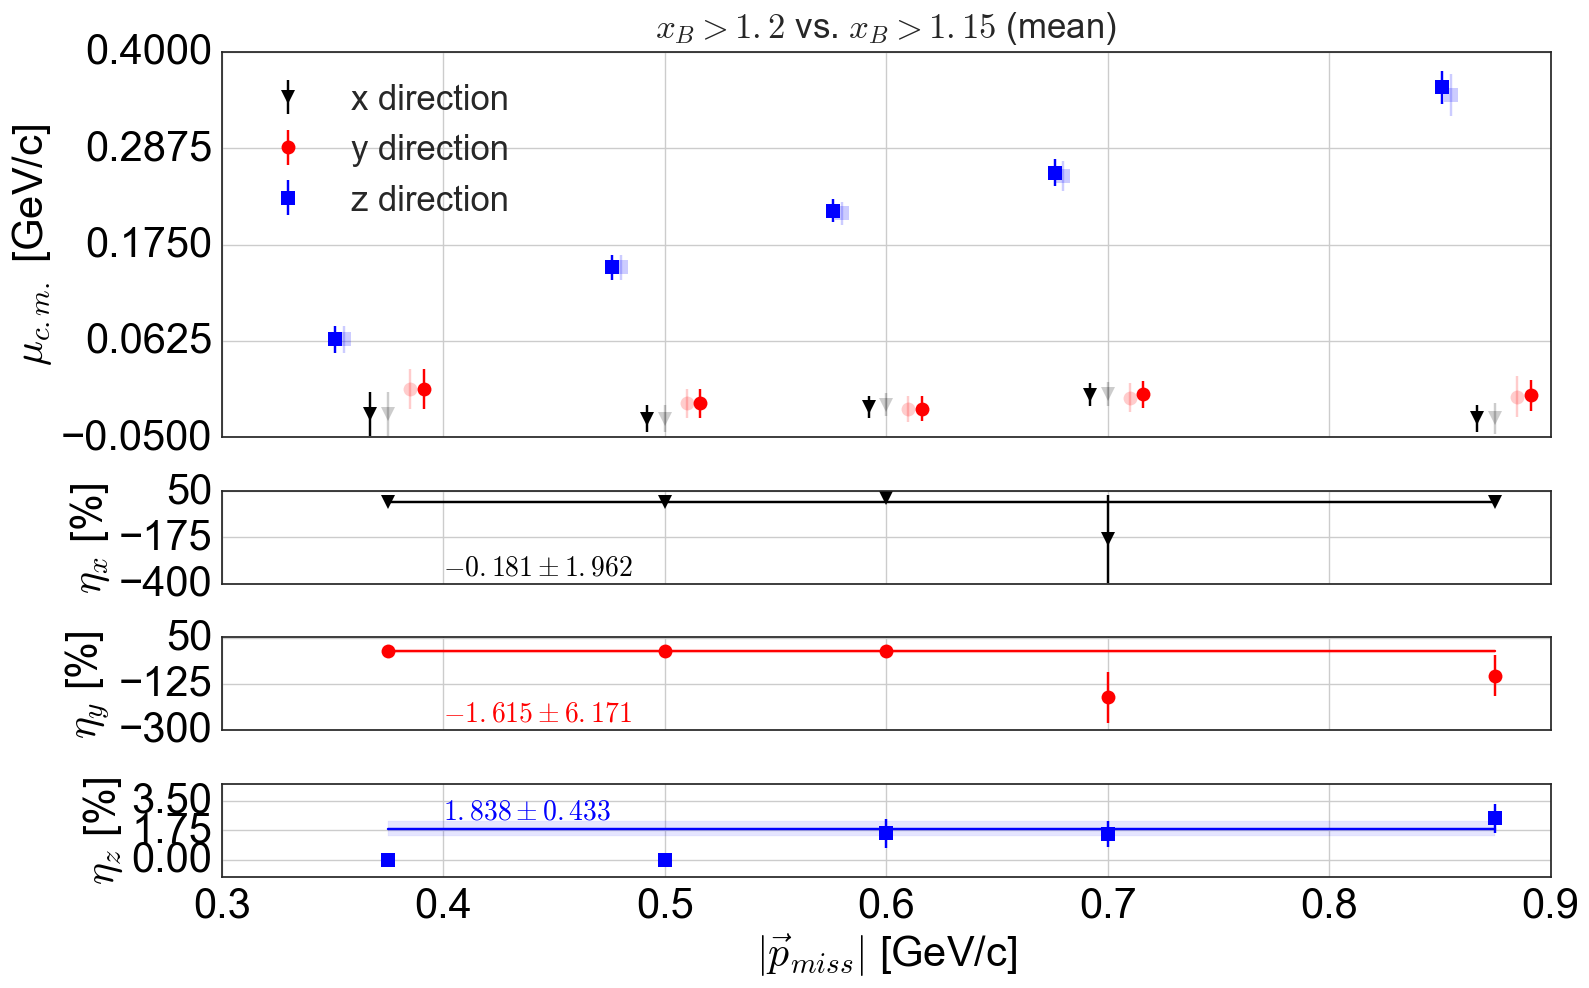

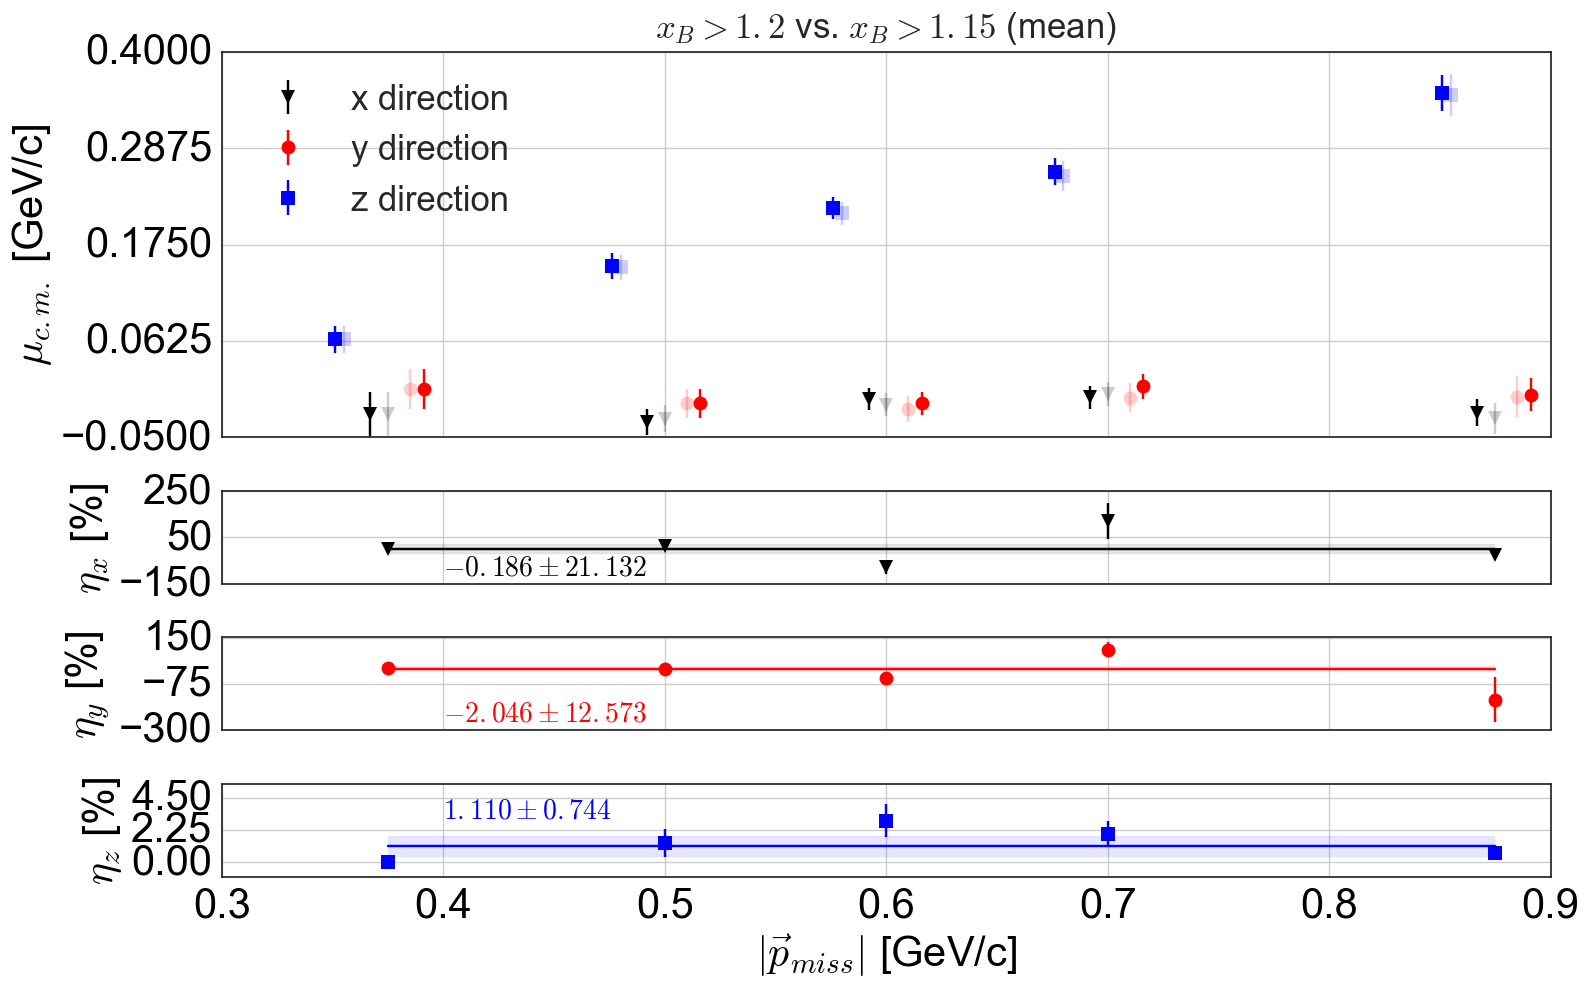

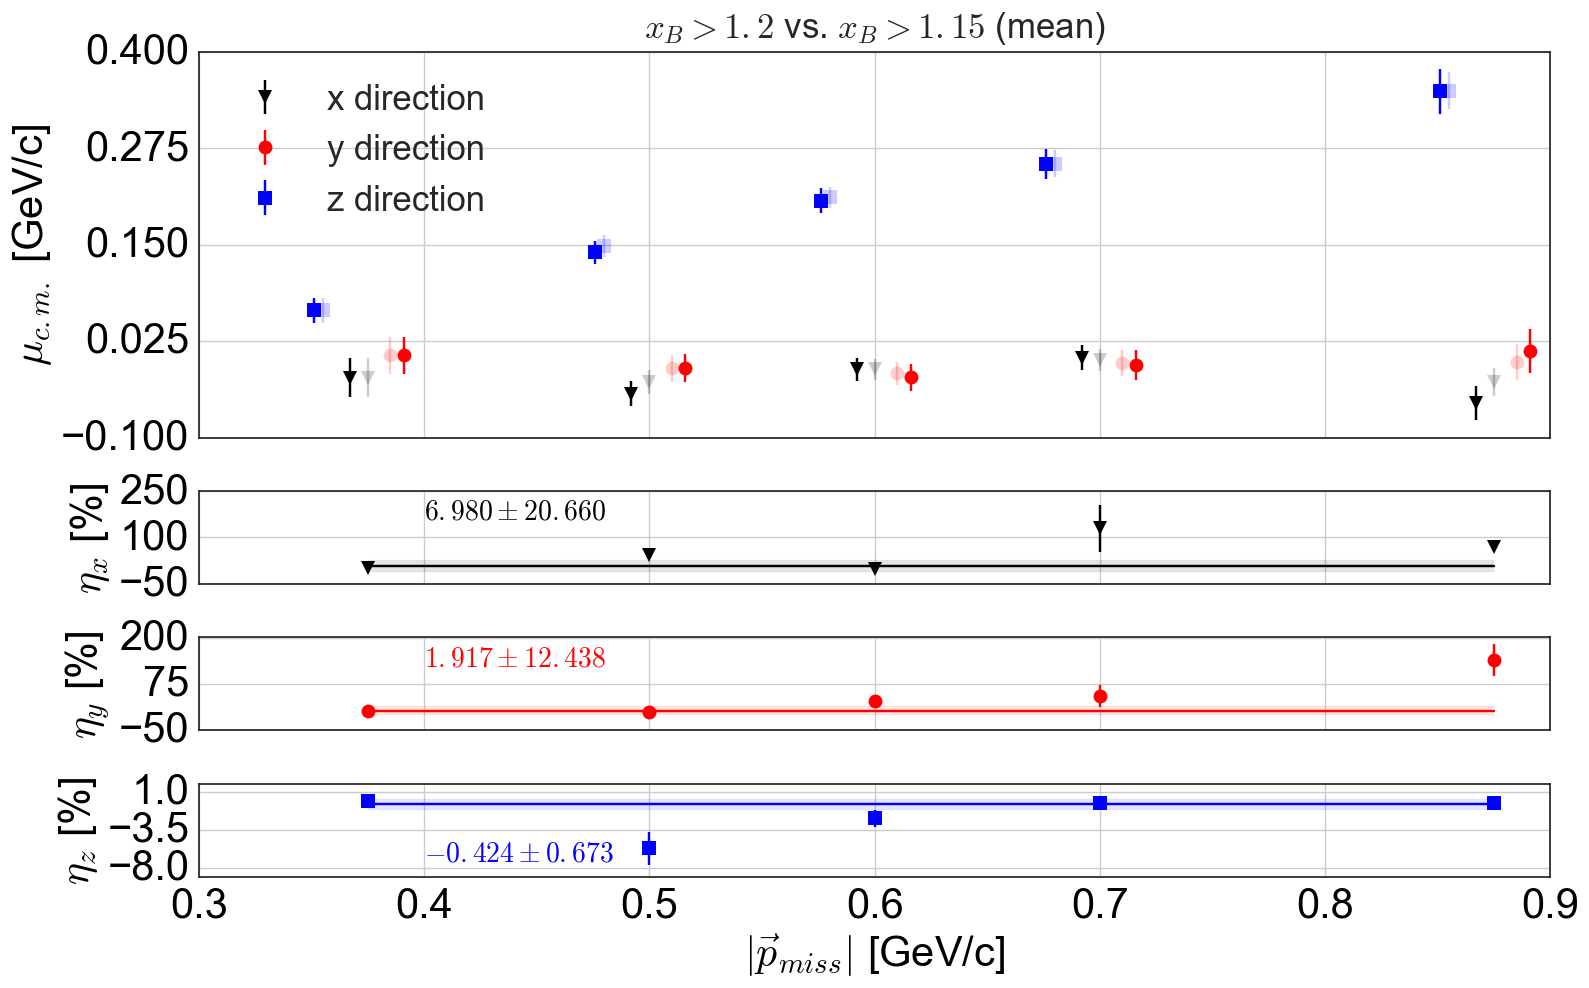

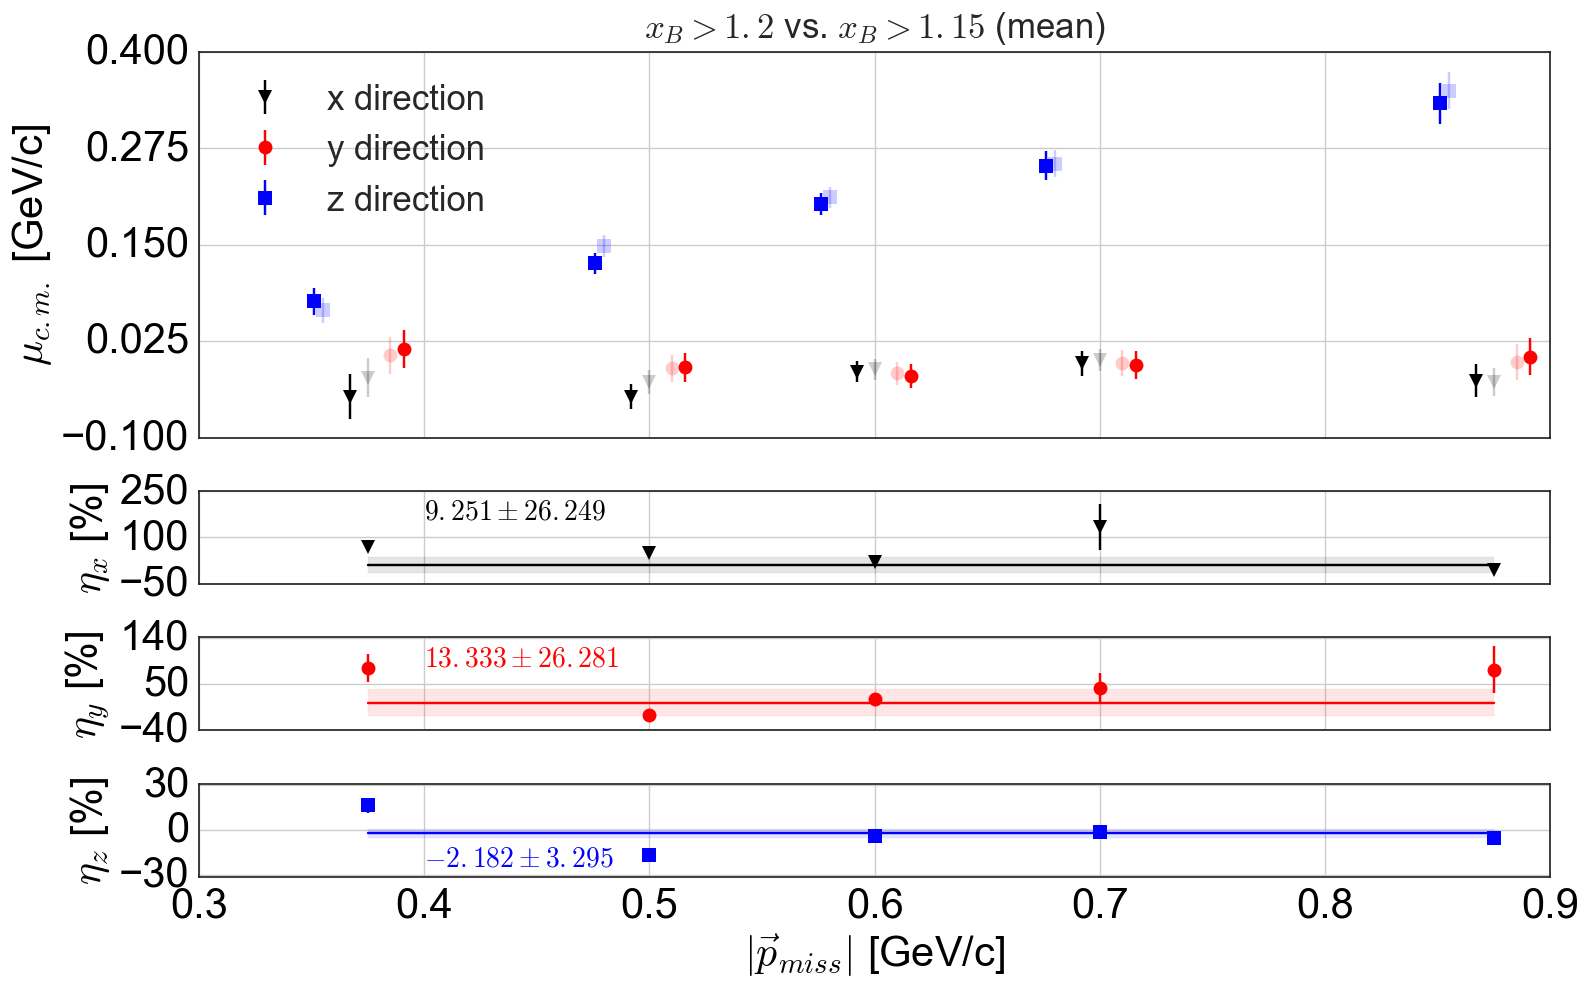

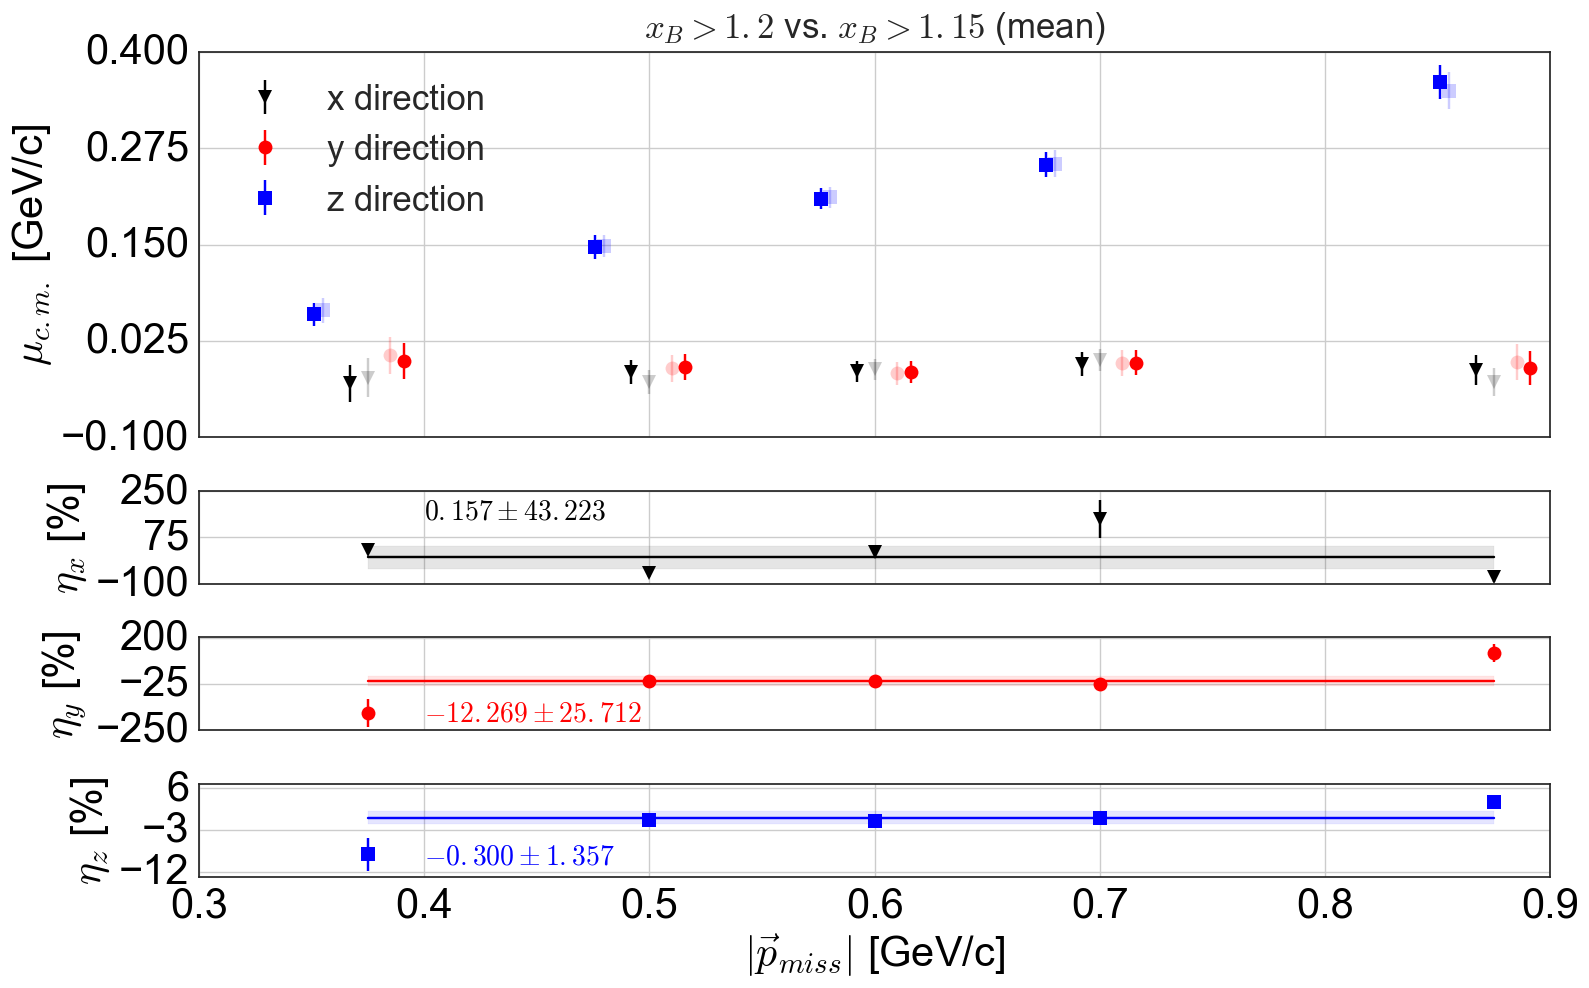

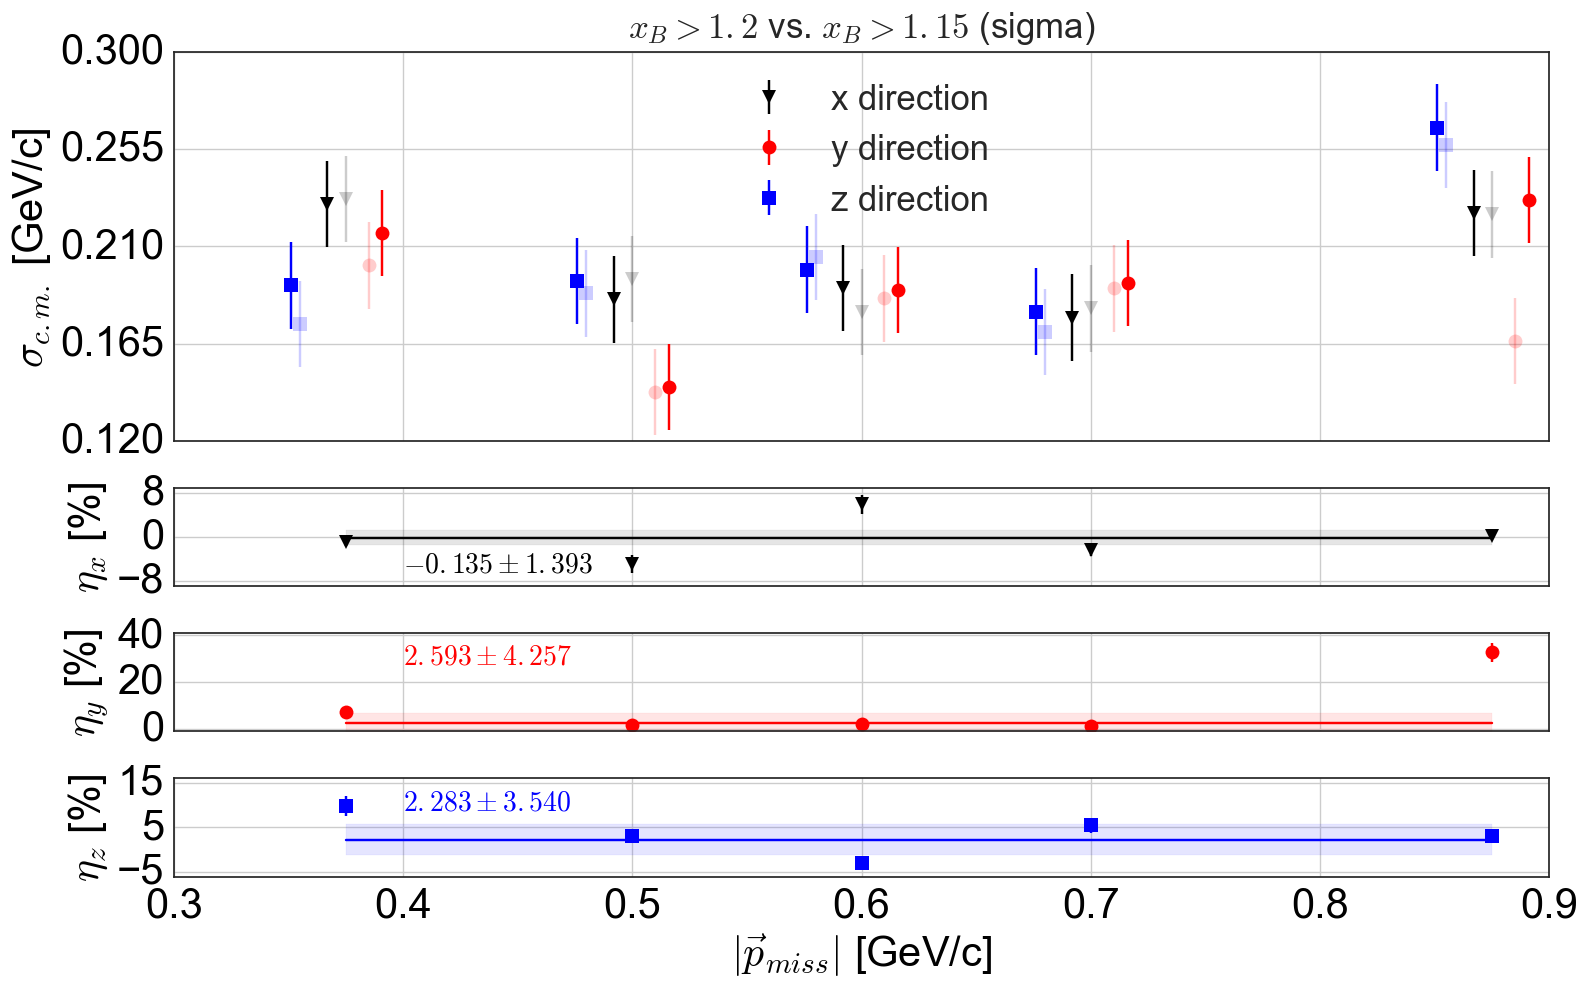

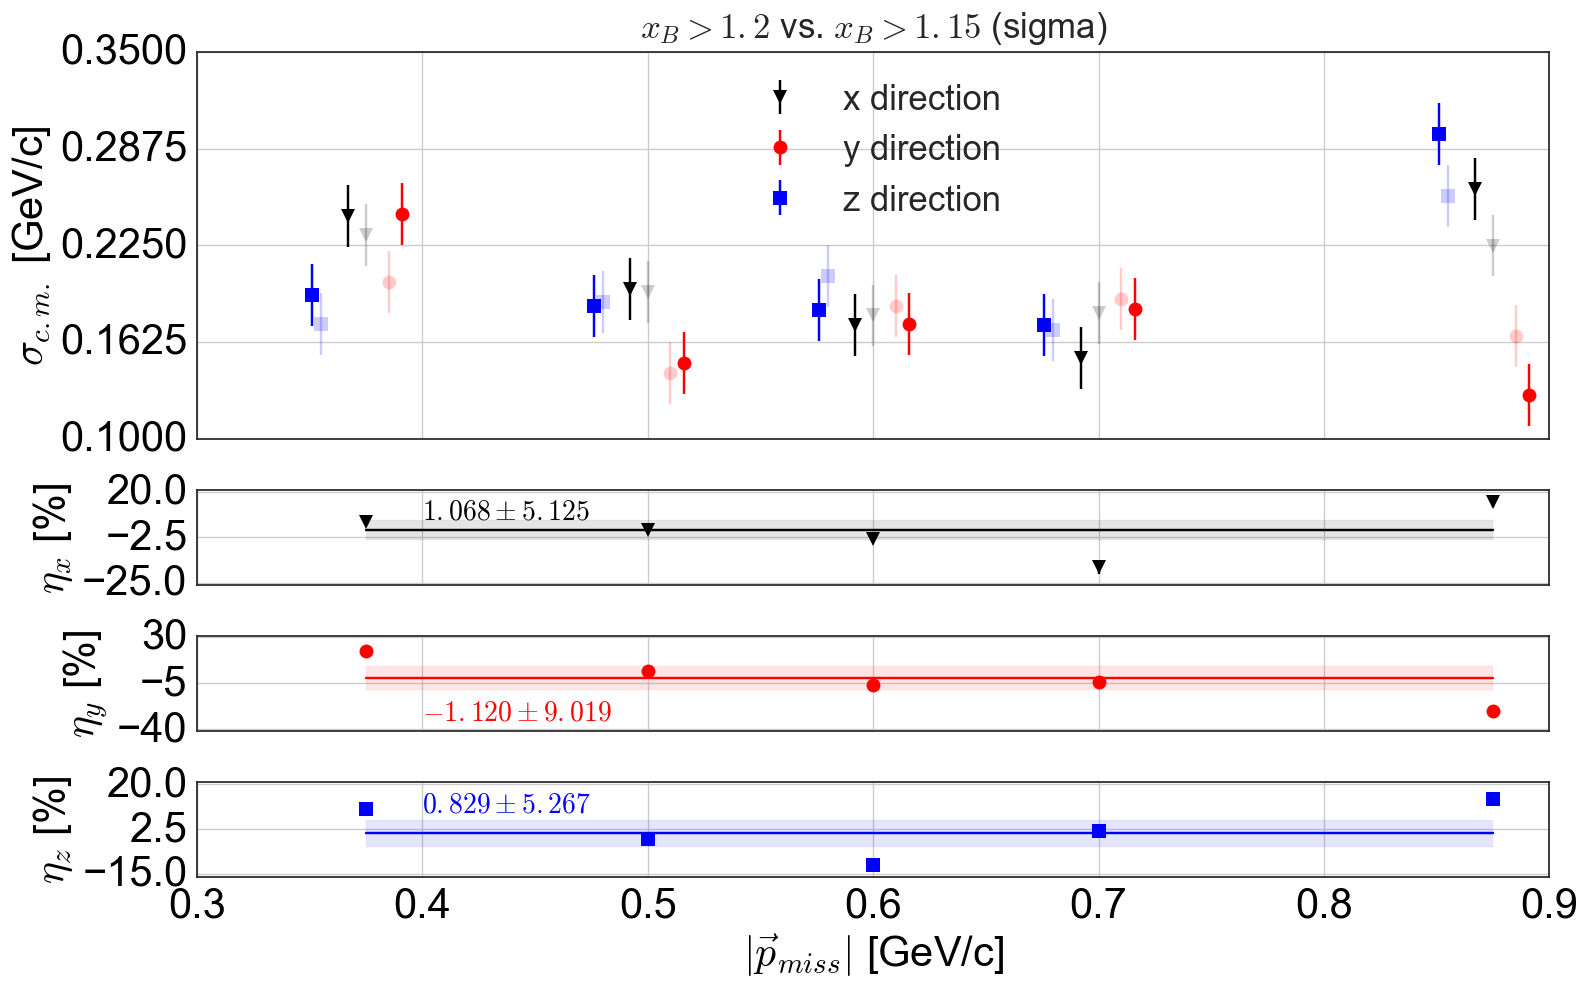

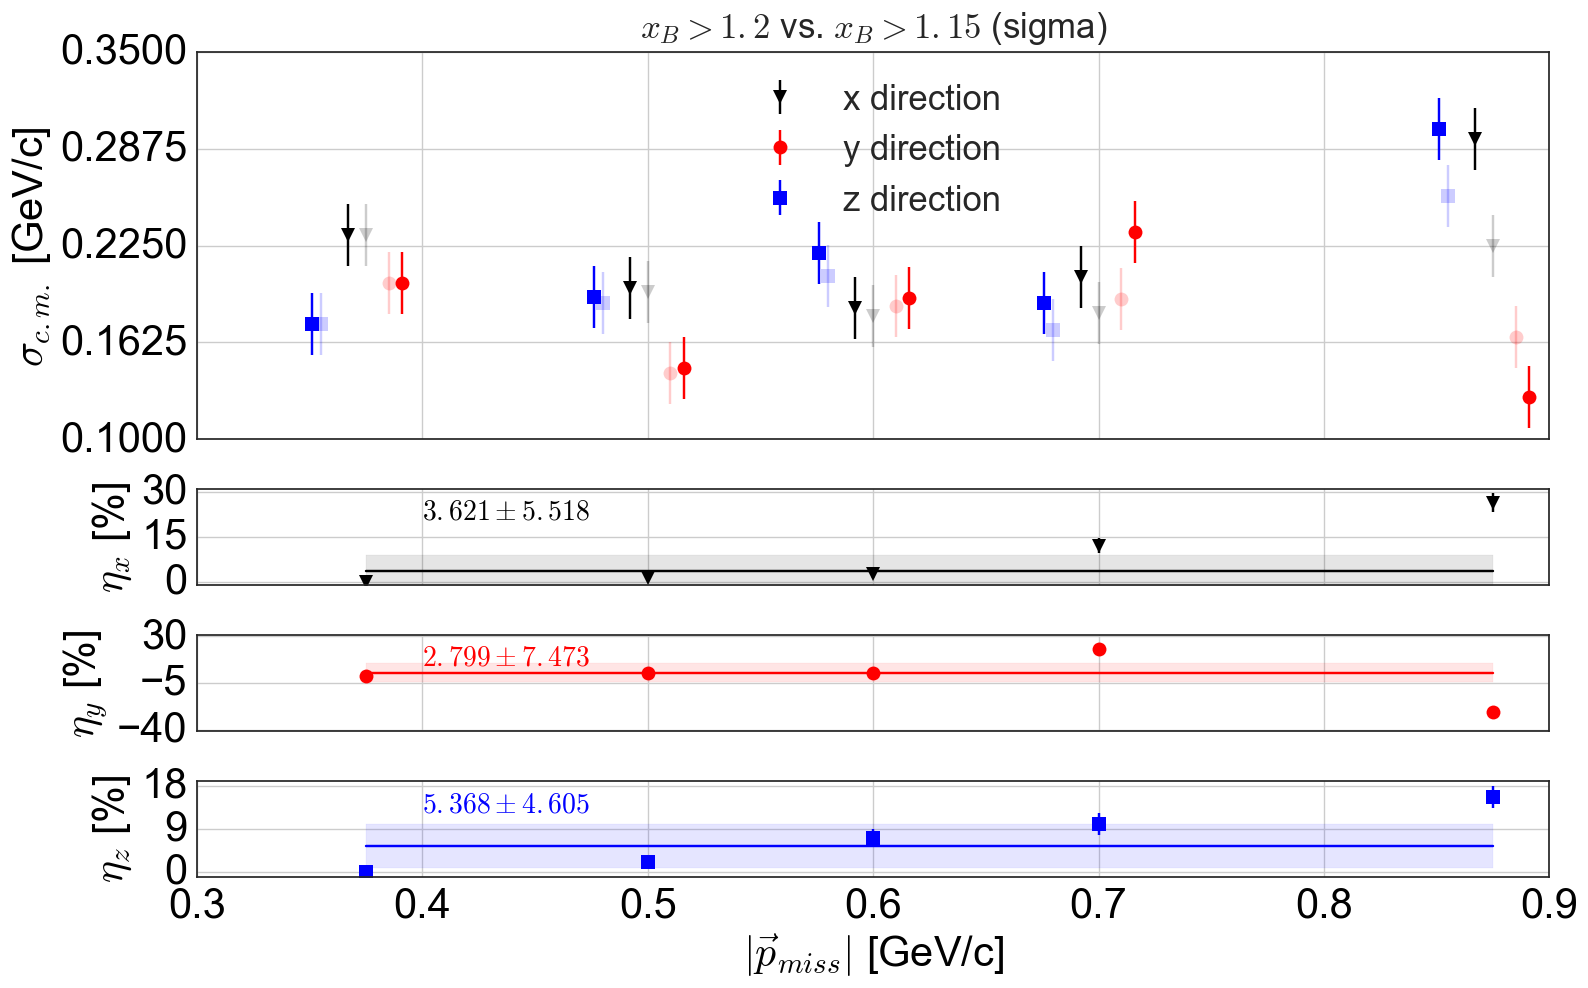

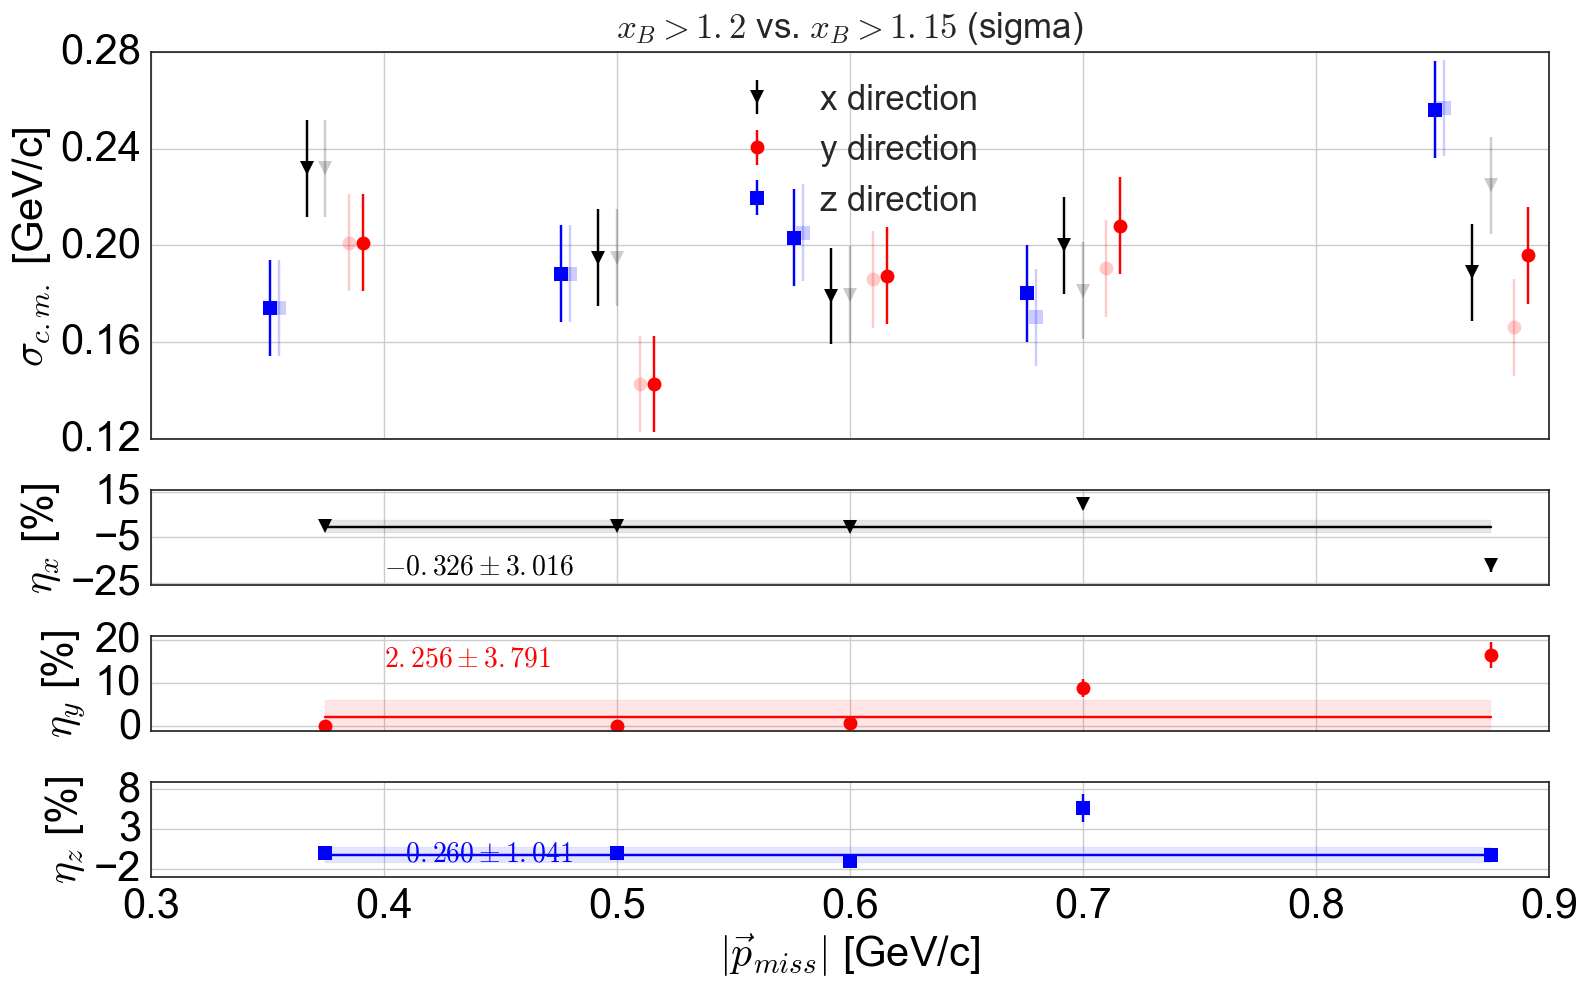

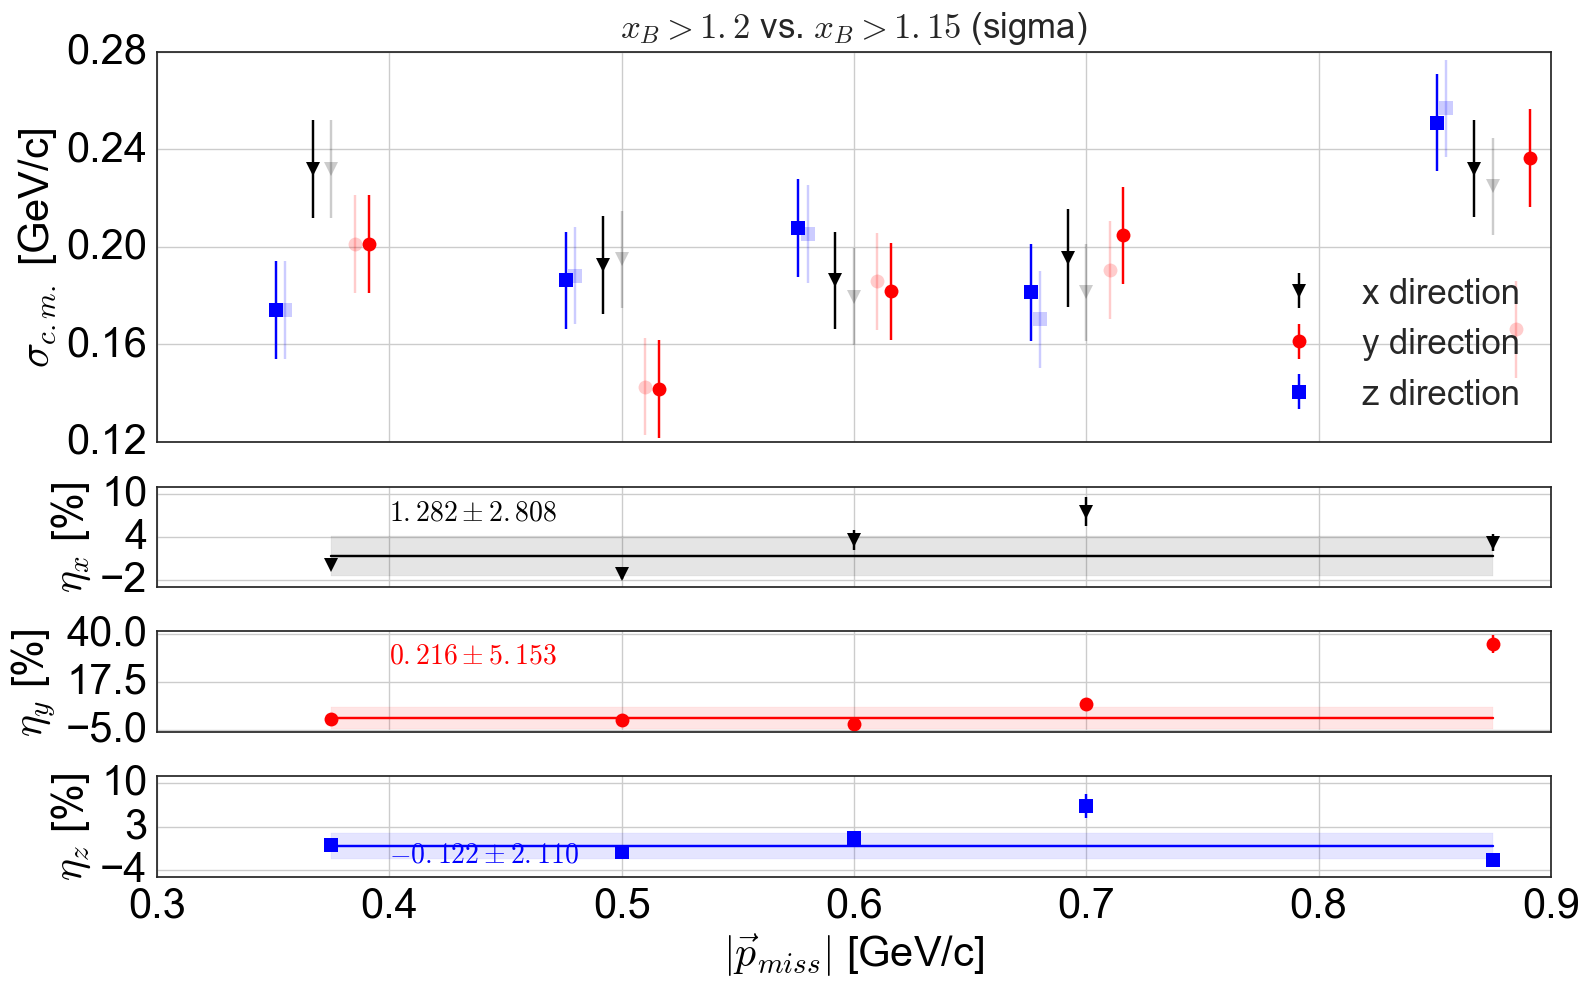

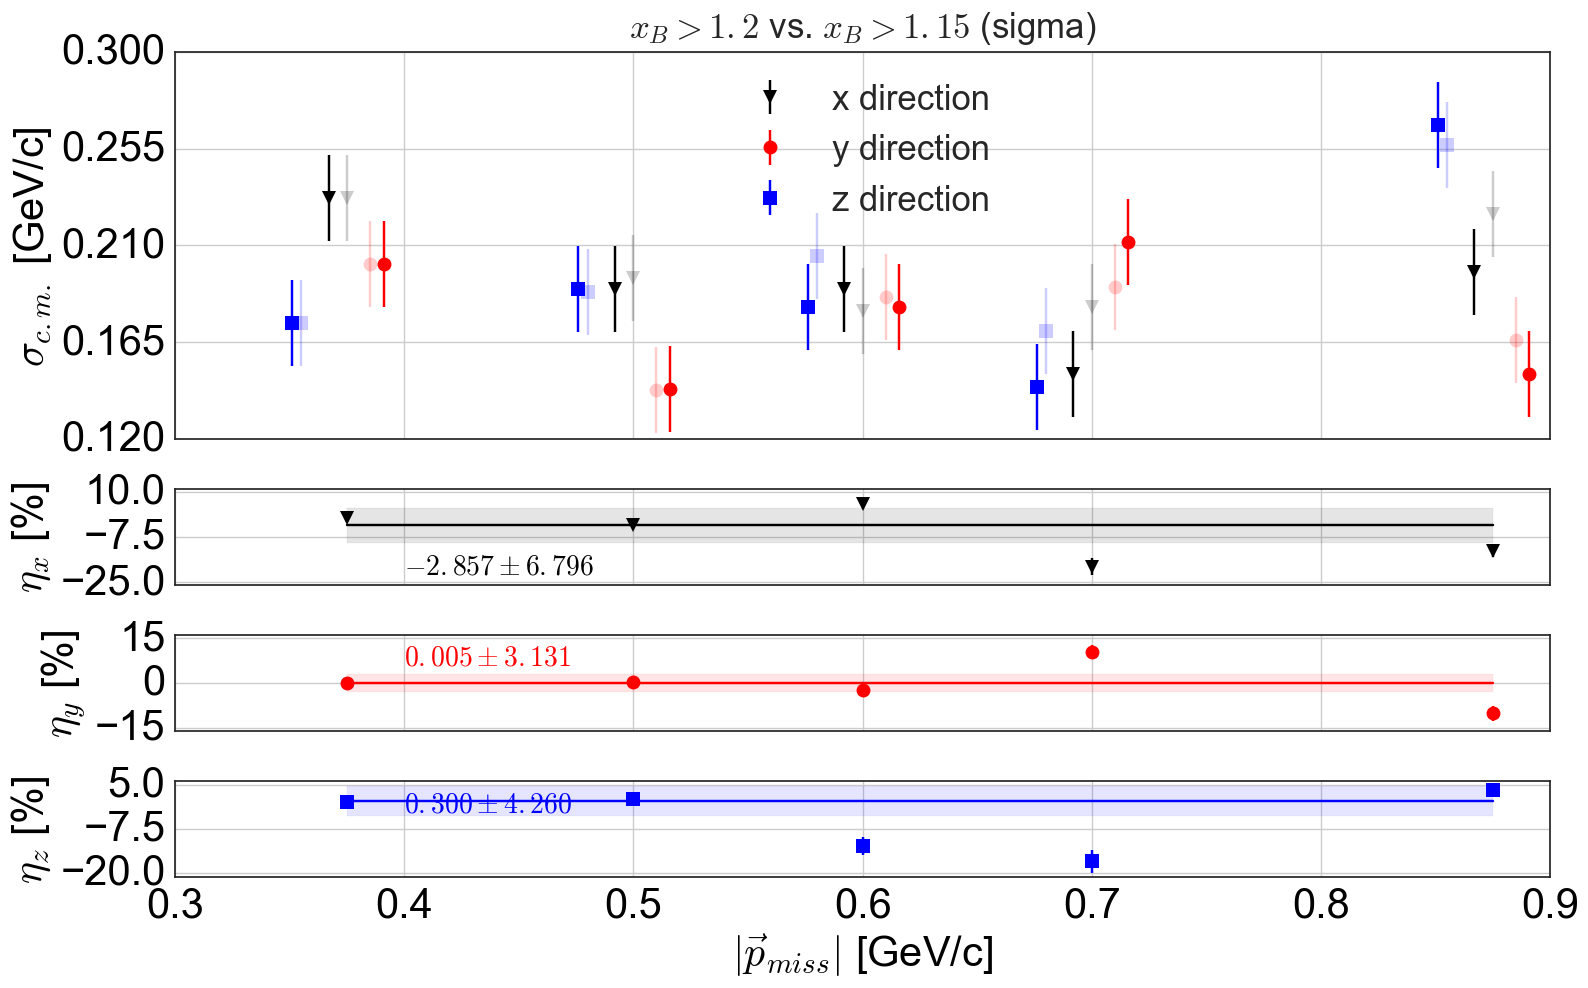

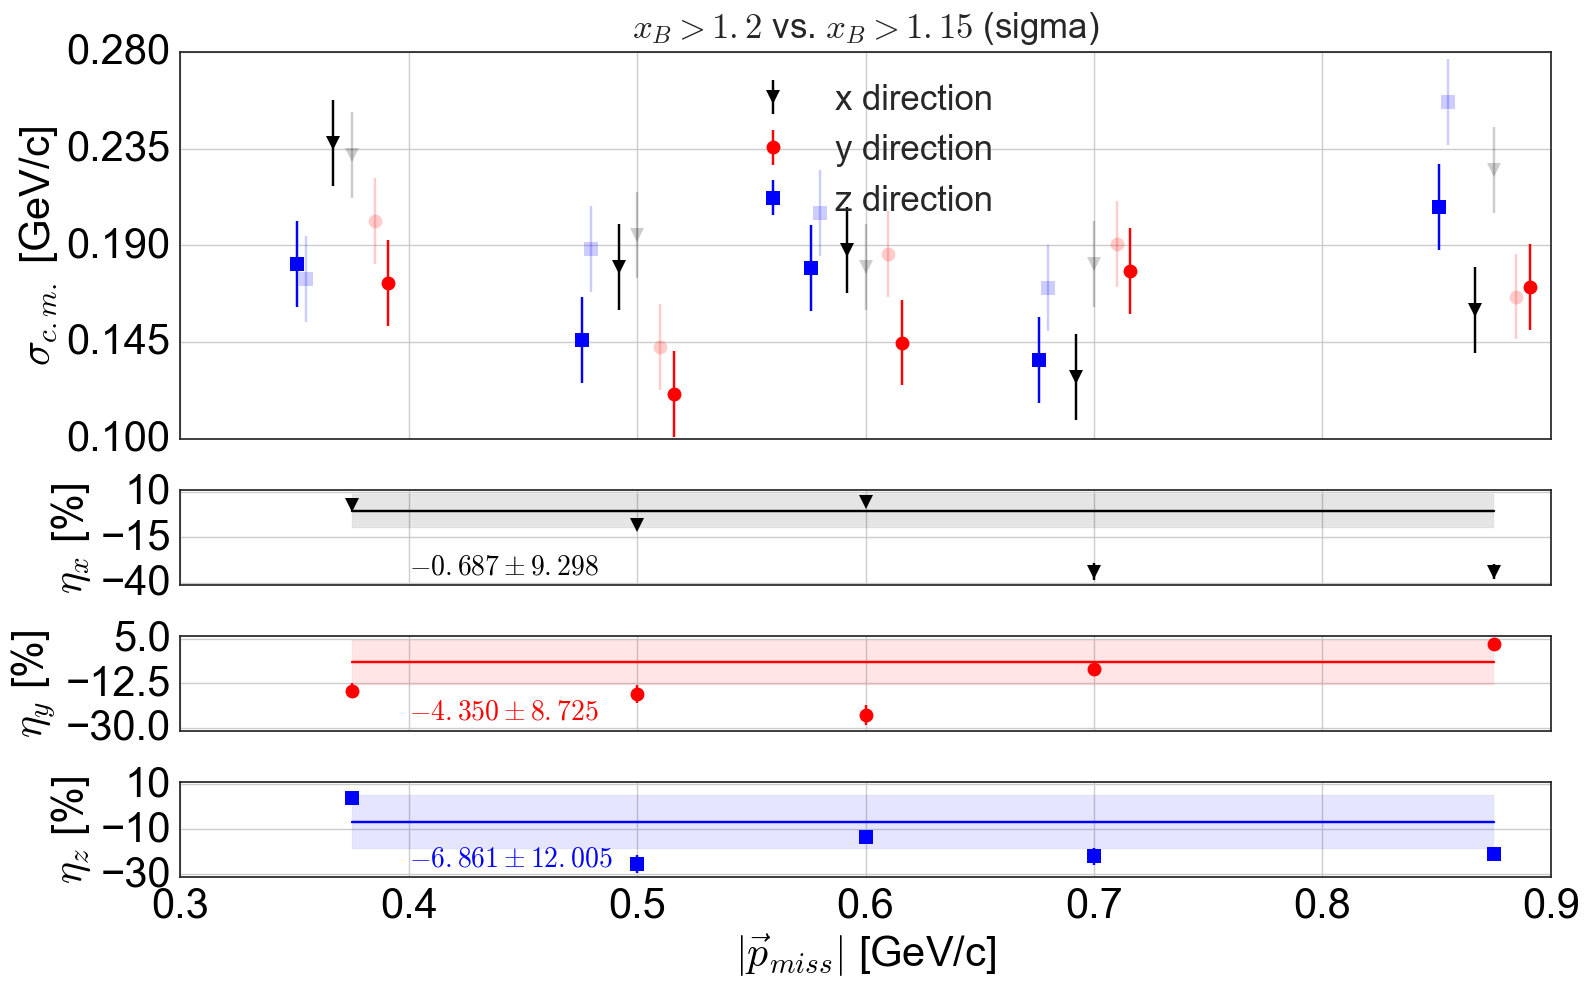

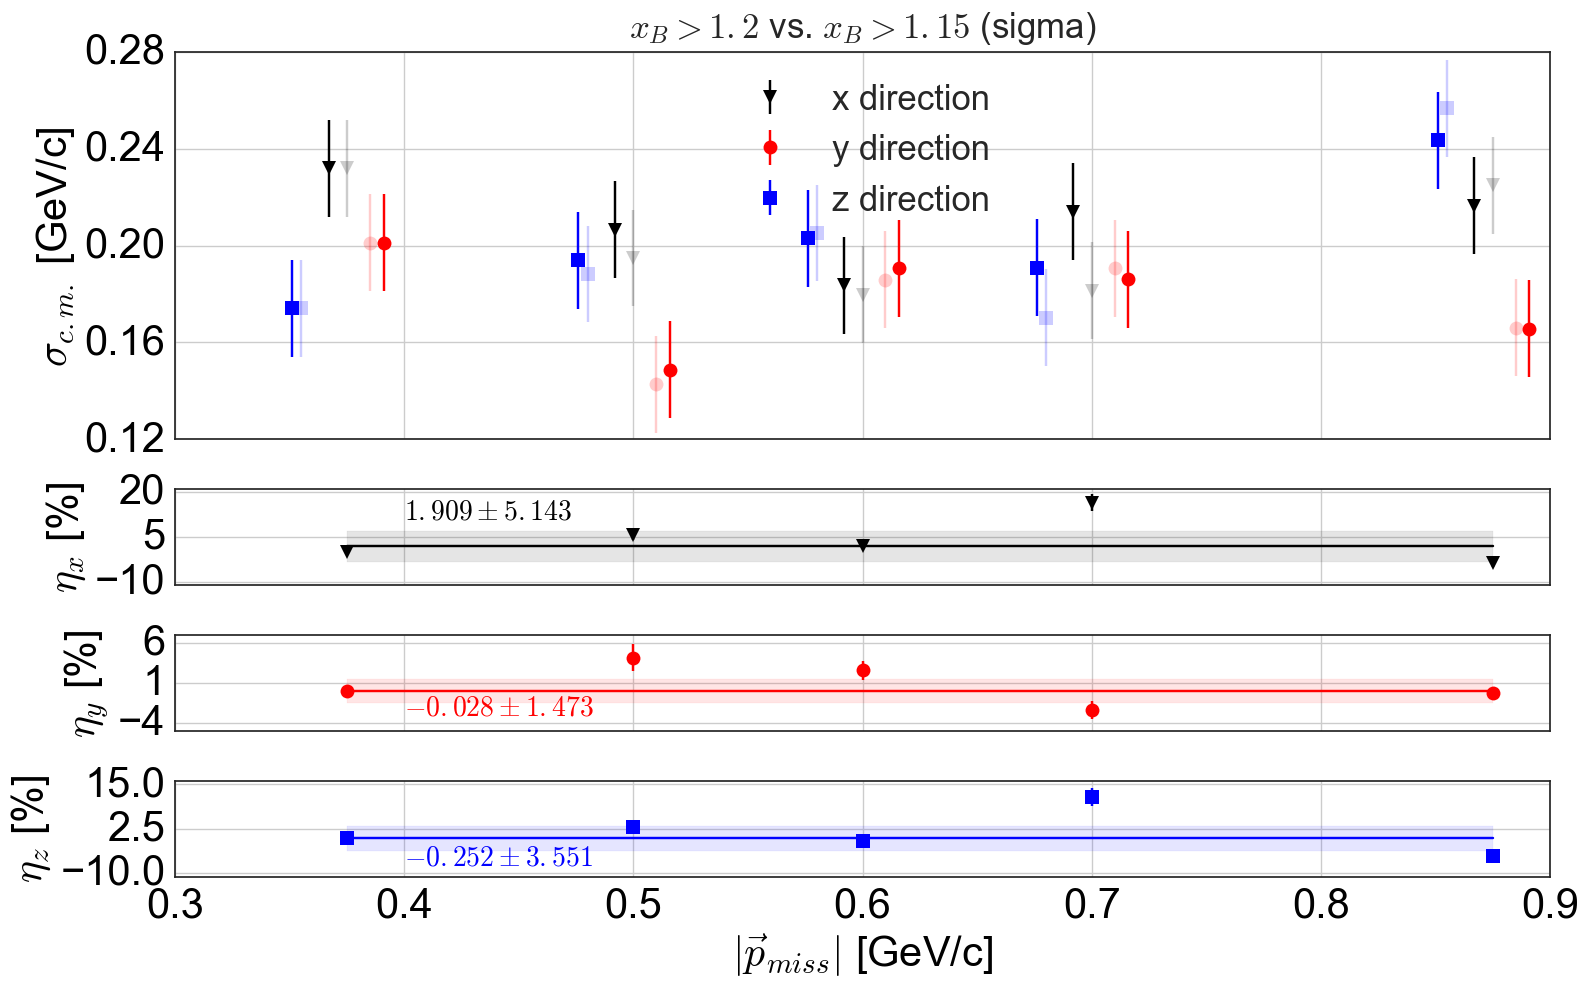

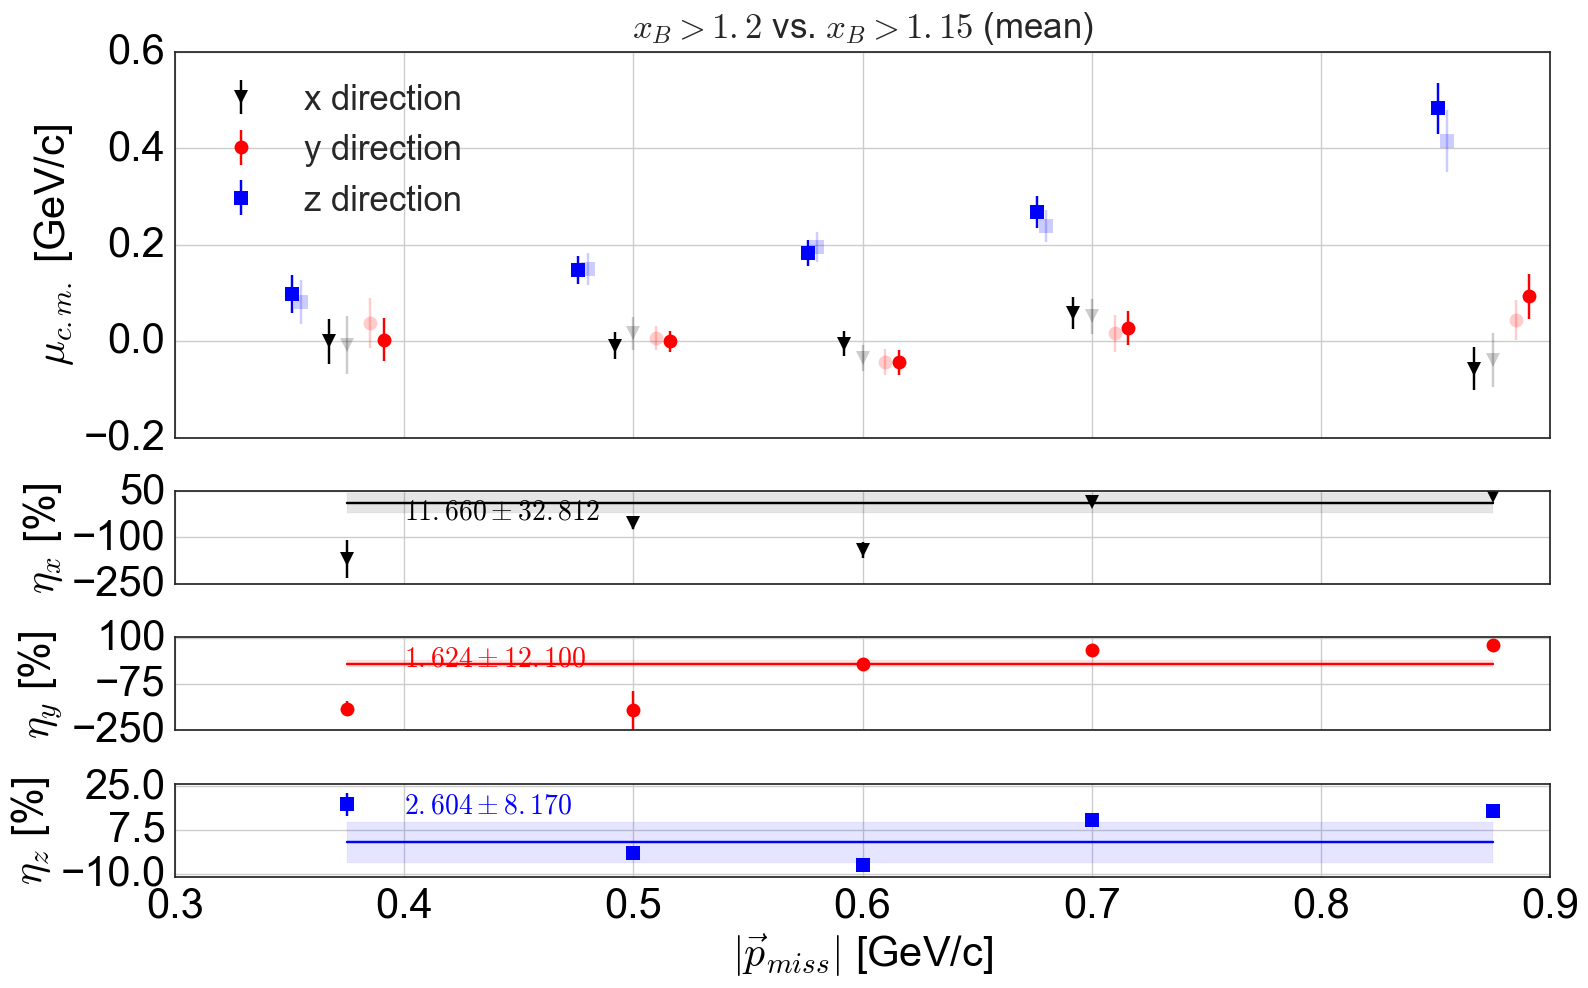

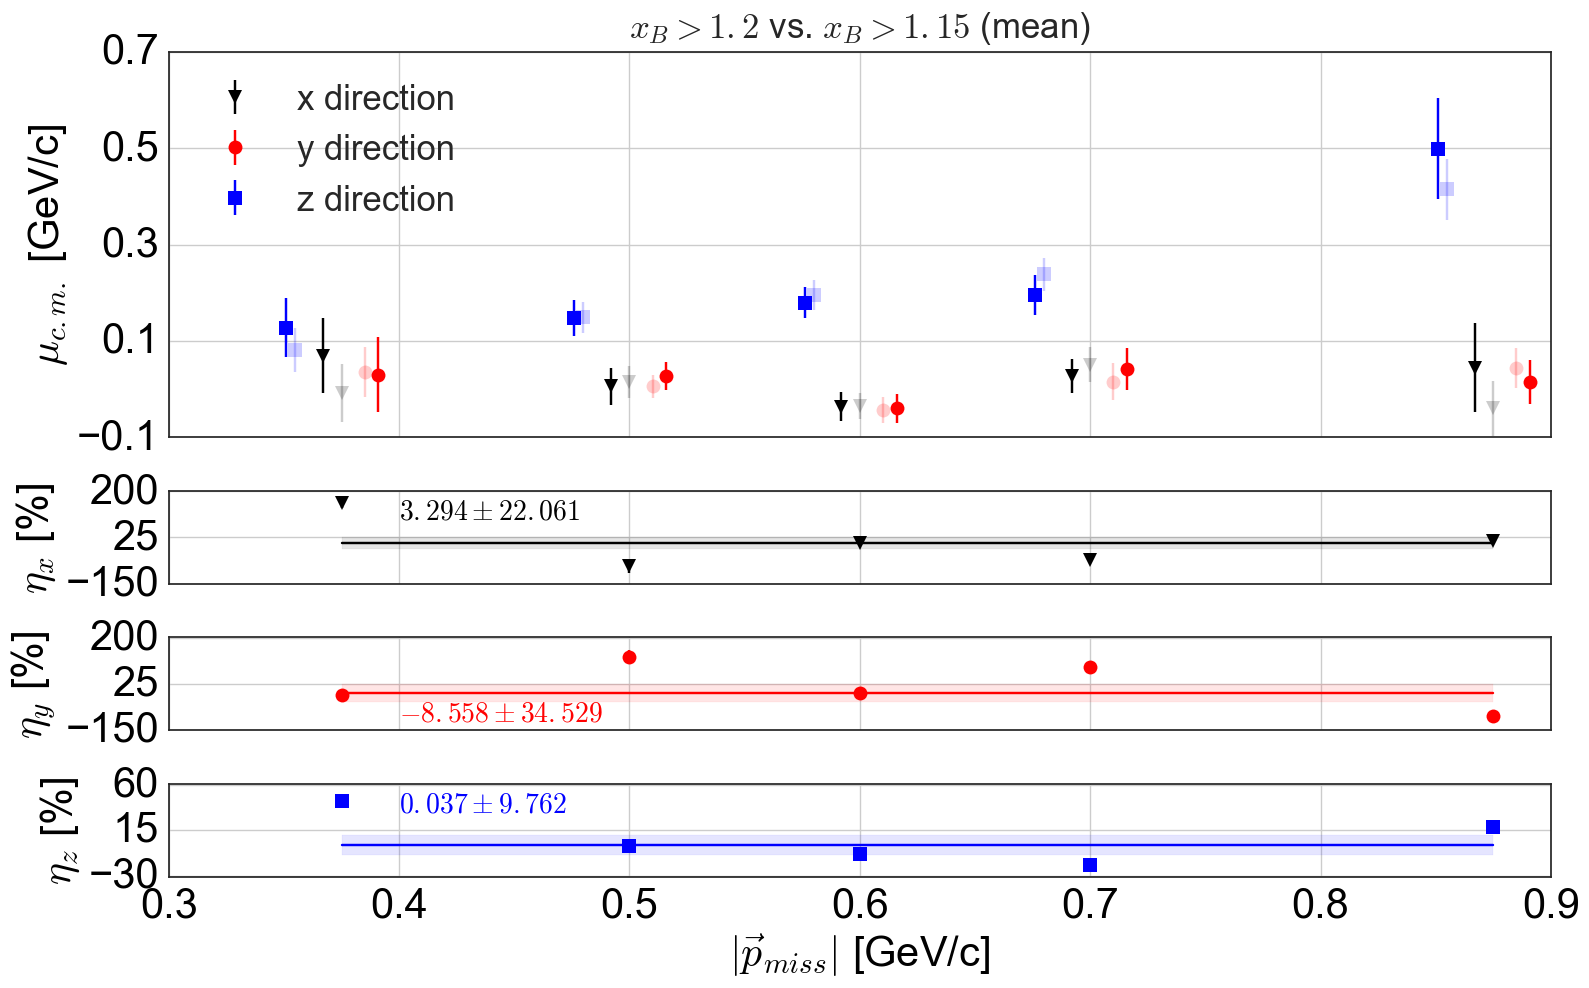

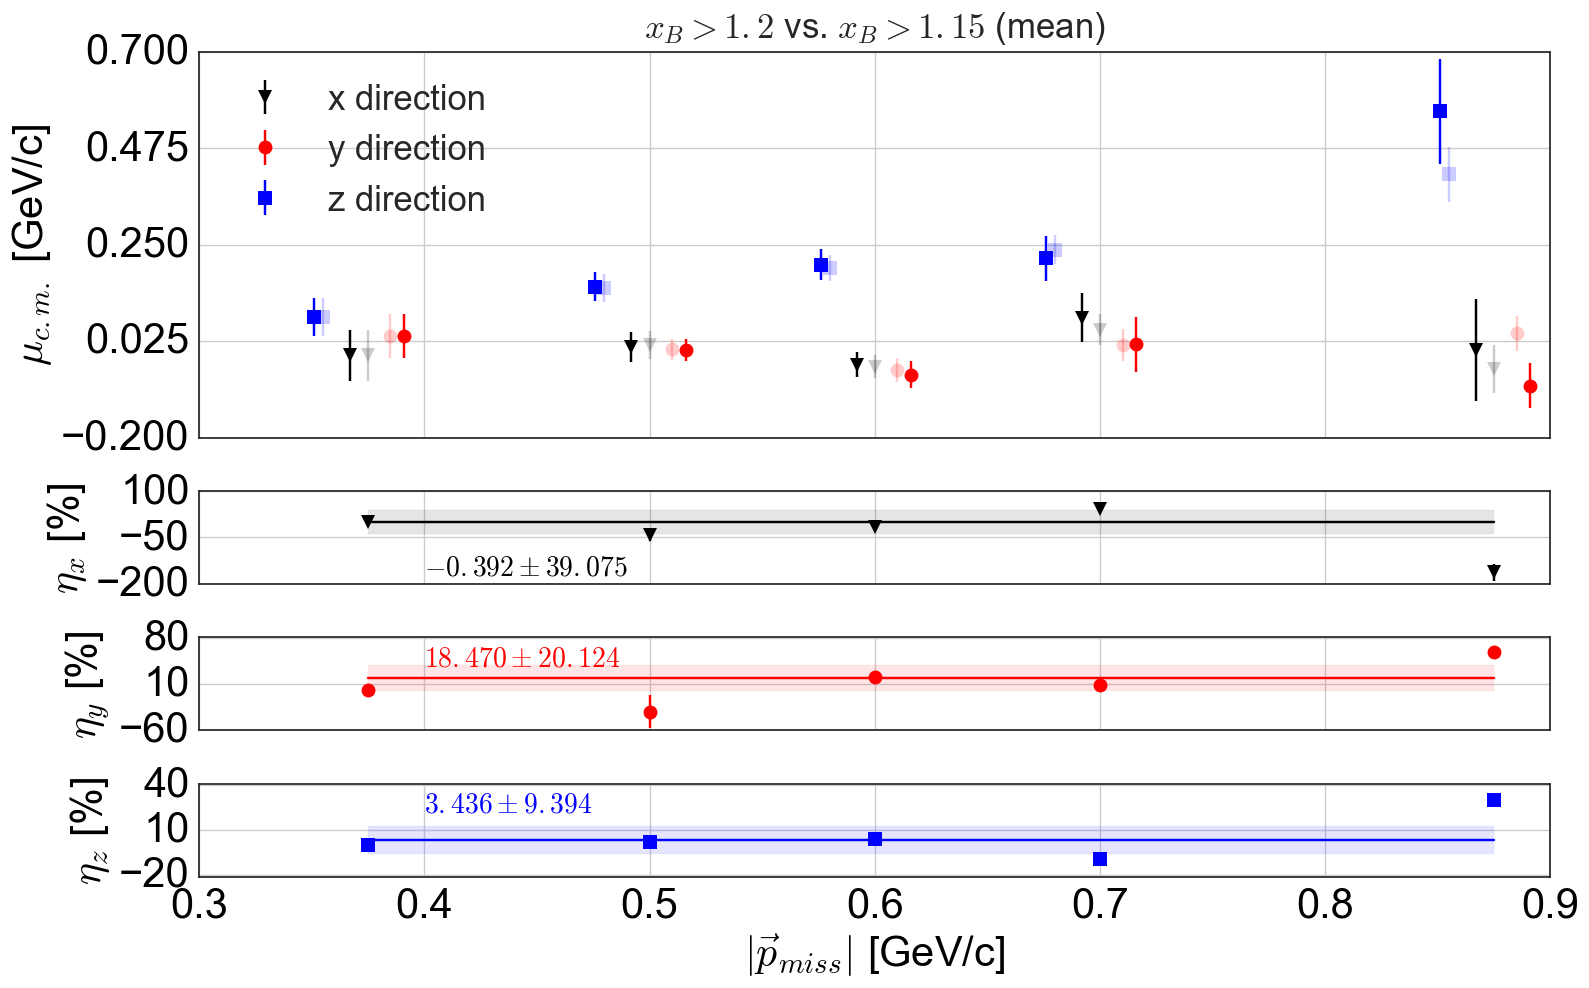

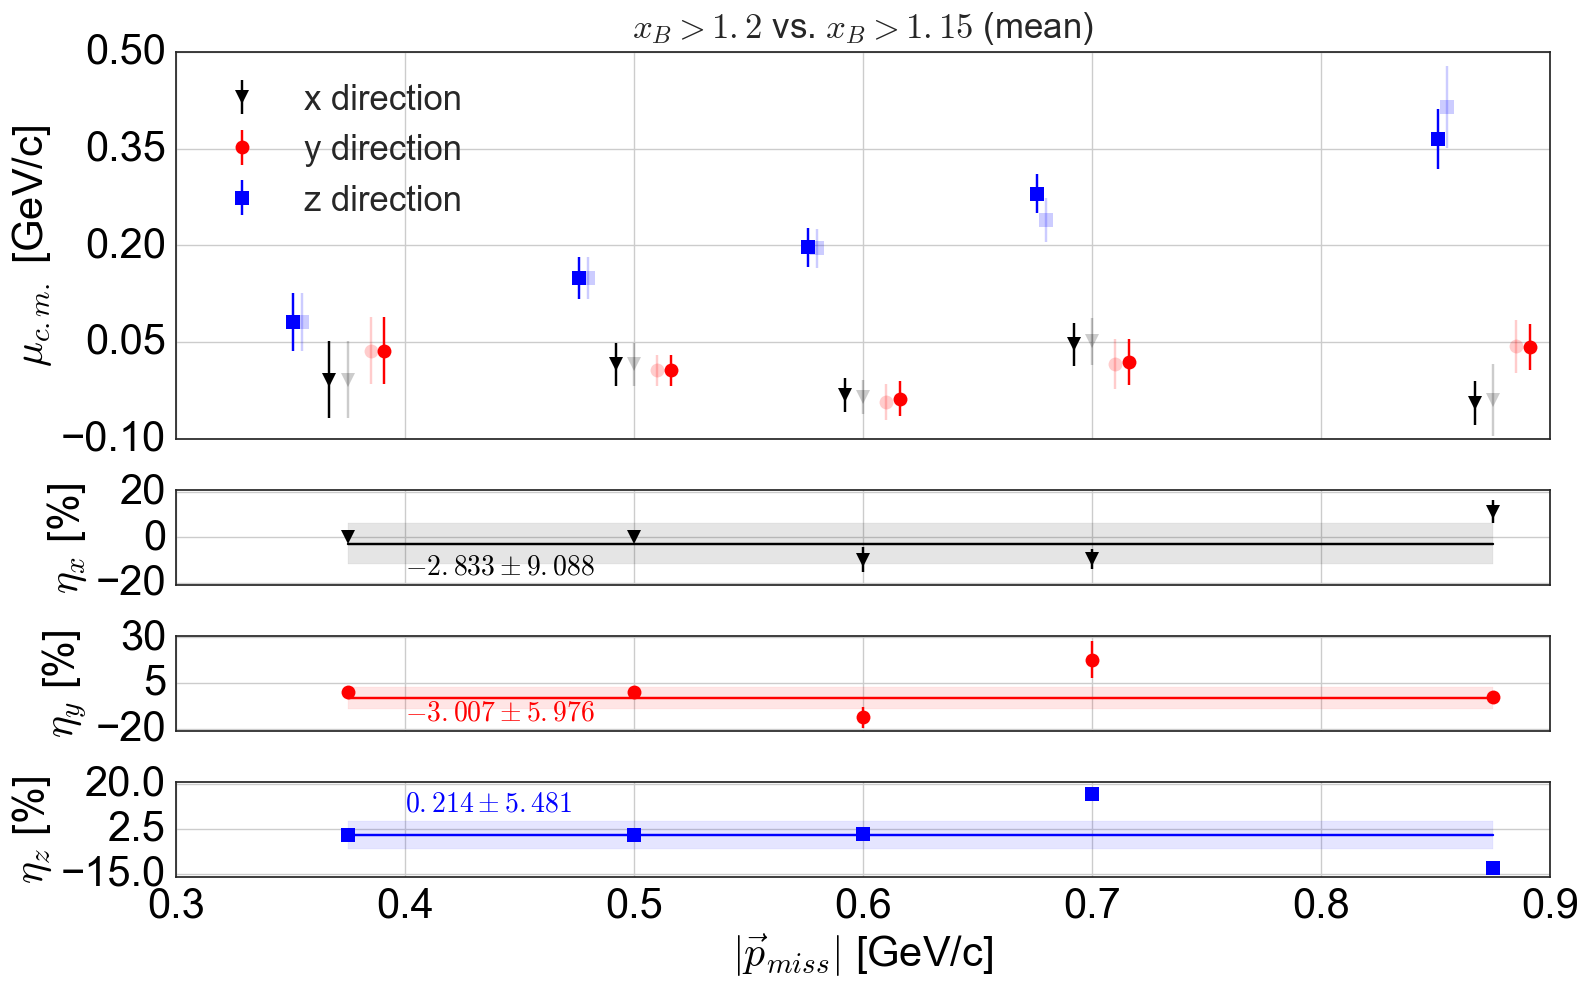

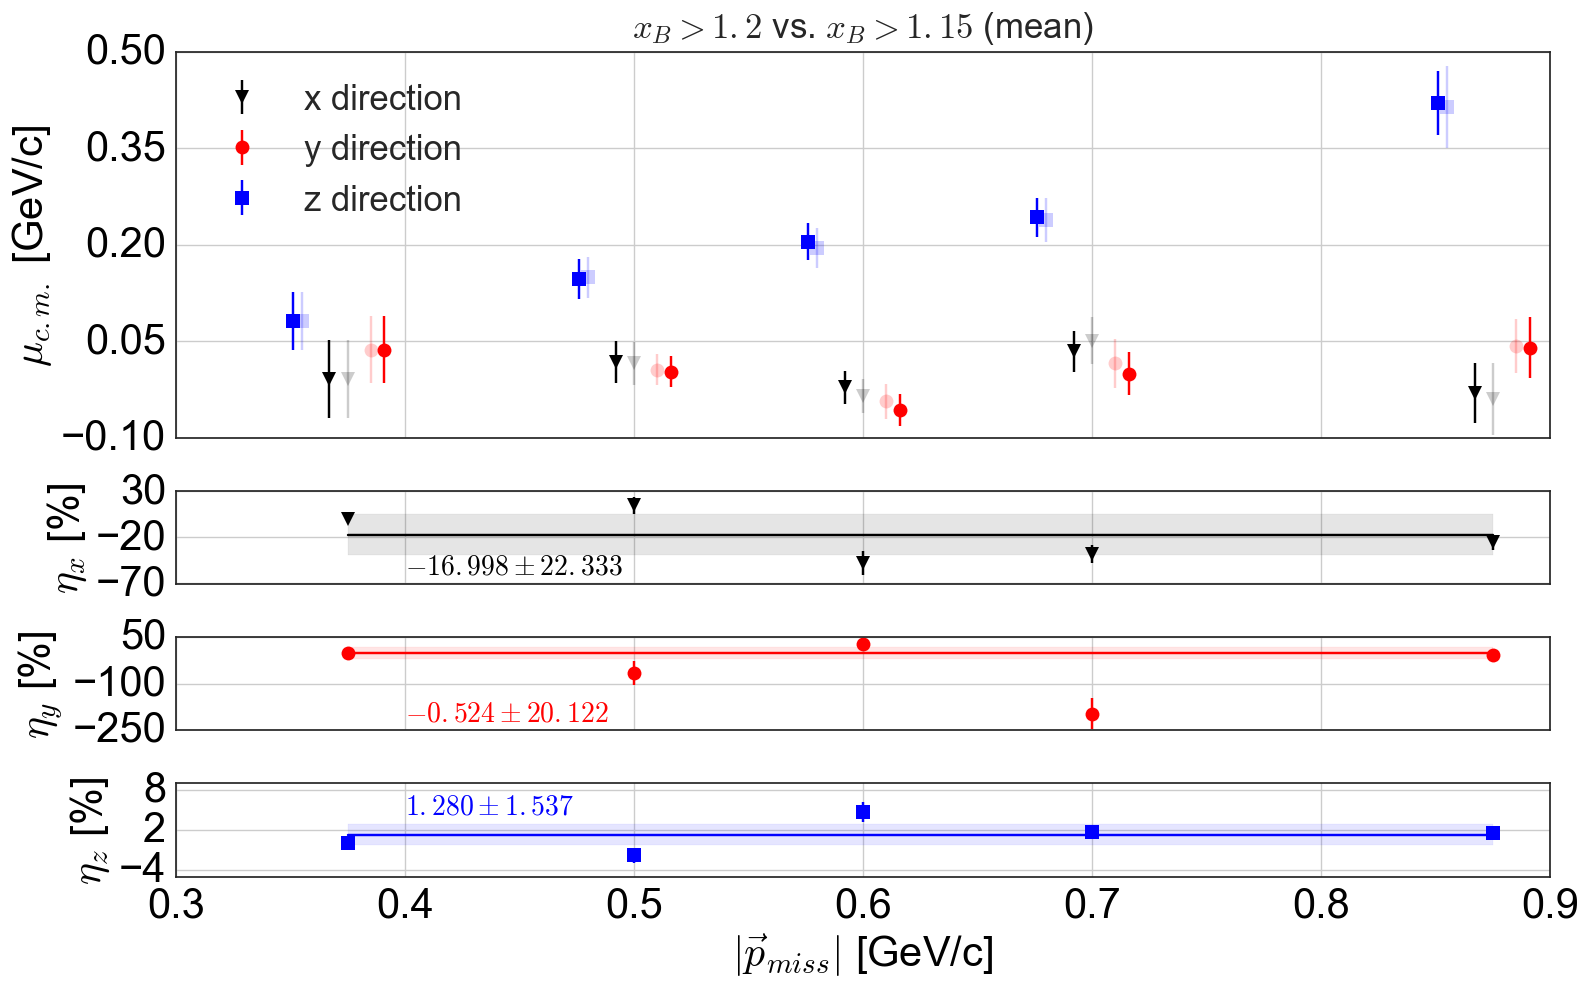

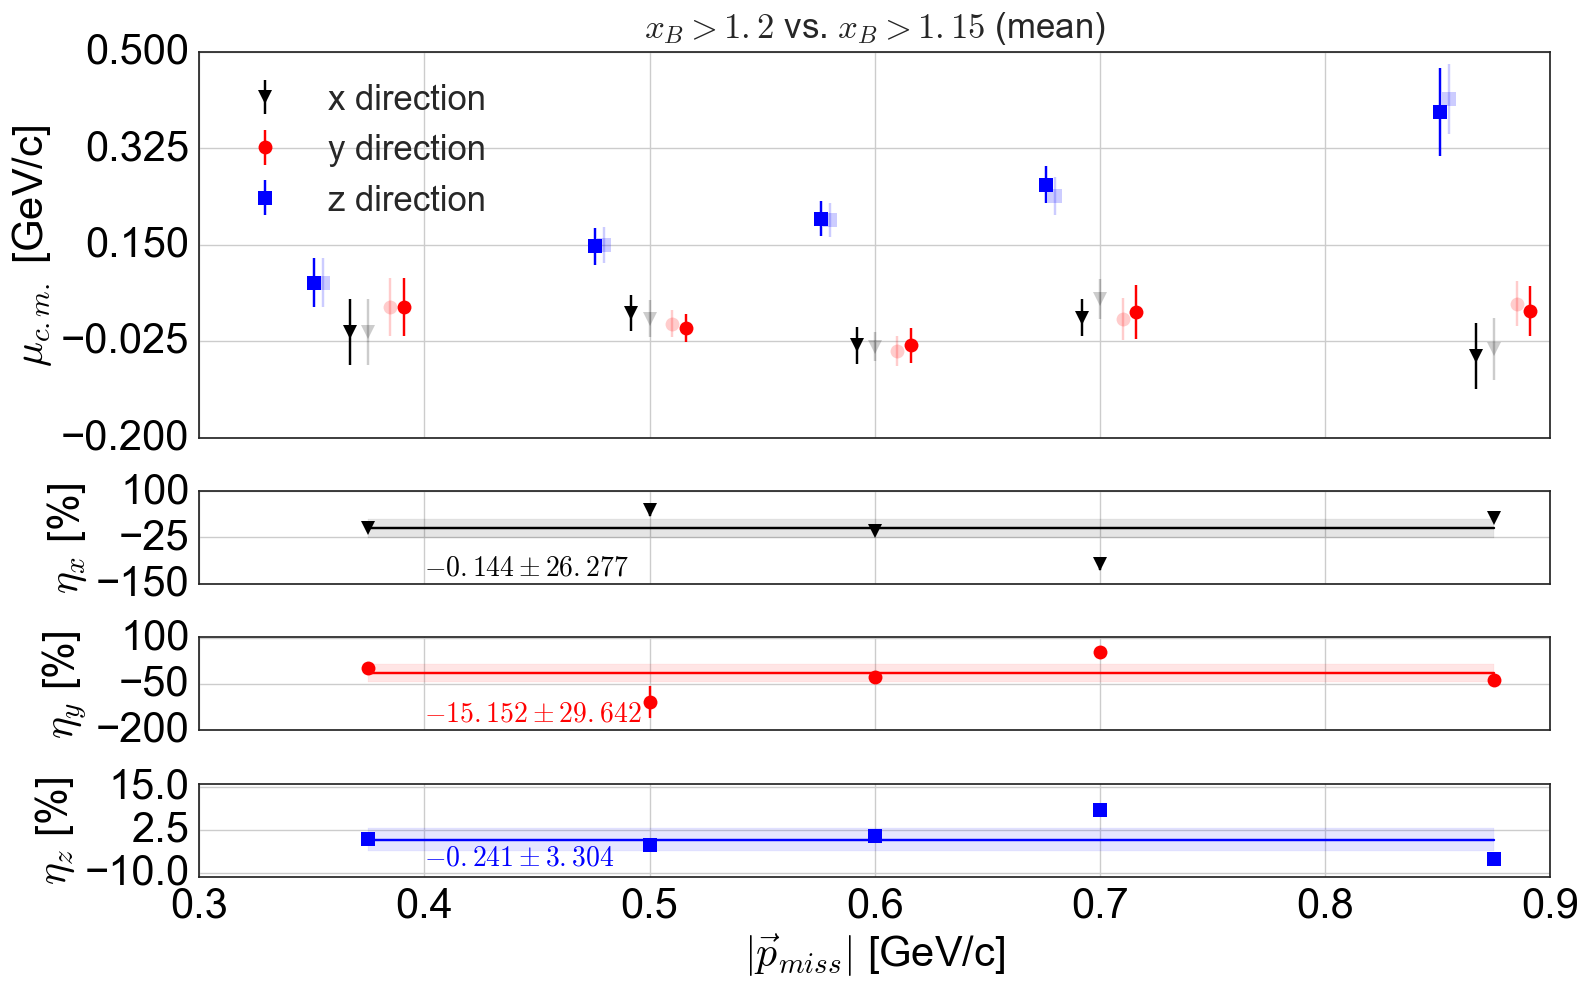

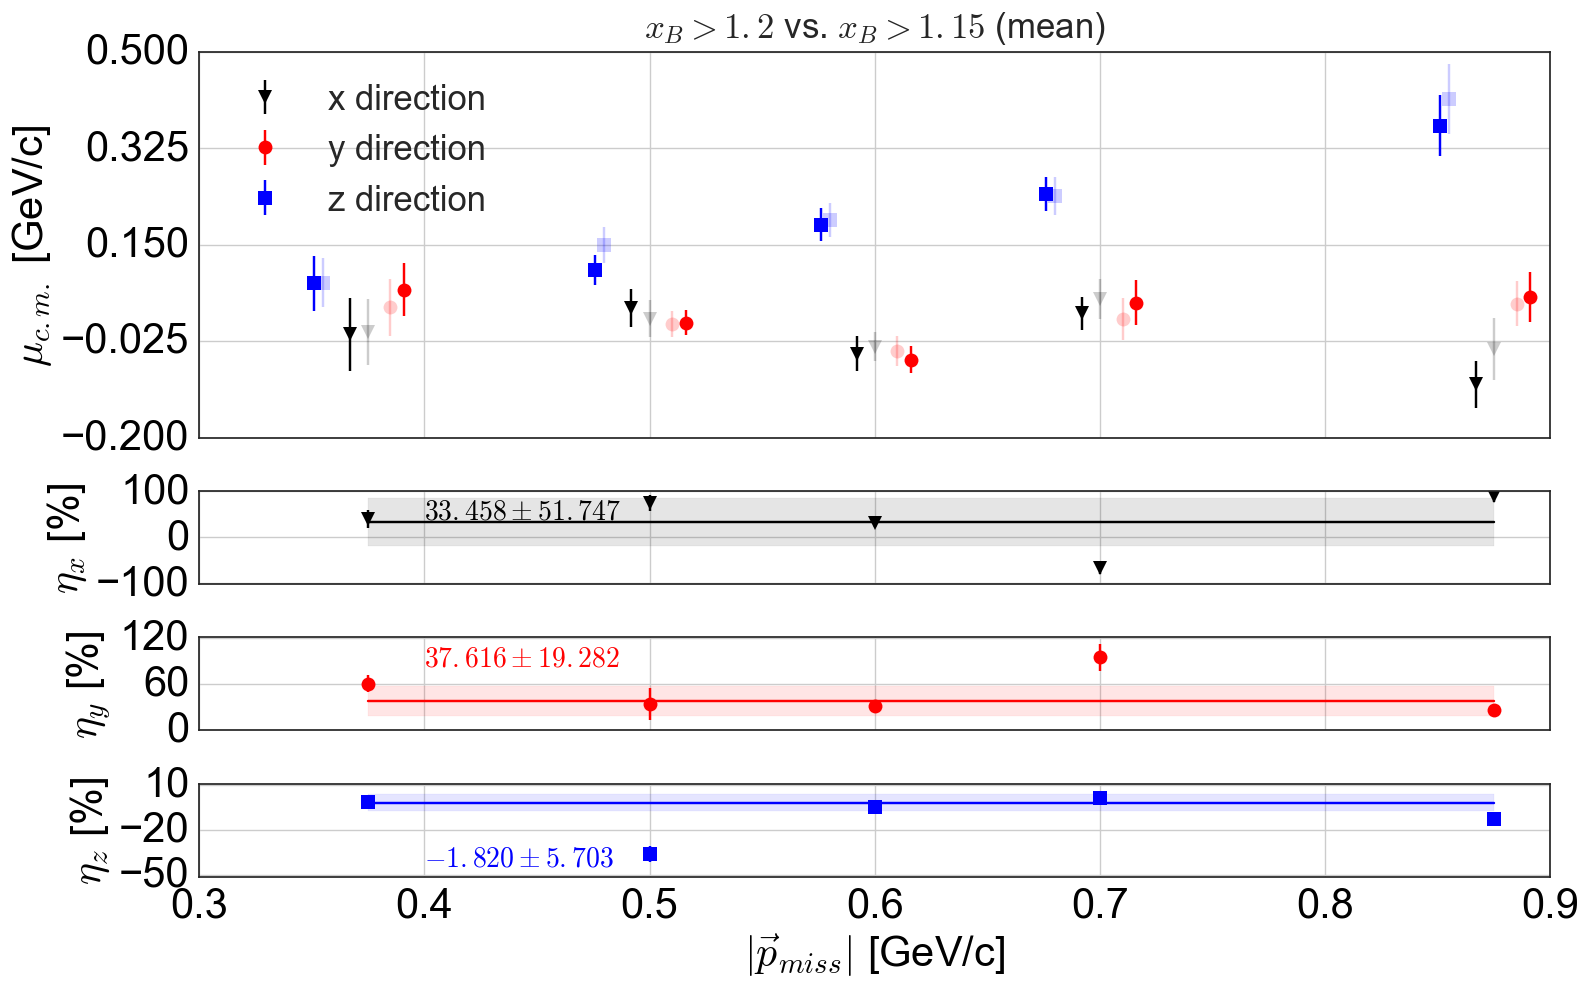

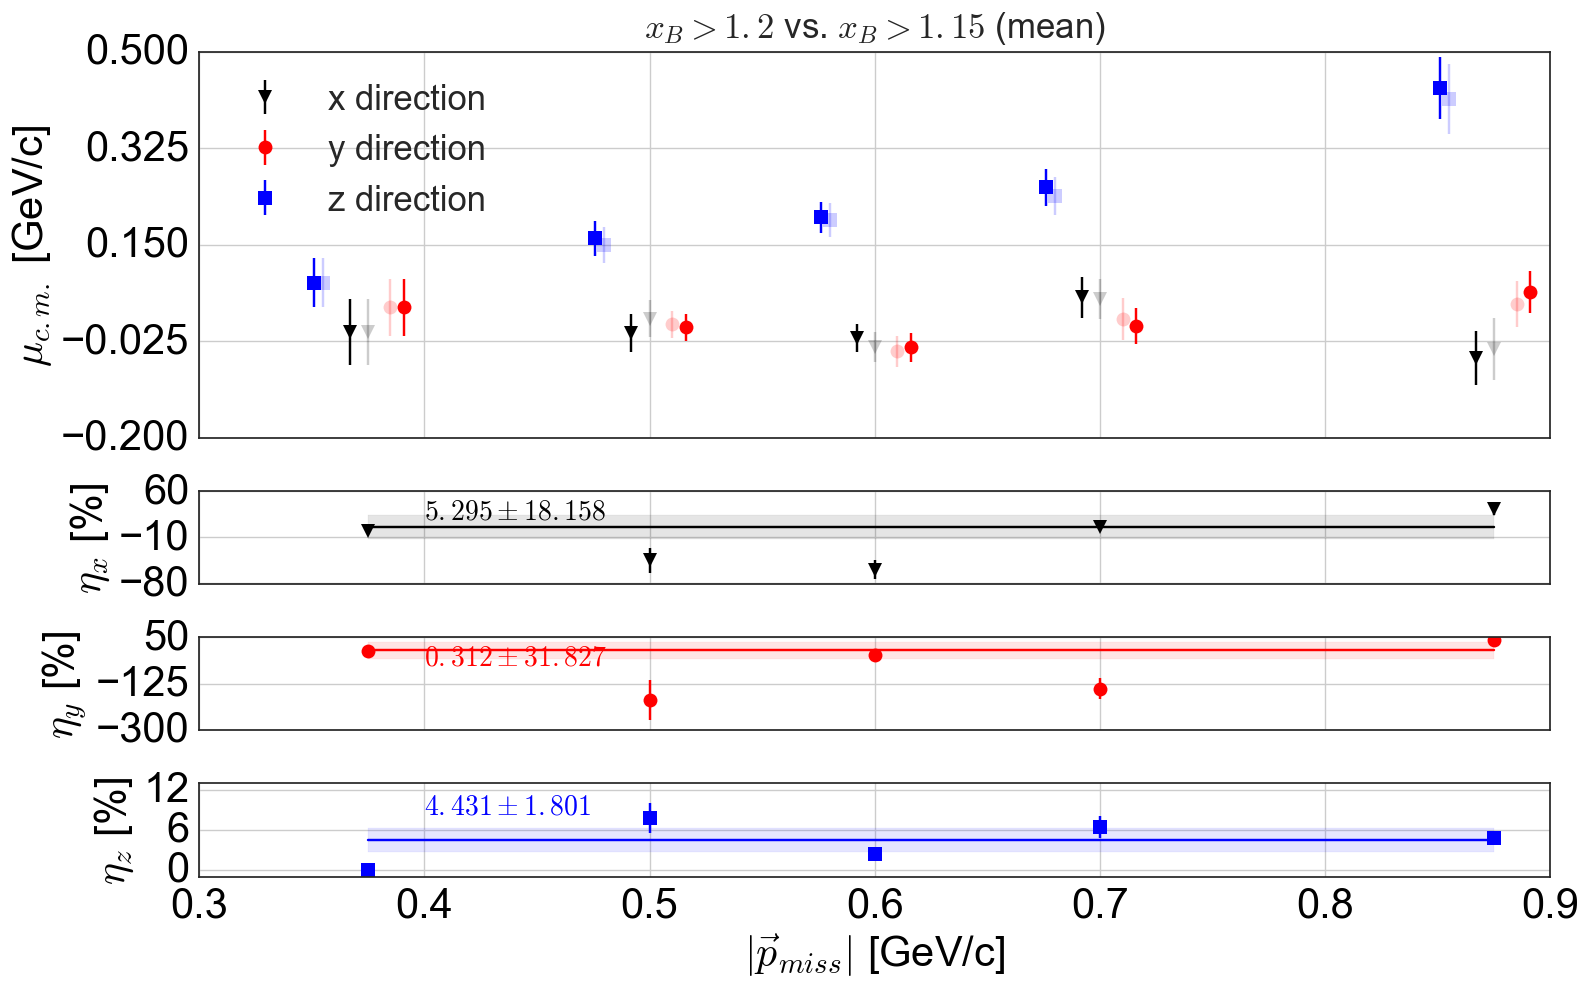

In [9]:
do_make_plot = True
do_save_plots = True
do_4_plots = True
targets=['C12','Al27','Fe56','Pb208']

for target in targets:
    print '-------\n',target,'\n-------'
    for var,var_label in zip(['sigma','mean'],["$\sigma_{c.m.}$ [GeV/c]","$\mu_{c.m.}$ [GeV/c]"]):
        print '________\n',var,'\n________'
        mean_Xb115 , sigma_Xb115 = fit_pp_cm_in_cut(Xbmin = 1.15,modified_cut_name='Xb115',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        mean_Xb125 , sigma_Xb125 = fit_pp_cm_in_cut(Xbmin = 1.25,modified_cut_name='Xb125',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)
        sensitivity_Xb = []
        for i,direction in zip(range(3),directions):
            a,b,a_err,b_err=mean_Xb115[i],sigma_Xb115[i],mean_Xb125[i] , sigma_Xb125[i]
            sensitivity_Xb.append(np.max(np.abs([a,b,a_err,b_err])))
#             print [a,b,a_err,b_err]
            if i==2: print 'xB>1.2 %s(%s) cut sensitivity: %.1f'%(var,direction,sensitivity_Xb[-1])
        sensitivity_t_Xb = np.sqrt(np.square(sensitivity_Xb[0])+np.square(sensitivity_Xb[1]))
        print 'xB>1.2 %s(transverse) cut sensitivity: %.1f'%(var,sensitivity_t_Xb)






        mean_theta_pq_20 , sigma_theta_pq_20 = fit_pp_cm_in_cut(theta_pq_max=20,modified_cut_name='theta_pq_20',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        mean_theta_pq_30 , sigma_theta_pq_30 = fit_pp_cm_in_cut(theta_pq_max=30,modified_cut_name='theta_pq_30',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        sensitivity_theta_pq = []
        for i,direction in zip(range(3),directions):
            a,b,a_err,b_err=mean_theta_pq_20[i],sigma_theta_pq_20[i],mean_theta_pq_30[i] , sigma_theta_pq_30[i]
            sensitivity_theta_pq.append(np.max(np.abs([a,b,a_err,b_err])))
#             print [a,b,a_err,b_err]
            if i==2: print 'theta_pq<25 %s(%s) cut sensitivity: %.1f'%(var,direction,sensitivity_theta_pq[-1])
        sensitivity_t_theta_pq = np.sqrt(np.square(sensitivity_Xb[0])+np.square(sensitivity_theta_pq[1]))
        print 'theta_pq<25 %s(transverse) cut sensitivity: %.1f'%(var,sensitivity_t_theta_pq)



        mean_p_over_q_057_091 , sigma_p_over_q_057_091 = fit_pp_cm_in_cut(p_over_q_min=0.57,
                                                                p_over_q_max=0.91,
                                                                modified_cut_name='p_over_q_057_091',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        mean_p_over_q_067_101 , sigma_p_over_q_067_101 = fit_pp_cm_in_cut(p_over_q_min=0.67,
                                                                p_over_q_max=1.01,
                                                                modified_cut_name='p_over_q_067_101',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)
        sensitivity_p_over_q=[]
        for i,direction in zip(range(3),directions):
            a,b,a_err,b_err=mean_p_over_q_057_091[i],sigma_p_over_q_057_091[i],mean_p_over_q_067_101[i] , sigma_p_over_q_067_101[i]
            sensitivity_p_over_q.append(np.max(np.abs([a,b,a_err,b_err])))
#             print [a,b,a_err,b_err]
            if i==2: print '0.62<p/q<0.97 %s(%s) cut sensitivity: %.1f'%(var,direction,sensitivity_p_over_q[-1])
        sensitivity_t_p_over_q = np.sqrt(np.square(sensitivity_Xb[0])+np.square(sensitivity_p_over_q[1]))
        print '0.62<p/q<0.97 %s(transverse) cut sensitivity: %.1f'%(var,sensitivity_t_p_over_q)


 
        mean_mmiss1050 , sigma_mmiss1050 = fit_pp_cm_in_cut(MmissMax=1.05,
                                                            modified_cut_name='mmiss1050',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        mean_mmiss1150 , sigma_mmiss1150 = fit_pp_cm_in_cut(MmissMax=1.15,
                                                                modified_cut_name='mmiss1150',
                                                target=target,do_prints=False,do_make_plot=do_make_plot,
                                                do_save_plots=do_save_plots,var=var,var_label=var_label)

        sensitivity_mmiss = []
        for i,direction in zip(range(3),directions):
            a,b,a_err,b_err=mean_mmiss1050[i],sigma_mmiss1050[i],mean_mmiss1150[i] , sigma_mmiss1150[i]
            sensitivity_mmiss.append(np.max(np.abs([a,b,a_err,b_err])))
#             print [a,b,a_err,b_err]
            if i==2: print 'Mmiss<1.1 %s(%s) cut sensitivity: %.1f'%(var,direction,sensitivity_mmiss[-1])
        sensitivity_t_mmiss = np.sqrt(np.square(sensitivity_Xb[0])+np.square(sensitivity_mmiss[1]))
        print 'Mmiss<1.1 %s(transverse) cut sensitivity: %.1f'%(var,sensitivity_t_mmiss)



        print 'tot. syst. uncertainty tranverse ('+var+'): %.1f'%np.sqrt(np.square(sensitivity_t_Xb) 
                                                                         + np.square(sensitivity_t_theta_pq)
                                                                         + np.square(sensitivity_t_p_over_q) 
                                                                         + np.square(sensitivity_t_mmiss))


        print 'tot. syst. uncertainty longitudinal ('+var+'): %.1f'%np.sqrt(np.square(sensitivity_Xb[2]) 
                                                                         + np.square(sensitivity_theta_pq[2])
                                                                         + np.square(sensitivity_p_over_q[2]) 
                                                                         + np.square(sensitivity_mmiss[2]))





    

